# Amazon Product Reviews Project

# Importing the Libraries.

In [1]:
import numpy as np                                                    #for numerical data                            
import pandas as pd                                                   #for Load the dataset file
import json                                                           #It can be used to work with JSON files
import csv                                                            #It can be used to work with CSV files
import re                                                             #It can be used to work with Regular Expressions
import spacy                                                          #Spacy is open-source library for NLP in python.used for NLP Piplines
nlp=spacy.load("en_core_web_sm")                                      #It is a small English pipeline trained on written web text
import seaborn as sb                                                  #used for Visualizations
import matplotlib.pyplot as plt                                       #used for Visualizations
from datetime import datetime                                         #to change the date in Format
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  #It is an object and ploarity_score is a method gives the scores of sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer           #Counting the no.of occurance each word appears in document
from sklearn.feature_extraction.text import TfidfVectorizer           #Tfidf vector is converting text document into vector form
from sklearn.preprocessing import LabelEncoder                        #for converting catgorical data into numerical data
from sklearn.preprocessing import StandardScaler                      #used for Standarizations
from sklearn.model_selection import train_test_split                  #used for splitting the data into train and test
from sklearn.multiclass import OneVsRestClassifier                    # used for fitting one classifer per class
from sklearn.linear_model import LogisticRegression                   #for LogisticRegression used for classification 
from sklearn.naive_bayes import MultinomialNB                         #for MultinomialNB used for classification
from sklearn.linear_model import LogisticRegression                   #for LogisticRegression used for classification
from sklearn.naive_bayes import GaussianNB                            #for GaussianNB used for classification
from sklearn.svm import SVC                                           #for SVC used for classification
from sklearn.neighbors import KNeighborsClassifier                    #for KNeighborsClassifier used for classification
from sklearn.tree import DecisionTreeClassifier                       #for DecisionTreeClassifier used for classification
from sklearn.ensemble import AdaBoostClassifier                       #for AdaBoostingClassifier used for classification
from sklearn.ensemble import GradientBoostingClassifier               #for GradientBoostingClassifier used for classification
from sklearn.ensemble import StackingClassifier                       #for StackingClassifier used for classification
from sklearn.ensemble import RandomForestClassifier                   #for RandomForestsClassifier used for classification
from sklearn.cluster import KMeans                                    # for Kmeans used for clustering
from sklearn.cluster import AgglomerativeClustering                   # for AgglomerativeClustering used for clustering          
from scipy.cluster import hierarchy as hc                             #for finding the no.of clusters(dendogram)    
from sklearn.cluster import DBSCAN                                    #for DBSCAN used for clustering
from sklearn import metrics                                           #used to performance of a model 
from sklearn.metrics import silhouette_score                          #used to find the best k-value
from sklearn.model_selection import cross_val_score                   #for finding the scores of cross-validations
from sklearn.model_selection import KFold,StratifiedKFold             #for finding the scores of cross-validations                                                                     
from sklearn.model_selection import RepeatedStratifiedKFold           #for finding the scores of cross-validations                           
from sklearn.metrics import confusion_matrix                          #finding the score of model Evaluations  
from sklearn.metrics import classification_report,accuracy_score      #finding the score of model Evaluations  
from sklearn.metrics import precision_score,f1_score,recall_score     #finding the score of model Evaluations  
import tkinter as tk                                                  #kinter is an open source, portable graphical user interface (GUI) library designed for use in Python scripts.
from tkinter import *                                                 #This Library used for all of the classes, functions, and variables from the tkinter module
from tkinter import ttk                                               #ttk is a module that is used to style the tkinter widgets
from sklearn.feature_extraction.text import TfidfVectorizer           #Tfidf vector is converting text document into vector form
from sklearn.metrics.pairwise import cosine_similarity                # It is used to find the Similarity btw two words 
from sklearn.neighbors import NearestNeighbors                        #It is used to find the Nearest Neighbors
import warnings                                                       #for removing warnings
warnings.filterwarnings('ignore')                    

# Read the Dataset_files.

In [2]:
#Beauty Reviews dataset

In [3]:
Rbeauty=pd.read_json('All_Beauty.json',lines=True,nrows=15000)
Rbeauty.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN


In [4]:
Rbeauty.shape

(15000, 12)

In [5]:
Rbeauty.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [6]:
#Clothing_Shoes_and_Jewelry Reviews dataset

In [7]:
Rcloth=pd.read_json('Clothing_Shoes_and_Jewelry.json',lines=True,nrows=15000)
Rcloth.head(3)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2.0,True,"05 4, 2014",A2IC3NZN488KWK,0871167042,{'Format:': ' Paperback'},Ruby Tulip,"This book has beautiful photos, good and under...",Unique designs,1399161600,NaN
1,4,NaN,True,"04 26, 2014",A3OT9BYASFGU2X,0871167042,{'Format:': ' Paperback'},Laurie K.,"I love the ideas but have no access sea glass,...",makes you want to live by the sea...,1398470400,NaN
2,5,6.0,False,"04 17, 2014",A28GK1G2KDXHRP,0871167042,{'Format:': ' Paperback'},Marie Rhoades,As someone who has never possessed the manual ...,Highly Recommend this Jewelry Making Book,1397692800,NaN


In [8]:
Rcloth.shape

(15000, 12)

In [9]:
Rcloth.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [10]:
#Meta Beauty dataset

In [11]:
Mbeauty=pd.read_json('meta_All_Beauty.json',lines=True,nrows=15000)
Mbeauty.head(3)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,NaT,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",NaT,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,NaT,$28.76,7250468162,[],[]


In [12]:
Mbeauty.shape

(15000, 19)

In [13]:
Mbeauty.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')

In [14]:
#Meta_Clothing_Shoes_and_Jewelry dataset

In [15]:
Mcloth=pd.read_json('meta_Clothing_Shoes_and_Jewelry.json',lines=True,nrows=15000)
Mcloth.head(3)

,category,description,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item
0,"[Clothing, Shoes & Jewelry, Costumes & Accesso...","[6"" long, stretched waist measures 11 1/2"" acr...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Big Dreams,"[3 layers of tulle, 6"" long, stretched waist m...","19,963,069inClothing,ShoesJewelry(",5 star5 star (0%),0000037214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,Anello,"[Polyester Canvas Waterproof, Imported, Size: ...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[B07CJF5HLR, B01EBI8UH6, B01N1LR908, B074M4QKG...",$70.00,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Mcloth.shape

(15000, 18)

In [17]:
Mcloth.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'imageURL', 'imageURLHighRes', 'also_view', 'price', 'fit',
       'also_buy', 'main_cat', 'tech1', 'details', 'similar_item'],
      dtype='object')

In [18]:
#Merging the both Reviews and meta of beauty datasets

In [19]:
Beauty=pd.merge(Rbeauty,Mbeauty,on='asin')
Beauty.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,True,"03 10, 2016",A5TA1NJOC0PJ5,7414204790,Amazon Customer,Excellent very good,Five Stars,1457568000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,NaT,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,True,"09 1, 2015",A1TJICB7VLGQKL,7414204790,LH,Great product,Five Stars,1441065600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,NaT,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [20]:
Beauty.shape

(20268, 30)

In [21]:
#Merging the both Reviews and meta of Clothing_Shoes_and_Jewelry datasets

In [22]:
Cloth=pd.merge(Rcloth,Mcloth,on='asin')
Cloth.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,imageURL,imageURLHighRes,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item
0,5,2.0,True,"05 4, 2014",A2IC3NZN488KWK,0871167042,{'Format:': ' Paperback'},Ruby Tulip,"This book has beautiful photos, good and under...",Unique designs,...,NaN,NaN,"[1634509374, 1612433030, 1627000763, 163250347...",$17.95,NaN,"[1627002332, 1634509374, 1627000763, 161243303...",Books,NaN,NaN,NaN
1,4,NaN,True,"04 26, 2014",A3OT9BYASFGU2X,0871167042,{'Format:': ' Paperback'},Laurie K.,"I love the ideas but have no access sea glass,...",makes you want to live by the sea...,...,NaN,NaN,"[1634509374, 1612433030, 1627000763, 163250347...",$17.95,NaN,"[1627002332, 1634509374, 1627000763, 161243303...",Books,NaN,NaN,NaN


In [23]:
Cloth.shape

(28227, 29)

In [24]:
Cloth.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'category', 'description', 'title', 'brand', 'feature', 'rank',
       'date', 'imageURL', 'imageURLHighRes', 'also_view', 'price', 'fit',
       'also_buy', 'main_cat', 'tech1', 'details', 'similar_item'],
      dtype='object')

In [25]:
Beauty.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes'],
      dtype='object')

In [26]:
#Finally we merging both the beauty and Clothing_Shoes_and_Jewelry

In [27]:
data=pd.concat([Beauty,Cloth])
data.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,True,"03 10, 2016",A5TA1NJOC0PJ5,7414204790,Amazon Customer,Excellent very good,Five Stars,1457568000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,NaN,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,True,"09 1, 2015",A1TJICB7VLGQKL,7414204790,LH,Great product,Five Stars,1441065600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,NaN,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [28]:
# Specify the input date format
input_date_format = "%m %d, %Y"
output_date_format = "%Y-%m-%d"
data['reviewTime'] = pd.to_datetime(data['reviewTime'], format=input_date_format)
data['reviewTime'] = data['reviewTime'].dt.strftime(output_date_format)

# Data Conversion

In [29]:
data['price']=data['price'].str.replace('$','',regex=True)

In [30]:
data['price']=pd.to_numeric(data['price'],errors='coerce') 

In [31]:
data['feature'] = data['feature'].astype(str).str.replace('[', '').str.replace(']', '')

# concatination of reviewtext and summary

In [32]:
data['reviewText']=data['summary']+' '+data['reviewText']

In [33]:
data.drop(columns='summary',axis=1,inplace=True) #dropping the summary column

# Finding Missing values

In [34]:
data.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName           0
reviewText           114
unixReviewTime         0
vote               42806
style              19630
image              47763
category               0
tech1              27792
description         1852
fit                 7776
title                  0
also_buy            2671
tech2              28227
brand              23102
feature                0
rank                2420
also_view            422
details            27617
main_cat           23999
similar_item       28137
date               23453
price              28244
imageURL            4862
imageURLHighRes     4862
dtype: int64

In [35]:
data.drop(columns=['vote','style','image','category','tech1','description','fit','also_buy','tech2','also_view','imageURL','date','similar_item','details','imageURLHighRes'],axis=1,inplace=True)

In [36]:
data['rank'] = data['rank'].str.replace('\W','',regex=True)
data.dropna(inplace=True) 

In [37]:
import re
def pat(s):
    pattern = r'((\d+)inBeautyPersonalCare|(\d+)inClothingShoesJewelry|(\d+)inClothingShoesJewelryMenShops)'
    match = re.search(pattern, s) 
    if match: 
        num = match.group()
        return num 

In [38]:
data['rank']=data['rank'].apply(pat)

In [39]:
data['rank'] = data['rank'].str.replace('\D','',regex=True)
data['rank']=pd.to_numeric(data['rank'],errors='coerce')
data.dropna(inplace=True)
data['rank']=data['rank'].astype('int64')
data['rank'].max()

1693702

# Finding Duplicated the rows.

In [40]:
data.duplicated().value_counts() 

False    6862
True     6828
dtype: int64

In [41]:
data.drop_duplicates(inplace=True) 

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6862 entries, 0 to 10953
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         6862 non-null   int64  
 1   verified        6862 non-null   bool   
 2   reviewTime      6862 non-null   object 
 3   reviewerID      6862 non-null   object 
 4   asin            6862 non-null   object 
 5   reviewerName    6862 non-null   object 
 6   reviewText      6862 non-null   object 
 7   unixReviewTime  6862 non-null   int64  
 8   title           6862 non-null   object 
 9   brand           6862 non-null   object 
 10  feature         6862 non-null   object 
 11  rank            6862 non-null   int64  
 12  main_cat        6862 non-null   object 
 13  price           6862 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 757.2+ KB


# EDA(Exploratory Data Analysis)

# Numerical data 

In [43]:
data.select_dtypes(exclude='object').columns 

Index(['overall', 'verified', 'unixReviewTime', 'rank', 'price'], dtype='object')

# Categorical data

In [44]:
data.select_dtypes(include='object').columns 

Index(['reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText',
       'title', 'brand', 'feature', 'main_cat'],
      dtype='object')

In [45]:
def info_of_categorical(col):
    print(f'Unique values in {col} are: {data[col].unique()}')
    print(f'Mode values in {col} are: {data[col].mode()[0]}')
    print(f'Missing values in {col} are: {data[col].isnull().sum()}')

In [46]:
def info_of_continuous(col):
    print(f'Mean values in {col} are: {data[col].mean()}')
    print(f'Median values in {col} are: {data[col].median()}')
    print(f'Mode values in {col} are: {data[col].mode()[0]}')
    print(f'missing values in {col} are: {data[col].isnull().sum()}')

In [47]:
df=data[['reviewTime']]
parts = df["reviewTime"].str.split("-", n = 3, expand = True) 
df["year"]= parts[0].astype('int') 
df["month"]= parts[1].astype('int') 
df["day"]= parts[2].astype('int') 
df.head(1)

,reviewTime,year,month,day
0,2016-03-10,2016,3,10


In [48]:
from datetime import datetime 
import calendar 
      
def weekend_or_weekday(year,month,day): 
      
    d = datetime(year,month,day) 
    if d.weekday()>4: 
        return 1
    else: 
        return 0
  
df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1) 
df.head(1)

,reviewTime,year,month,day,weekend
0,2016-03-10,2016,3,10,0


In [49]:
pip install holidays

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
from datetime import date 
import holidays 
  
def is_holiday(x): 
    
  india_holidays = holidays.country_holidays('IN') 
  
  if india_holidays.get(x): 
    return 1
  else: 
    return 0
  
df['holidays'] = df['reviewTime'].apply(is_holiday) 
df.head(1)

,reviewTime,year,month,day,weekend,holidays
0,2016-03-10,2016,3,10,0,0


In [51]:
def which_day(year, month, day): 
      
    d = datetime(year,month,day) 
    return d.weekday() 
  
df['weekday'] = df.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1) 
df

,reviewTime,year,month,day,weekend,holidays,weekday
0,2016-03-10,2016,3,10,0,0,3
1,2015-09-01,2015,9,1,0,0,1
2,2014-10-03,2014,10,3,0,0,4
3,2014-08-07,2014,8,7,0,0,3
4,2014-06-14,2014,6,14,1,0,5
...,...,...,...,...,...,...,...
7201,2012-11-19,2012,11,19,0,0,0
7203,2009-12-31,2009,12,31,0,0,3
10949,2003-04-18,2003,4,18,0,1,4
10951,2003-01-14,2003,1,14,0,1,1


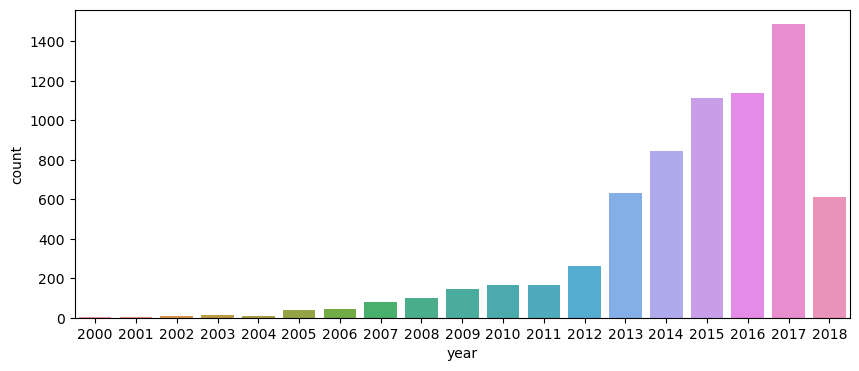

In [52]:
fig, ax = plt.subplots(figsize= (10, 4))
ax=sb.countplot(df['year']);

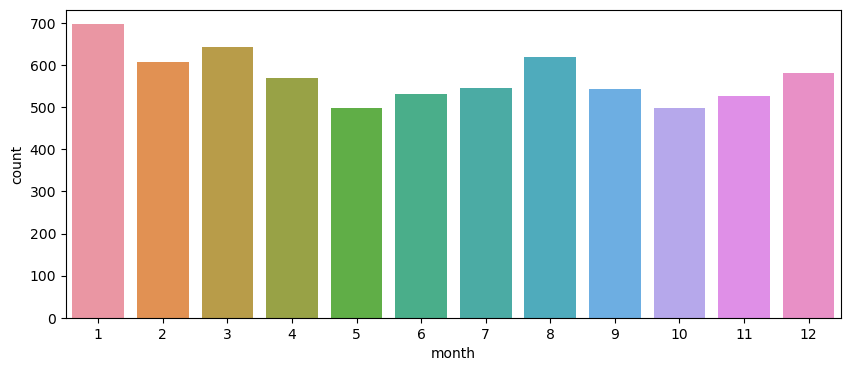

In [53]:
fig, ax = plt.subplots(figsize= (10, 4))
ax=sb.countplot(df['month']);

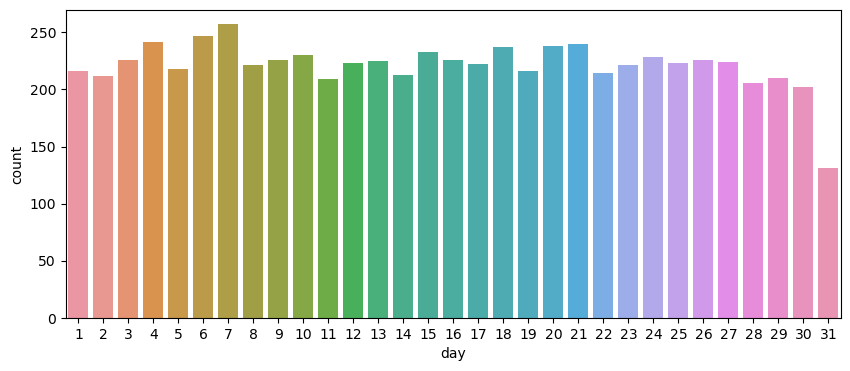

In [54]:
fig, ax = plt.subplots(figsize= (10, 4))
ax=sb.countplot(df['day']);

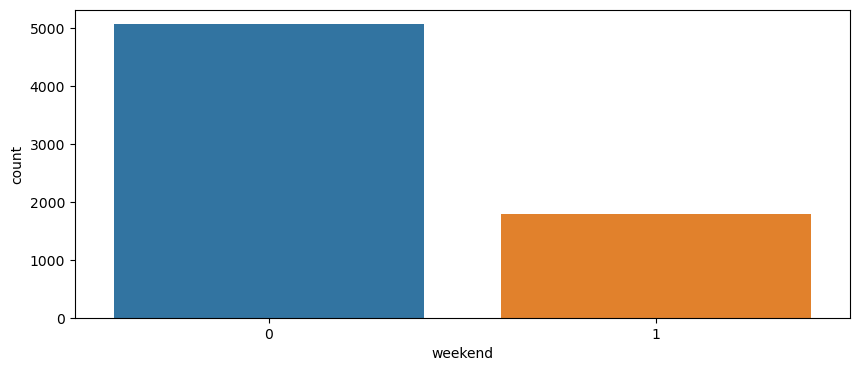

In [55]:
fig, ax = plt.subplots(figsize= (10, 4))
ax=sb.countplot(df['weekend']);

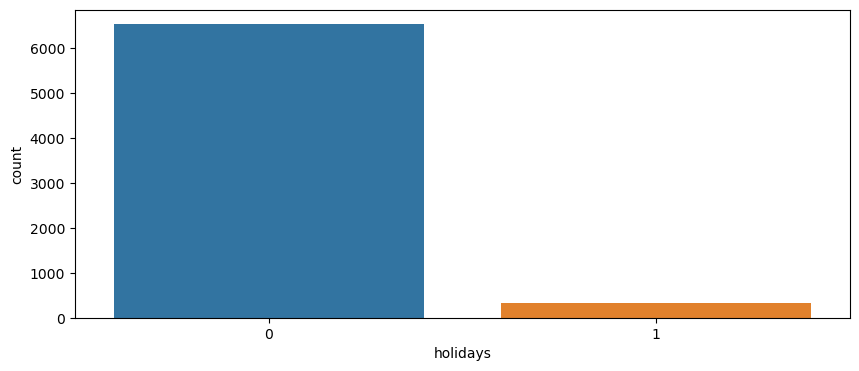

In [56]:
fig, ax = plt.subplots(figsize= (10, 4))
ax=sb.countplot(df['holidays']);

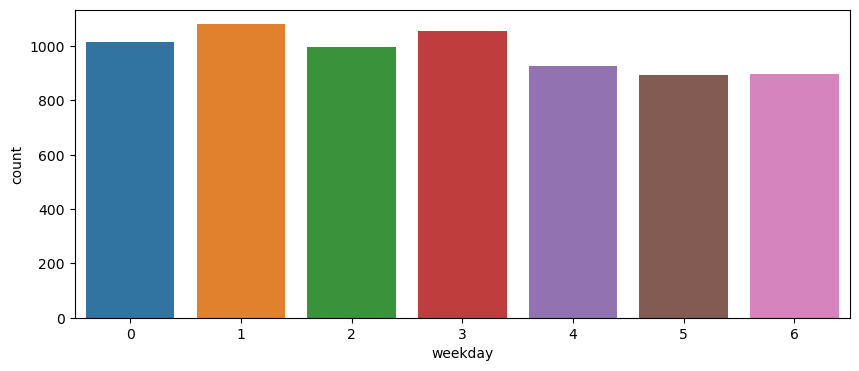

In [53]:
fig, ax = plt.subplots(figsize= (10, 4))
ax=sb.countplot(df['weekday']);

# Uni-Variate

In [54]:
info_of_continuous('overall')

Mean values in overall are: 4.38545613523754
Median values in overall are: 5.0
Mode values in overall are: 5
missing values in overall are: 0


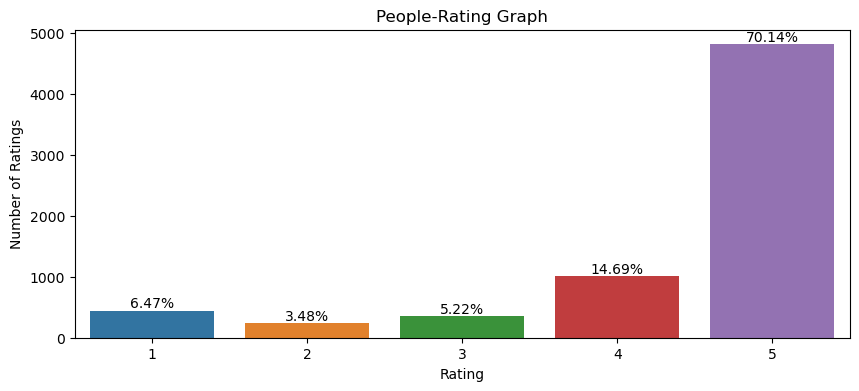

In [55]:
fig, ax = plt.subplots(figsize= (10, 4))
ax = sb.countplot(x = data["overall"])
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(data))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    
    
plt.title("People-Rating Graph")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()
plt.show()


In [56]:
info_of_continuous('verified')

Mean values in verified are: 0.9151850772369572
Median values in verified are: 1.0
Mode values in verified are: True
missing values in verified are: 0


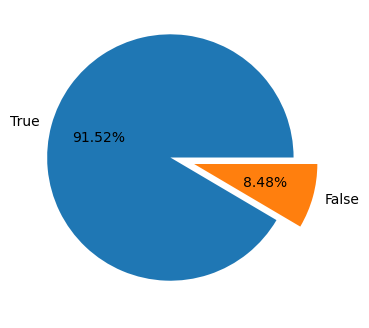

In [57]:
plt.figure(figsize=(10,4))
a=data['verified'].unique()
b=data['verified'].value_counts()
plt.pie(b,labels=a,autopct='%.2f%%', explode=[0.2,0]);

In [58]:
info_of_continuous('rank')

Mean values in rank are: 231637.04794520547
Median values in rank are: 1028.0
Mode values in rank are: 457
missing values in rank are: 0


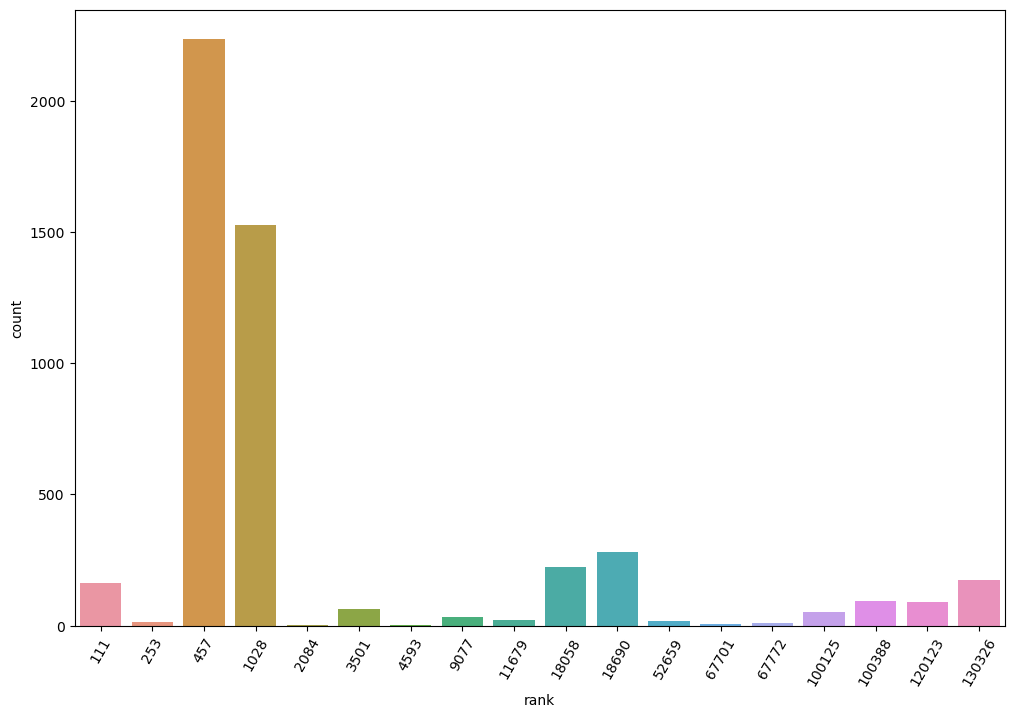

In [59]:
fig, ax = plt.subplots(figsize= (12,8))
ax = sb.countplot(x = data["rank"].sort_values().head(5000))
plt.xticks(rotation=60)                                                                    
plt.show()

In [60]:
data['rank'].max()

1693702

In [61]:
info_of_continuous('price')

Mean values in price are: 23.832953949285145
Median values in price are: 18.49
Mode values in price are: 18.49
missing values in price are: 0


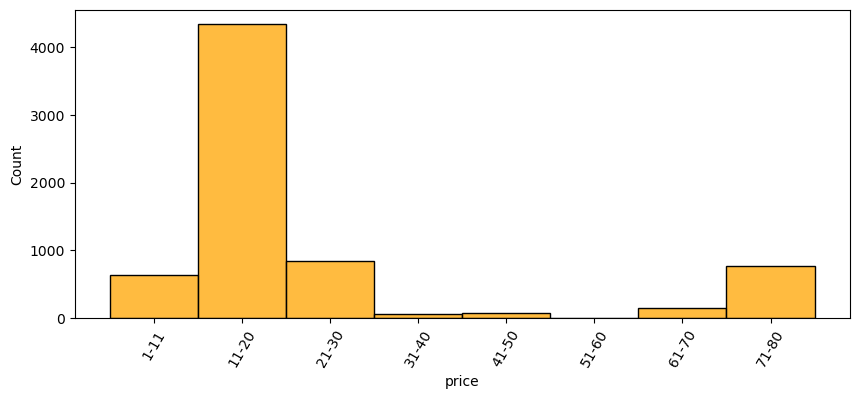

In [62]:
plt.figure(figsize=(10,4))
bins=[1, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels=['1-11','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
x=pd.cut(x=data['price'],bins=bins,labels=labels)
sb.histplot(data=x,color='orange')
plt.xticks(rotation=60);

In [63]:
info_of_categorical('main_cat')

Unique values in main_cat are: ['All Beauty' 'Office Products' 'Toys & Games' 'Amazon Home' 'Video Games'
 'Tools & Home Improvement']
Mode values in main_cat are: All Beauty
Missing values in main_cat are: 0


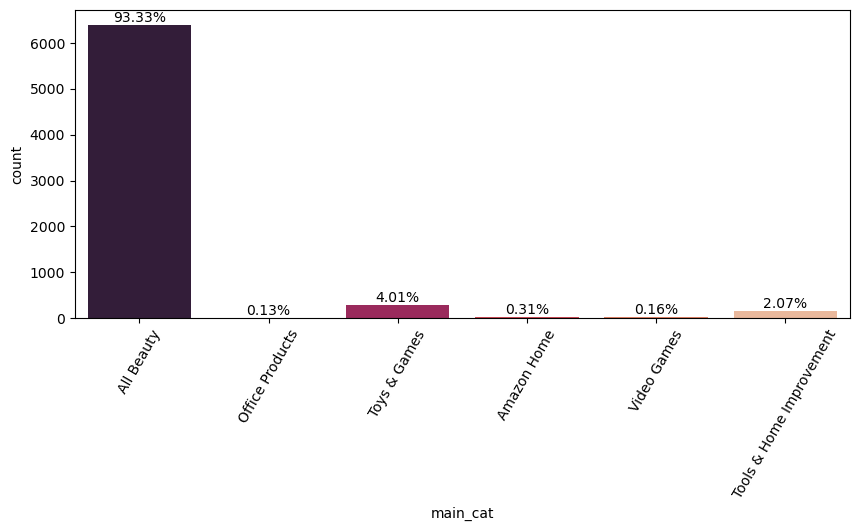

In [64]:
fig, ax = plt.subplots(figsize= (10, 4))
ax = sb.countplot(x = data["main_cat"],palette="rocket")
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(data))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    

plt.xticks(rotation=60)                                                                    
plt.show()


In [65]:
info_of_categorical('asin')

Unique values in asin are: ['7414204790' 'B000050B6B' 'B000050FDY' 'B000050FDT' 'B000052Y8Z'
 'B000052YAN' 'B00005JS5C' 'B000065AB1' 'B00006L9LC' 'B00009RB1C'
 'B0000AE67W' 'B0000Y8IOQ' 'B00012FL8I' 'B000146LKS' 'B000142ZFS'
 'B000158MEA' 'B00016WU6A' 'B0001AD4TS' 'B0001DHH0M' 'B0001HYLR0'
 'B0001M1IAI' '1936023857' '6042651528' '6338750458' 'B00000INRB'
 'B00001TA2G' 'B00001W0F2' 'B00002251L' 'B00002N5QL' 'B000034DKZ'
 'B00004U3SG' 'B00006C28H']
Mode values in asin are: B00005JS5C
Missing values in asin are: 0


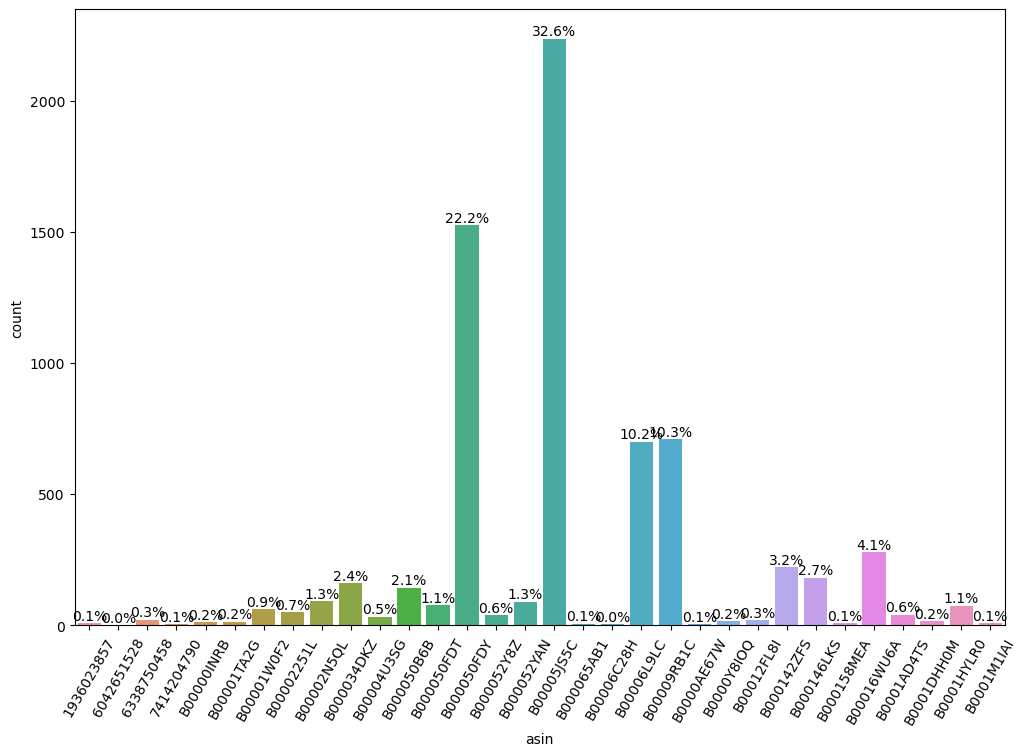

In [66]:
fig, ax = plt.subplots(figsize= (12, 8))
ax = sb.countplot(x = data["asin"].sort_values())
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(data))*100, 1)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    

plt.xticks(rotation=60)                                                                    
plt.show()

In [67]:
info_of_categorical('brand')

Unique values in brand are: ['Pirmal Healthcare' 'Philips Norelco' 'Braun' 'Dentemp' 'Reach'
 'Panasonic' 'Gillette' 'Citre Shine' 'Kinetronics' 'Biotone' 'General'
 'Plantlife' 'Super Nail' 'Nutrition Supply' "Dr. Singha's"
 'MoonDance Soaps & More' 'ACE' 'Ikonna' 'Carson-Dellosa'
 'DIY Celebrity Masks' 'F ARMAF' 'Panasonic 3DO (Games)' "Rubie's"
 'Disguise' 'Occidental Leather' 'McGuire-Nicholas' 'elope' 'LeapFrog']
Mode values in brand are: Panasonic
Missing values in brand are: 0


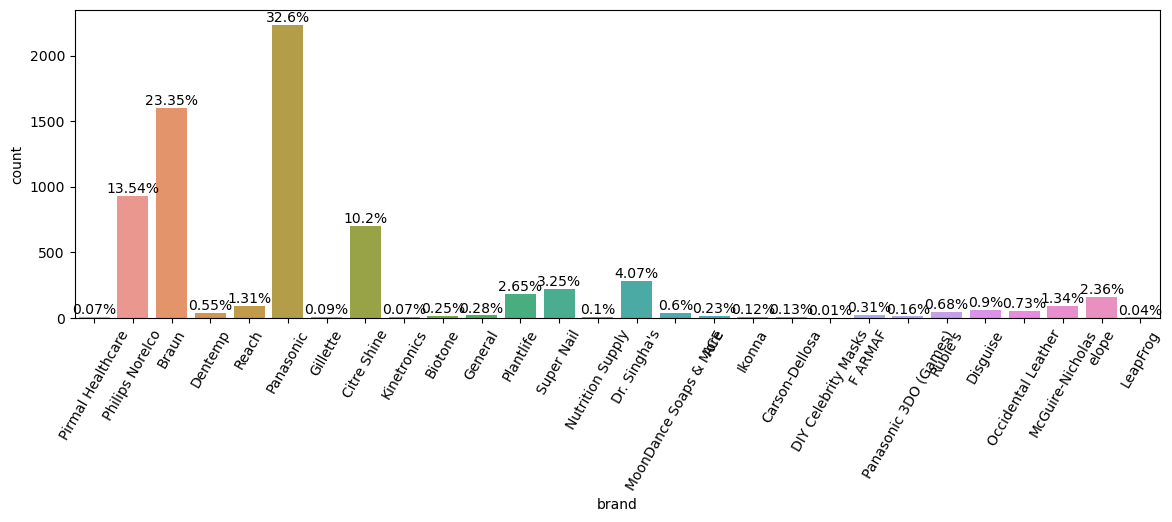

In [68]:
fig, ax = plt.subplots(figsize= (14, 4))
ax = sb.countplot(x = data["brand"])
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(data))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )    

plt.xticks(rotation=60)                                                                    
plt.show()

In [69]:
info_of_categorical('unixReviewTime')

Unique values in unixReviewTime are: [1457568000 1441065600 1412294400 ... 1050624000 1042502400 1041638400]
Mode values in unixReviewTime are: 1509235200
Missing values in unixReviewTime are: 0


# Bi-Variate

In [70]:
info_of_continuous('overall')

Mean values in overall are: 4.38545613523754
Median values in overall are: 5.0
Mode values in overall are: 5
missing values in overall are: 0


In [71]:
info_of_continuous('verified')

Mean values in verified are: 0.9151850772369572
Median values in verified are: 1.0
Mode values in verified are: True
missing values in verified are: 0


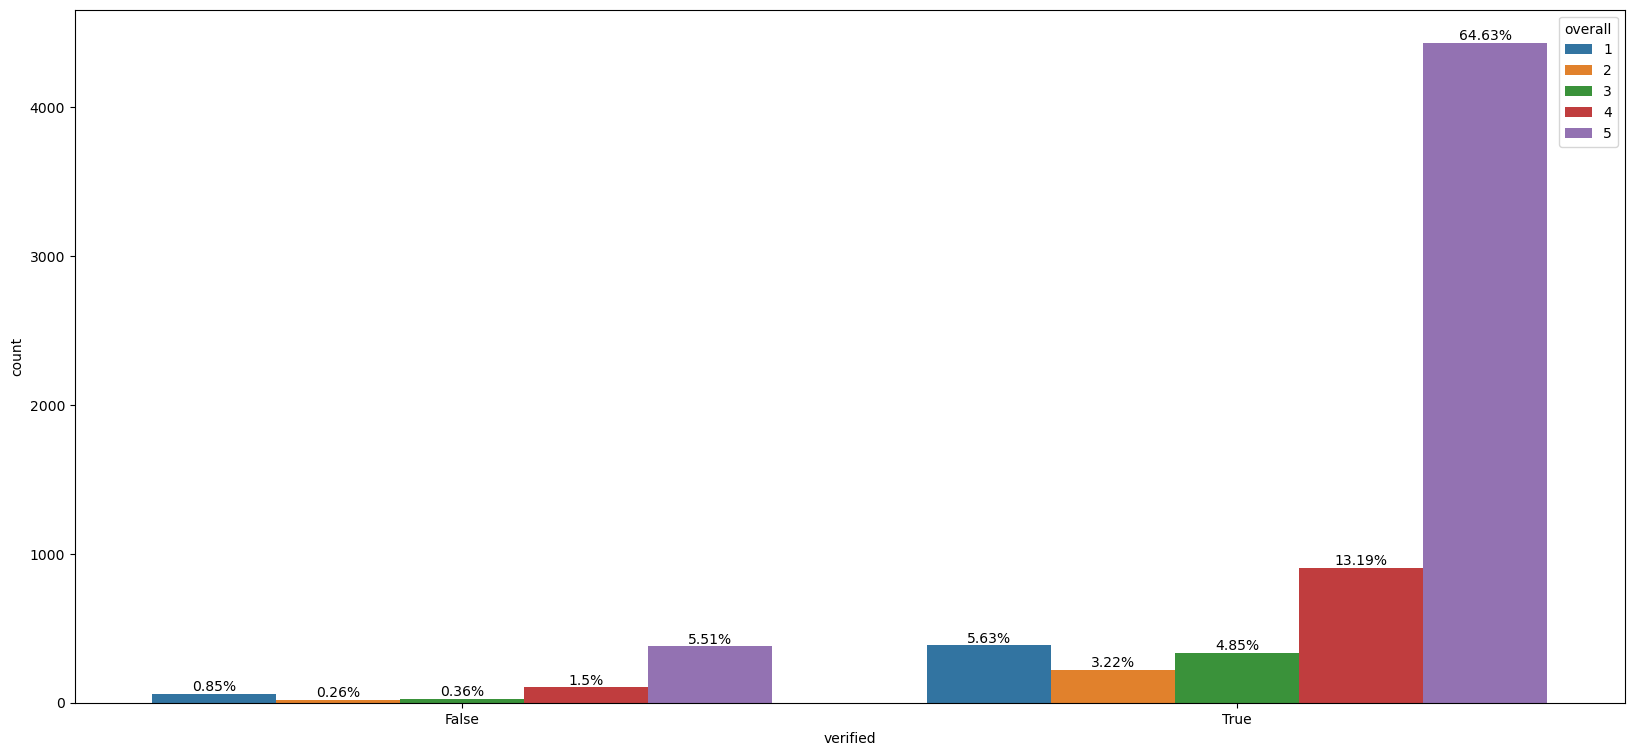

In [72]:
fig, ax = plt.subplots(figsize= (20, 9))
ax = sb.countplot(x = data["verified"],hue=data['overall'])
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(data))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
plt.show()

In [73]:
info_of_categorical('brand')

Unique values in brand are: ['Pirmal Healthcare' 'Philips Norelco' 'Braun' 'Dentemp' 'Reach'
 'Panasonic' 'Gillette' 'Citre Shine' 'Kinetronics' 'Biotone' 'General'
 'Plantlife' 'Super Nail' 'Nutrition Supply' "Dr. Singha's"
 'MoonDance Soaps & More' 'ACE' 'Ikonna' 'Carson-Dellosa'
 'DIY Celebrity Masks' 'F ARMAF' 'Panasonic 3DO (Games)' "Rubie's"
 'Disguise' 'Occidental Leather' 'McGuire-Nicholas' 'elope' 'LeapFrog']
Mode values in brand are: Panasonic
Missing values in brand are: 0


In [74]:
info_of_continuous('rank')

Mean values in rank are: 231637.04794520547
Median values in rank are: 1028.0
Mode values in rank are: 457
missing values in rank are: 0


In [75]:
b=data.groupby(['brand'])['rank'].min().sort_values(ascending=True)
bb=b[:6]
bb

brand
elope                   111
Rubie's                 253
Panasonic               457
Braun                  1028
DIY Celebrity Masks    2084
Disguise               3501
Name: rank, dtype: int64

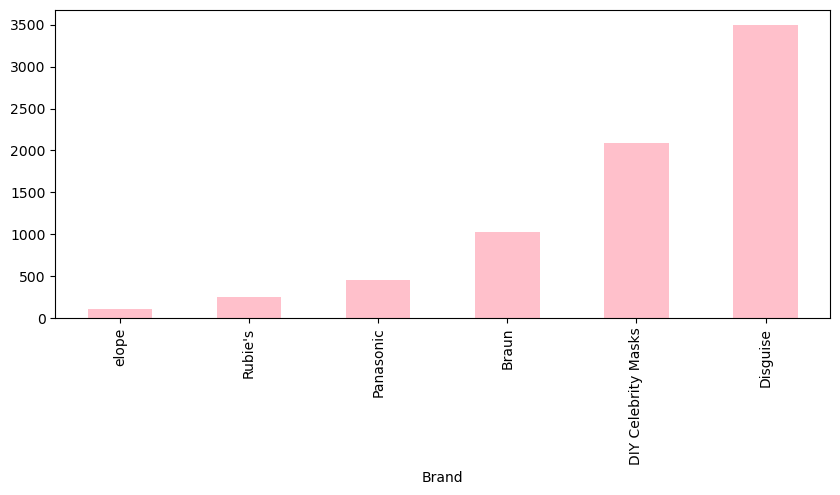

In [76]:
bb.plot(kind='bar',xlabel='Brand',figsize=(10,4),color='pink');

In [77]:
info_of_continuous('verified')

Mean values in verified are: 0.9151850772369572
Median values in verified are: 1.0
Mode values in verified are: True
missing values in verified are: 0


In [78]:
info_of_categorical('brand')

Unique values in brand are: ['Pirmal Healthcare' 'Philips Norelco' 'Braun' 'Dentemp' 'Reach'
 'Panasonic' 'Gillette' 'Citre Shine' 'Kinetronics' 'Biotone' 'General'
 'Plantlife' 'Super Nail' 'Nutrition Supply' "Dr. Singha's"
 'MoonDance Soaps & More' 'ACE' 'Ikonna' 'Carson-Dellosa'
 'DIY Celebrity Masks' 'F ARMAF' 'Panasonic 3DO (Games)' "Rubie's"
 'Disguise' 'Occidental Leather' 'McGuire-Nicholas' 'elope' 'LeapFrog']
Mode values in brand are: Panasonic
Missing values in brand are: 0


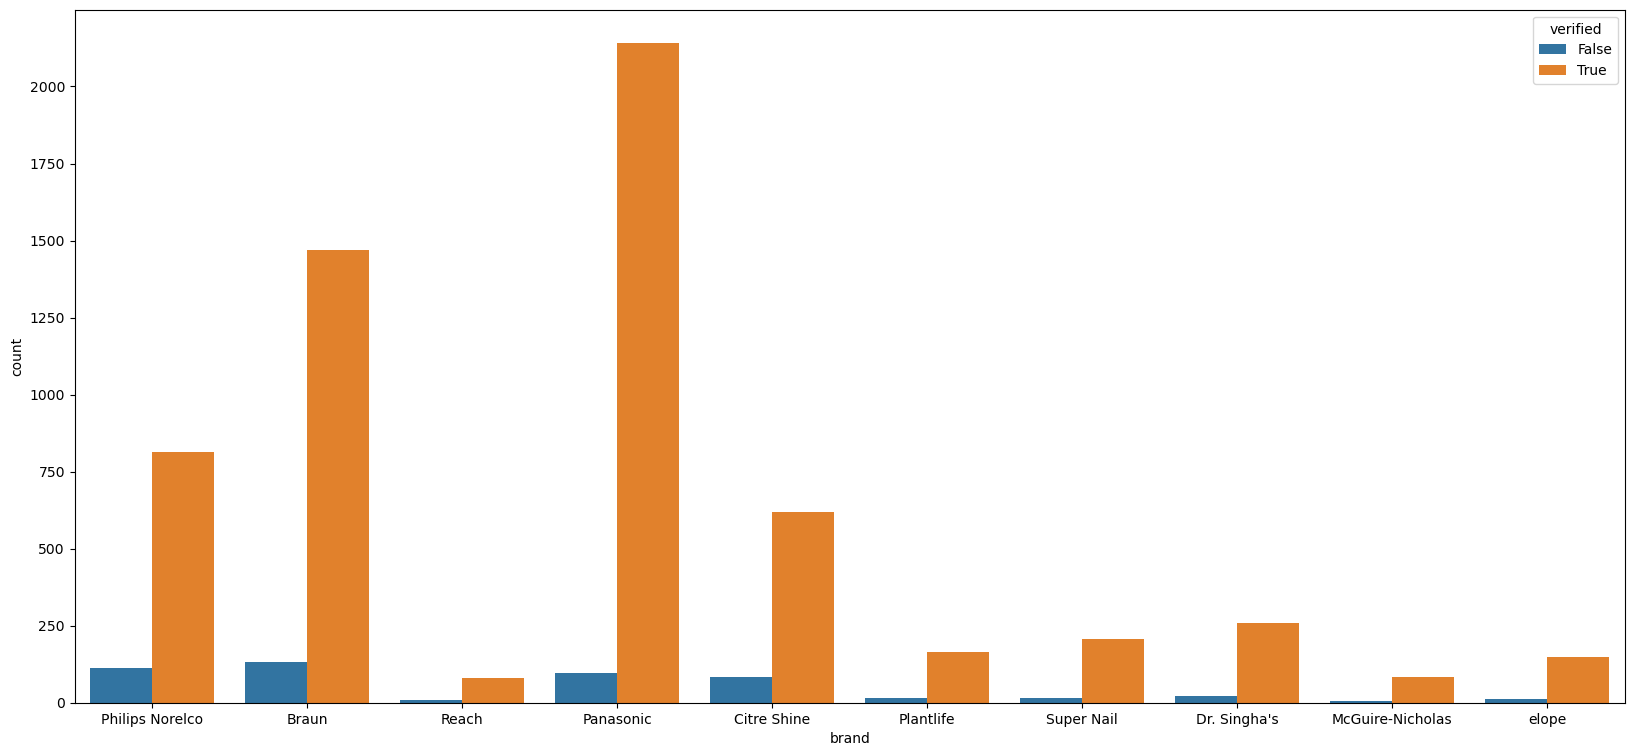

In [79]:
fig, ax = plt.subplots(figsize= (20, 9))
ax = sb.countplot(x ="brand",hue='verified',data=data[data['brand'].isin(data['brand'].value_counts().head(10).index)])

In [80]:
data['brand'].value_counts()

Panasonic                 2237
Braun                     1602
Philips Norelco            929
Citre Shine                700
Dr. Singha's               279
Super Nail                 223
Plantlife                  182
elope                      162
McGuire-Nicholas            92
Reach                       90
Disguise                    62
Occidental Leather          50
Rubie's                     47
MoonDance Soaps & More      41
Dentemp                     38
F ARMAF                     21
General                     19
Biotone                     17
ACE                         16
Panasonic 3DO (Games)       11
Carson-Dellosa               9
Ikonna                       8
Nutrition Supply             7
Gillette                     6
Pirmal Healthcare            5
Kinetronics                  5
LeapFrog                     3
DIY Celebrity Masks          1
Name: brand, dtype: int64

In [81]:
t2=pd.crosstab(index=data['brand'],columns=data['verified'])
t2.sort_values(by='brand',ascending=False)
t2.head()

verified,False,True
brand,,
ACE,6,10
Biotone,2,15
Braun,133,1469
Carson-Dellosa,0,9
Citre Shine,82,618


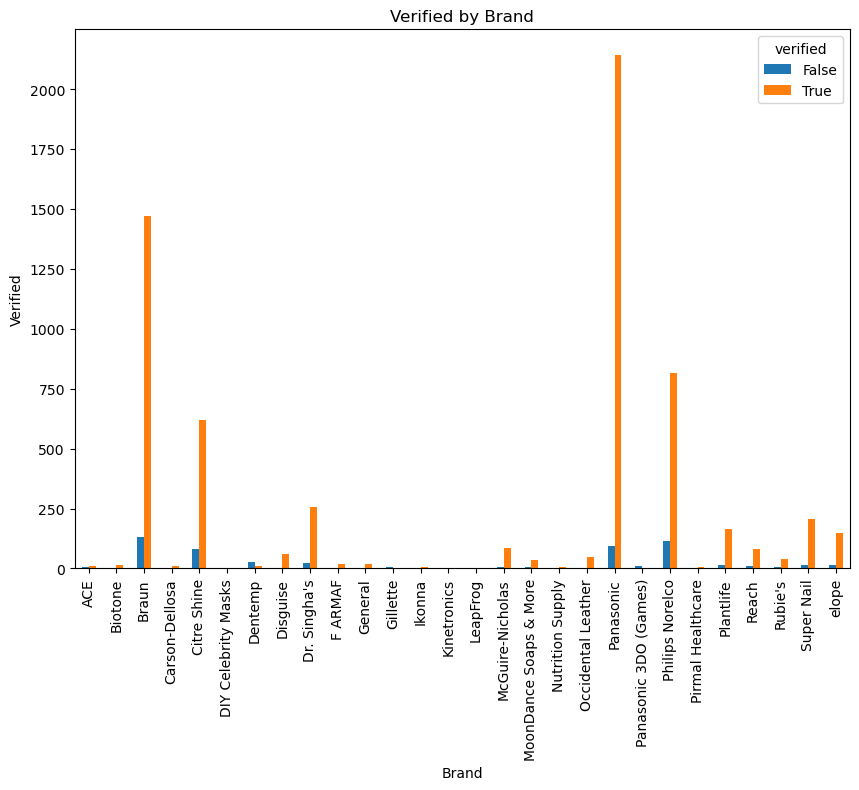

In [82]:
t2.plot(kind='bar',stacked=False,xlabel='Brand',ylabel='Verified',title='Verified by Brand',figsize=(10,7));

In [83]:
info_of_continuous('price')

Mean values in price are: 23.832953949285145
Median values in price are: 18.49
Mode values in price are: 18.49
missing values in price are: 0


In [84]:
info_of_continuous('verified')

Mean values in verified are: 0.9151850772369572
Median values in verified are: 1.0
Mode values in verified are: True
missing values in verified are: 0


<Figure size 1000x600 with 0 Axes>

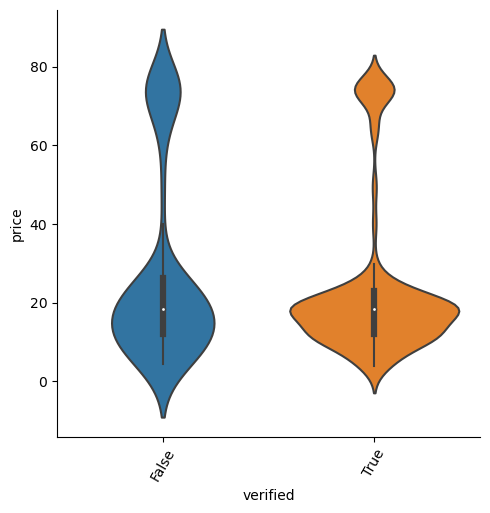

In [85]:
plt.figure(figsize=(10,6))
sb.catplot(data = data, x= 'verified', y= 'price', kind = 'violin')
plt.xticks(rotation=60);

In [86]:
info_of_categorical('overall')

Unique values in overall are: [5 4 1 2 3]
Mode values in overall are: 5
Missing values in overall are: 0


In [87]:
info_of_categorical('price')

Unique values in price are: [12.15 64.5  11.94 27.19  5.79  5.17 18.49 21.05 23.   74.15  9.95 19.75
 14.98  5.43  5.75 29.95 10.54  7.95  4.42 49.5   6.9   3.99 29.74 75.99
  8.99 39.99 74.34 12.21 17.76 26.16 14.75]
Mode values in price are: 18.49
Missing values in price are: 0


<Figure size 1000x600 with 0 Axes>

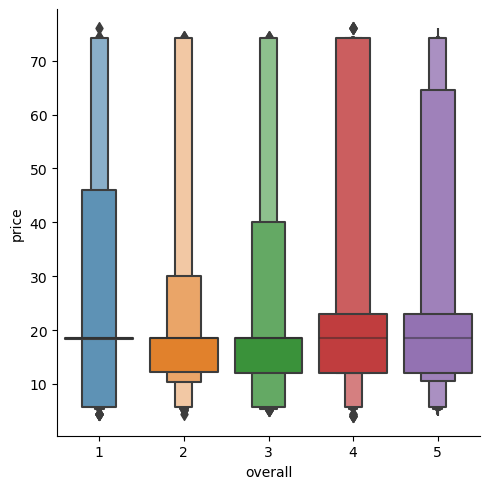

In [88]:
plt.figure(figsize=(10,6))
sb.catplot(data = data, x= 'overall', y= 'price', kind = 'boxen');

In [89]:
a=data.groupby(['brand'])['price'].mean().sort_values(ascending=False).head(10)

In [90]:
a.index

Index(['Panasonic 3DO (Games)', 'Occidental Leather', 'Philips Norelco',
       'Disguise', 'Nutrition Supply', 'F ARMAF', 'Citre Shine', 'Gillette',
       'Rubie's', 'Biotone'],
      dtype='object', name='brand')

In [91]:
a.values

array([75.99      , 74.34      , 70.66415501, 39.99      , 29.95      ,
       29.74      , 23.        , 21.05      , 21.04553191, 19.75      ])

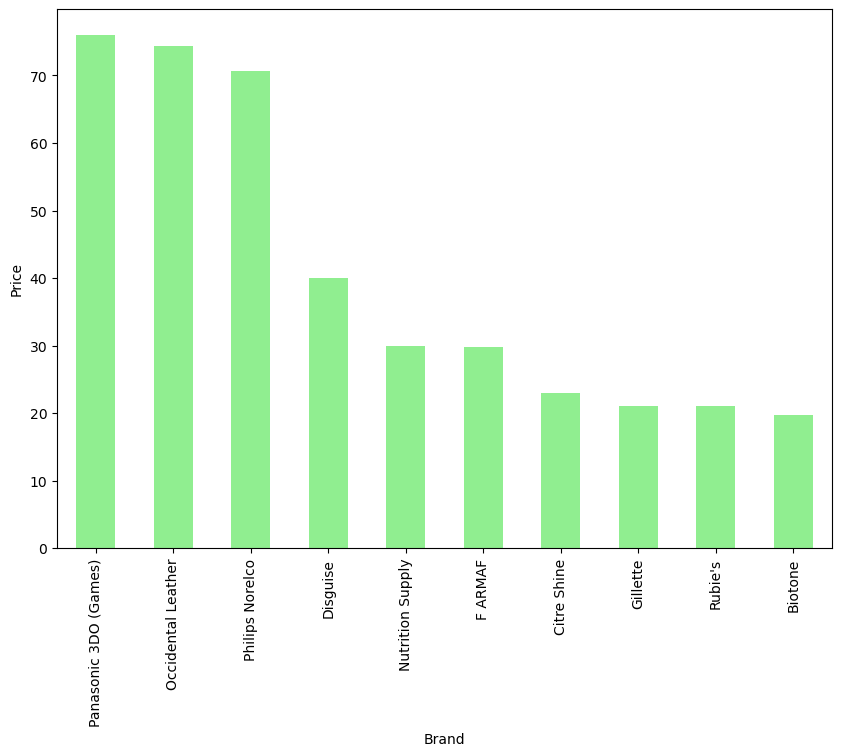

In [92]:
a.plot(kind='bar',xlabel='Brand',ylabel='Price',color='lightgreen',figsize=(10,7));

In [93]:
n=data.groupby(['reviewerName'])['price'].sum()
aa=n.sort_values(ascending=False)
bb=aa[:11]
bb

reviewerName
Amazon Customer    9704.20
Kindle Customer     647.05
Ron                 289.24
Paul                243.23
Steve               187.43
jim                 186.84
Larry               181.28
Sarah               170.92
Jennifer            168.88
Mike                167.58
Don                 160.24
Name: price, dtype: float64

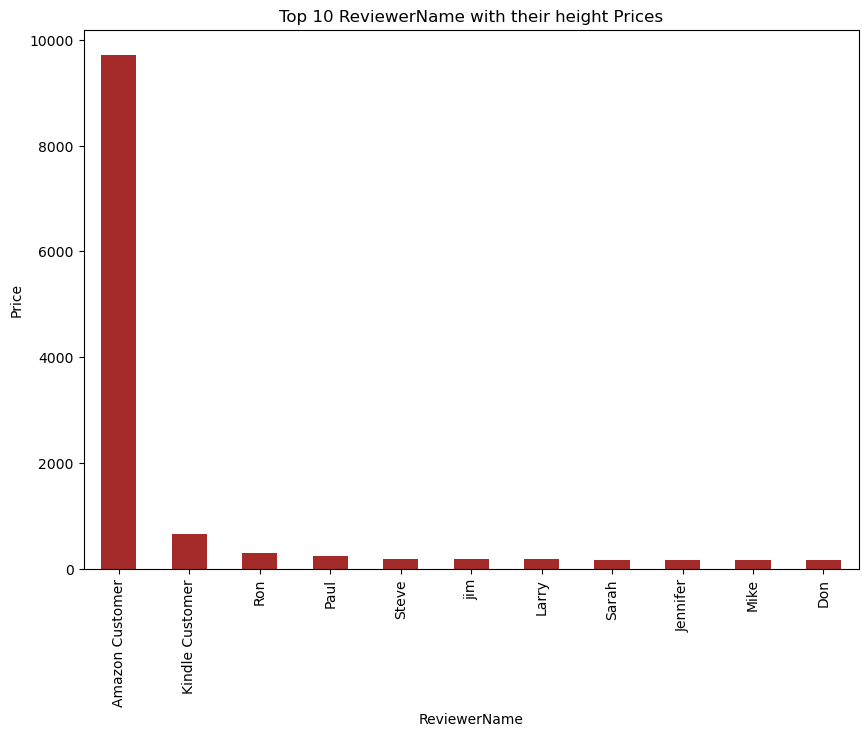

In [94]:
bb.plot(kind='bar',color='brown',xlabel='ReviewerName',ylabel='Price',title='Top 10 ReviewerName with their height Prices',figsize=(10,7));

In [95]:
c=data.groupby(['asin'])['price'].max().sort_values(ascending=False)
cc=c[:6]
cc

asin
B00000INRB    75.99
B00002251L    74.34
B00009RB1C    74.15
B000050B6B    64.50
B0001HYLR0    49.50
B00001W0F2    39.99
Name: price, dtype: float64

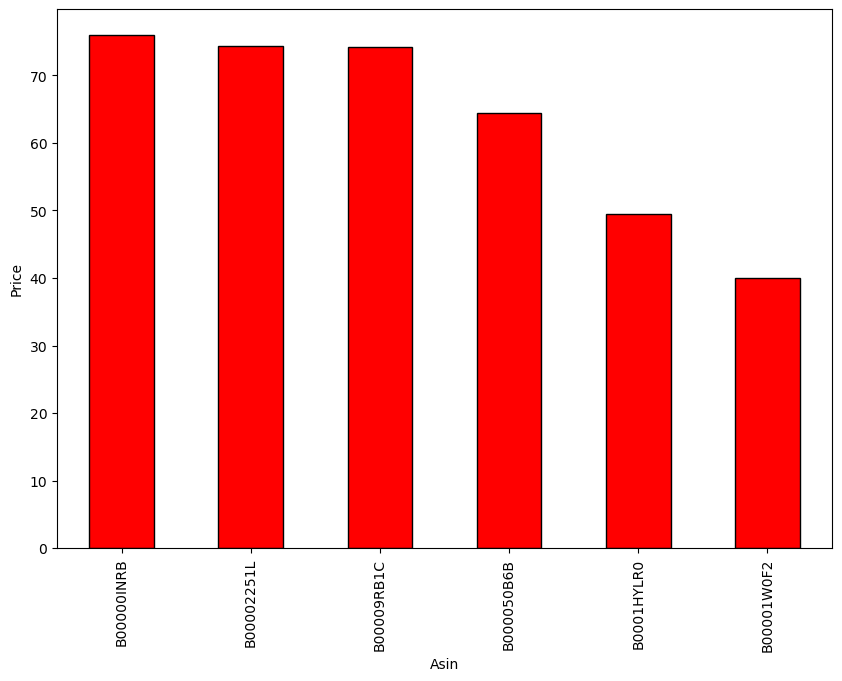

In [96]:
cc.plot(kind='bar',color='r',xlabel='Asin',ylabel='Price',figsize=(10,7),edgecolor='black');

In [97]:
info_of_categorical('main_cat')

Unique values in main_cat are: ['All Beauty' 'Office Products' 'Toys & Games' 'Amazon Home' 'Video Games'
 'Tools & Home Improvement']
Mode values in main_cat are: All Beauty
Missing values in main_cat are: 0


In [98]:
info_of_categorical('verified')

Unique values in verified are: [ True False]
Mode values in verified are: True
Missing values in verified are: 0


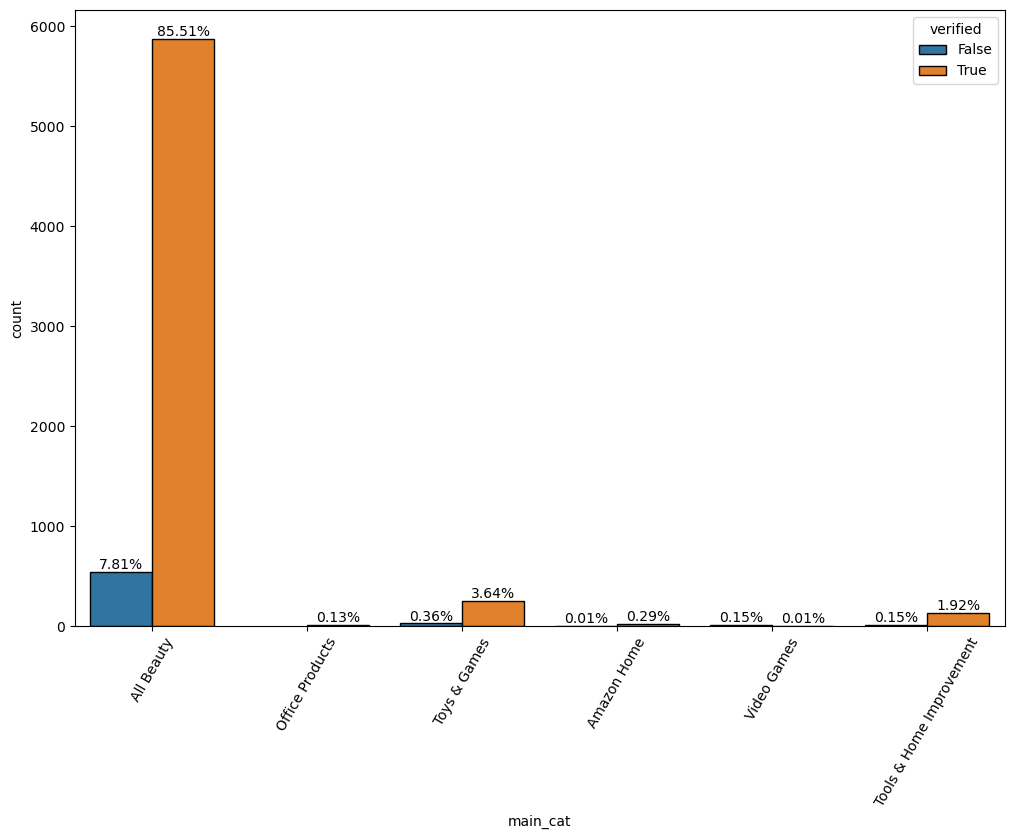

In [99]:
fig, ax = plt.subplots(figsize= (12, 8))
ax = sb.countplot(x = data["main_cat"],hue=data['verified'],edgecolor='black')
for bar in ax.patches:                                               
    percentage = f"{round((bar.get_height() /len(data))*100, 2)}%"      
                                                                    
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                          
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
plt.xticks(rotation=60)
plt.show()

In [100]:
e=data.groupby(['main_cat'])['price'].mean().sort_values(ascending=False)

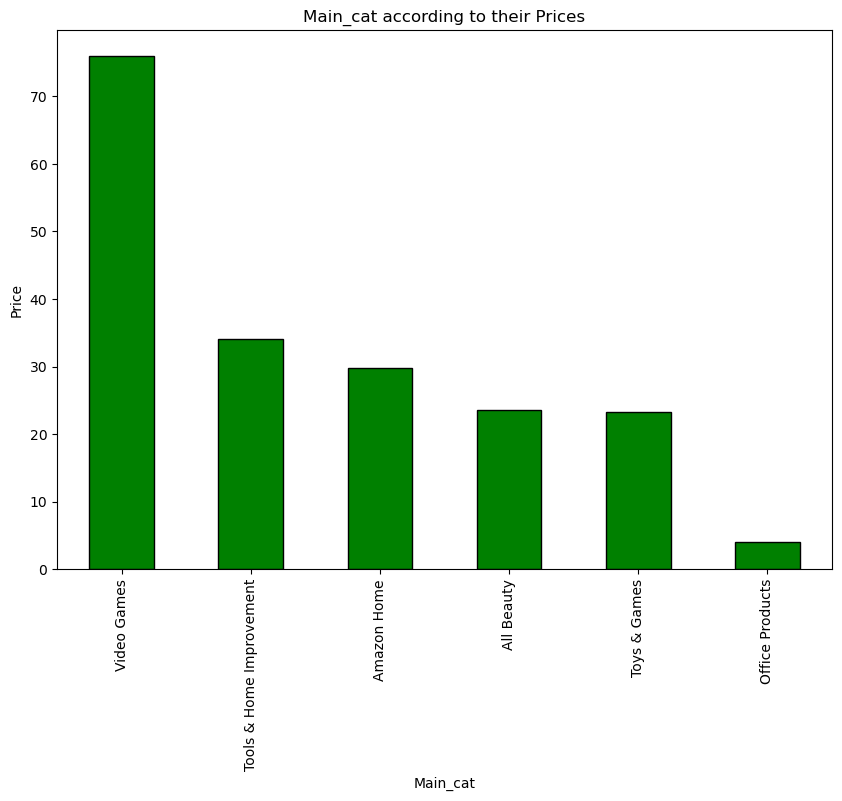

In [101]:
e.plot(kind='bar',color='green',xlabel='Main_cat',ylabel='Price',title='Main_cat according to their Prices',figsize=(10,7),edgecolor='black');

In [102]:
f=data.groupby(['main_cat'])['rank'].min().sort_values(ascending=True)

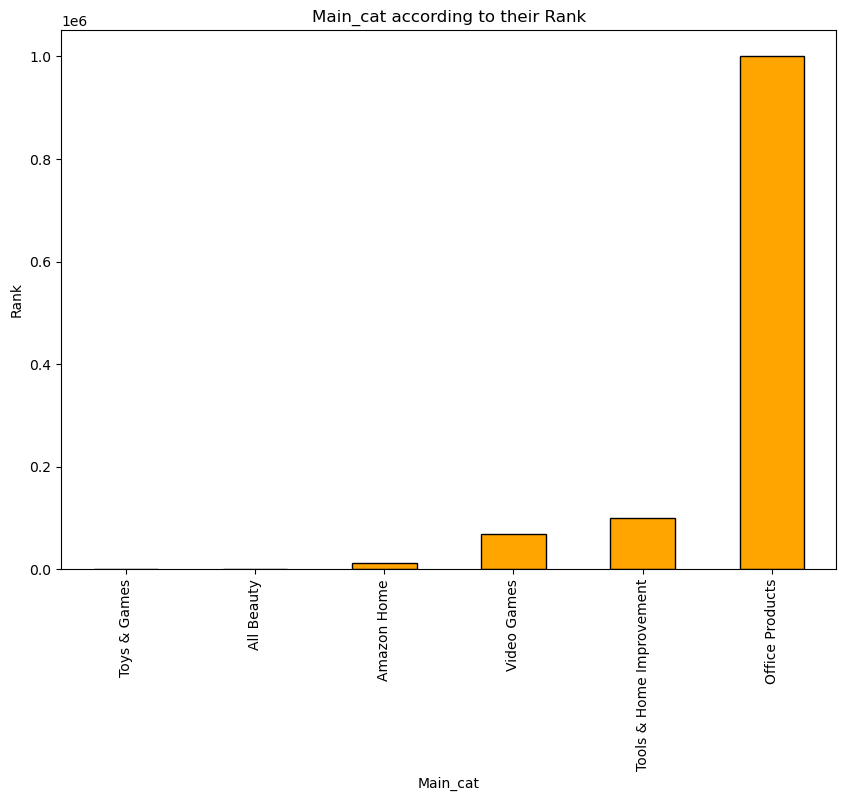

In [103]:
f.plot(kind='bar',color='orange',xlabel='Main_cat',ylabel='Rank',title='Main_cat according to their Rank',figsize=(10,7),edgecolor='black');

# Multi-Variate

In [104]:
info_of_continuous('verified')

Mean values in verified are: 0.9151850772369572
Median values in verified are: 1.0
Mode values in verified are: True
missing values in verified are: 0


In [105]:
info_of_continuous('overall')

Mean values in overall are: 4.38545613523754
Median values in overall are: 5.0
Mode values in overall are: 5
missing values in overall are: 0


In [106]:
info_of_continuous('price')

Mean values in price are: 23.832953949285145
Median values in price are: 18.49
Mode values in price are: 18.49
missing values in price are: 0


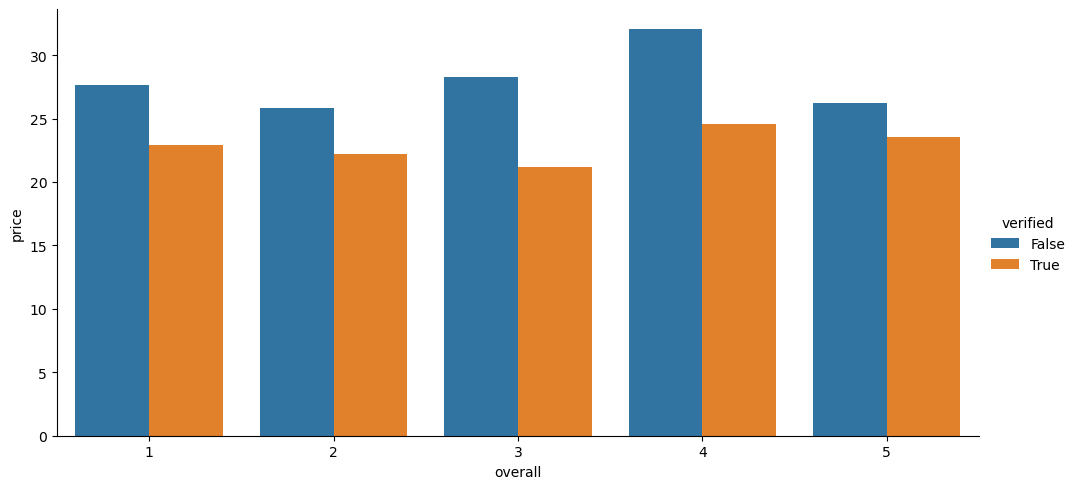

In [107]:
sb.catplot(data = data, x= 'overall', y= 'price', kind = 'bar',hue = 'verified', ci= None, height=5, aspect=2);

In [108]:
info_of_continuous('overall')

Mean values in overall are: 4.38545613523754
Median values in overall are: 5.0
Mode values in overall are: 5
missing values in overall are: 0


In [109]:
info_of_continuous('rank')

Mean values in rank are: 231637.04794520547
Median values in rank are: 1028.0
Mode values in rank are: 457
missing values in rank are: 0


In [110]:
info_of_continuous('verified')

Mean values in verified are: 0.9151850772369572
Median values in verified are: 1.0
Mode values in verified are: True
missing values in verified are: 0


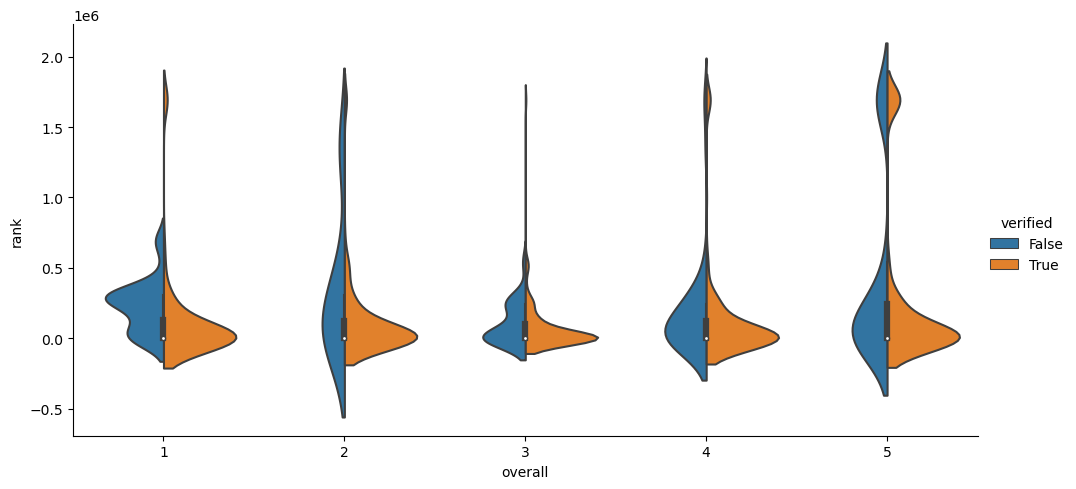

In [111]:
sb.catplot(data = data, x= 'overall', y= 'rank',hue='verified', split= True,  kind = 'violin', height=5, aspect=2);

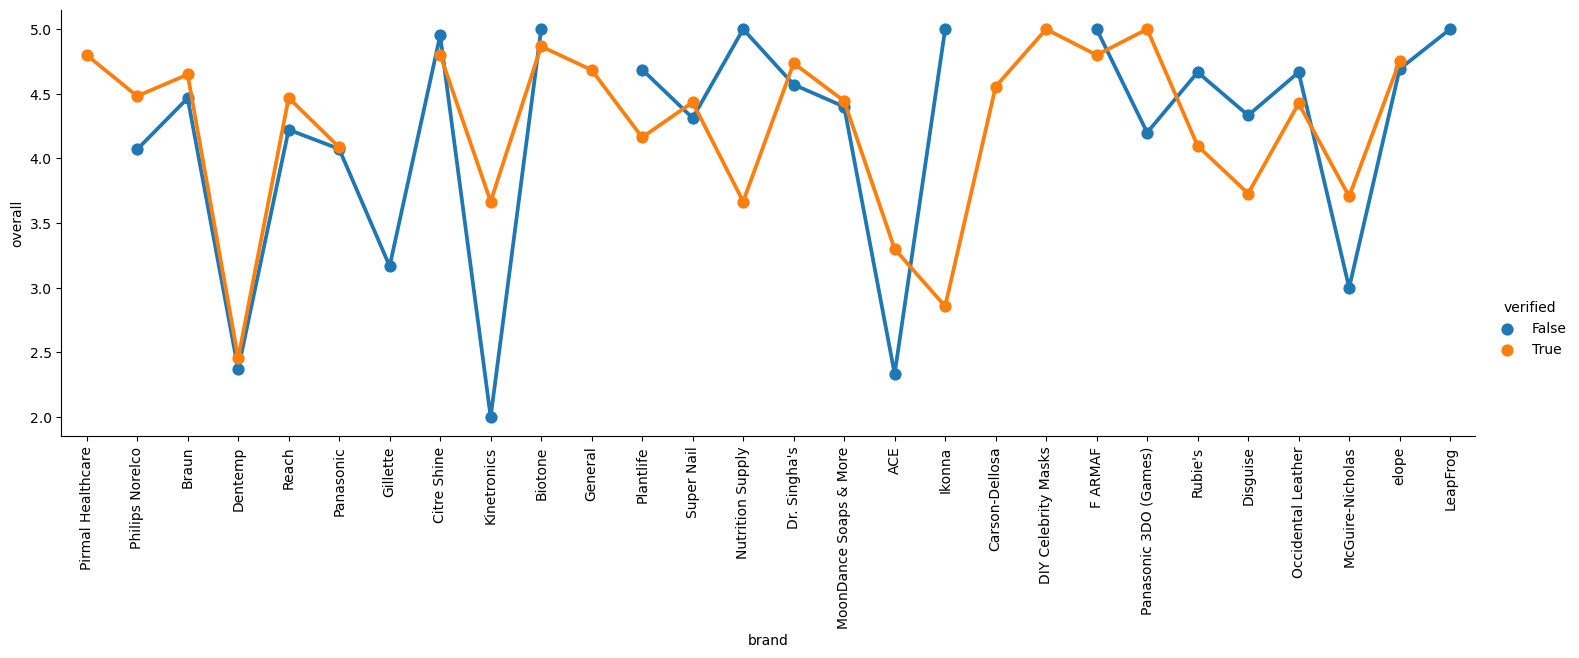

In [112]:
sb.catplot(data = data, x= 'brand', y= 'overall', kind = 'point',hue = 'verified',ci=False, height=5, aspect=3)
plt.xticks(rotation=90);

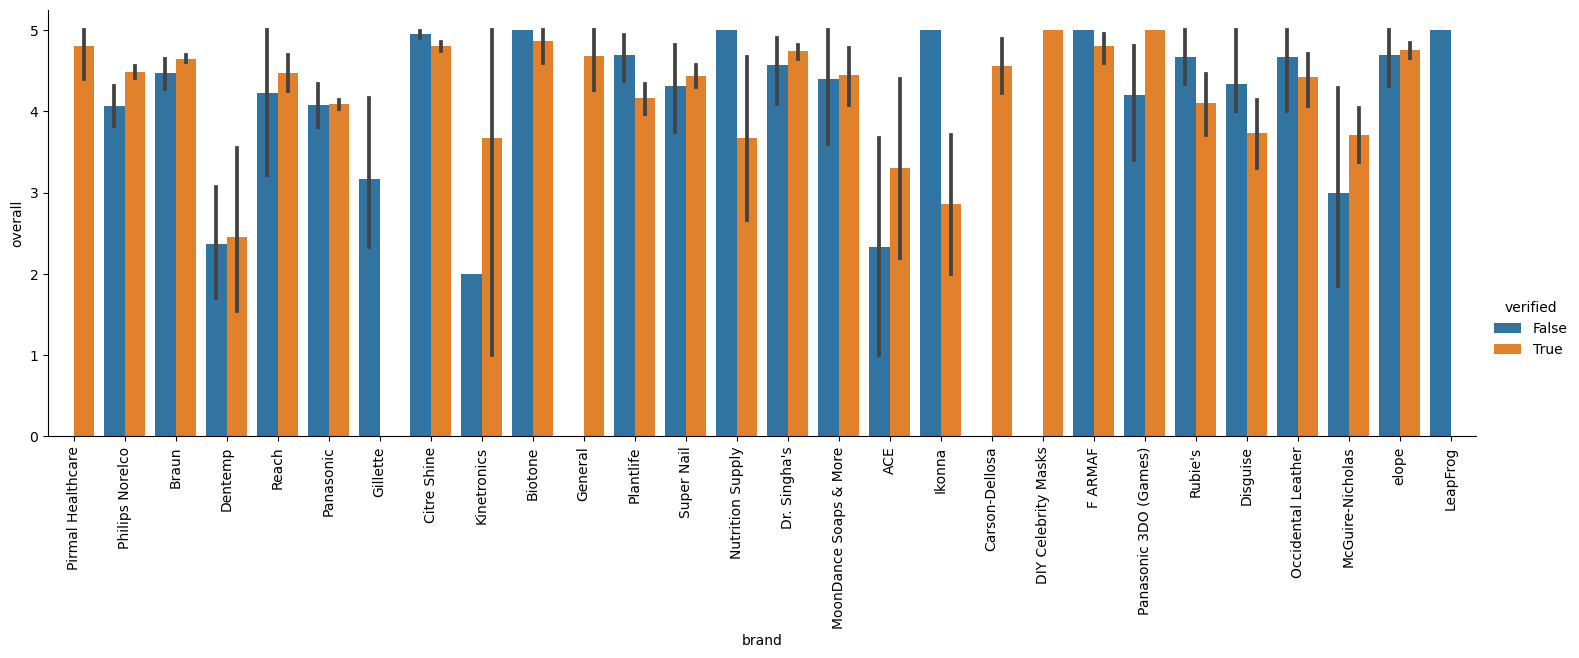

In [113]:
sb.catplot(data = data, x= 'brand', y= 'overall', kind = 'bar',hue = 'verified', height=5, aspect=3)
plt.xticks(rotation=90);

In [53]:
h=pd.pivot_table(data=data,index=['main_cat','overall'],values=['price'],aggfunc=(['sum']))
h.head()

sum
                        price
main_cat   overall           
All Beauty 1          9446.73
           2          4904.80
           3          7130.81
           4         23070.55
           5        106258.30

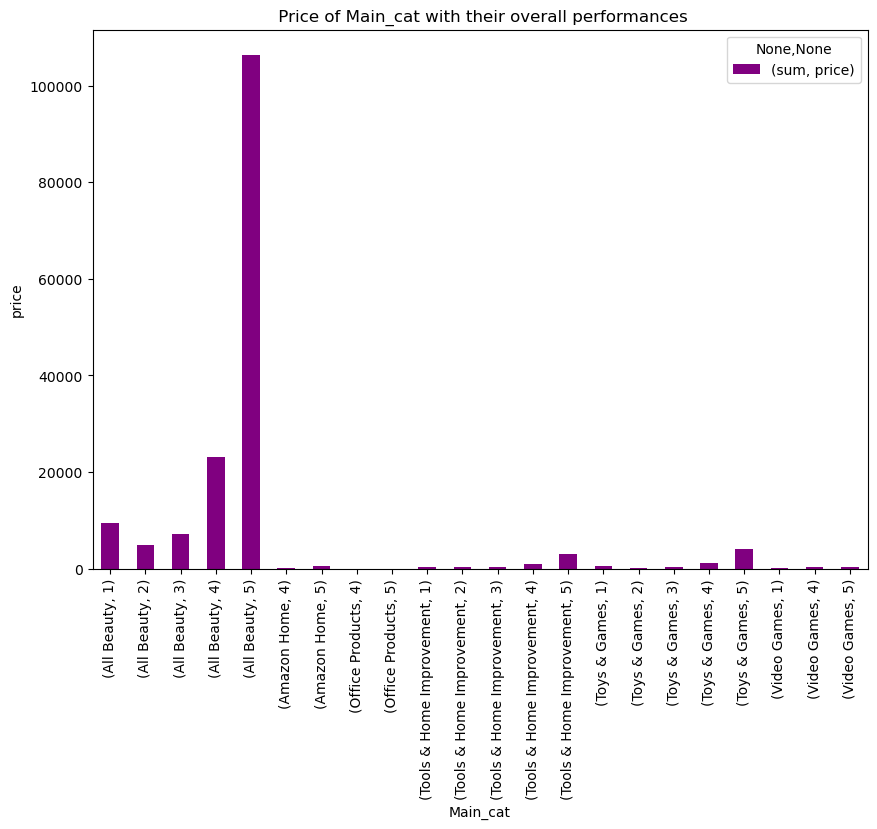

In [115]:
h.plot(kind='bar',color='purple',xlabel='Main_cat',ylabel='price',title=' Price of Main_cat with their overall performances',figsize=(10,7));

In [54]:
i=pd.pivot_table(data=data,index=['reviewerName','brand'],values=['price'],aggfunc=(['max']))
i.sort_values(by='brand',ascending=False)
ii=i[:21]
ii.head()

,,max
,,price
reviewerName,brand,
&#034;claytargets&#034;,Braun,11.94
&#039;Doc&#039;,Dentemp,5.79
&#039;Suits&#039; author,Braun,11.94
&amp;#34;Lindsey&amp;#34;,Philips Norelco,74.15
&amp;pi;.But\&amp;euro;&amp;reg;,Disguise,39.99


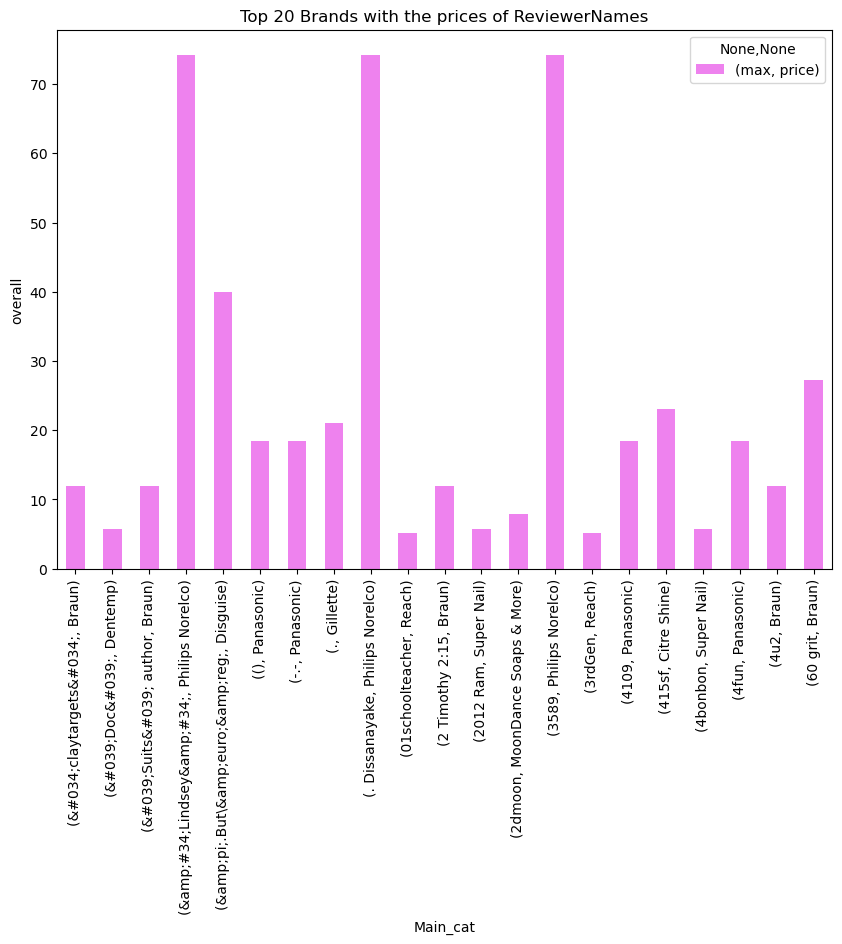

In [117]:
ii.plot(kind='bar',color='violet',xlabel='Main_cat',ylabel='overall',title='Top 20 Brands with the prices of ReviewerNames',figsize=(10,7));

In [118]:
j=pd.pivot_table(data=data,index=['main_cat','rank'],values=['price'],aggfunc=(['mean'])).sort_values(by='rank',ascending=True)
jj=j[:6]
jj

mean
                   price
main_cat     rank       
Toys & Games 111   17.76
             253    8.99
All Beauty   457   18.49
             1028  11.94
Toys & Games 2084   3.99
             3501  39.99

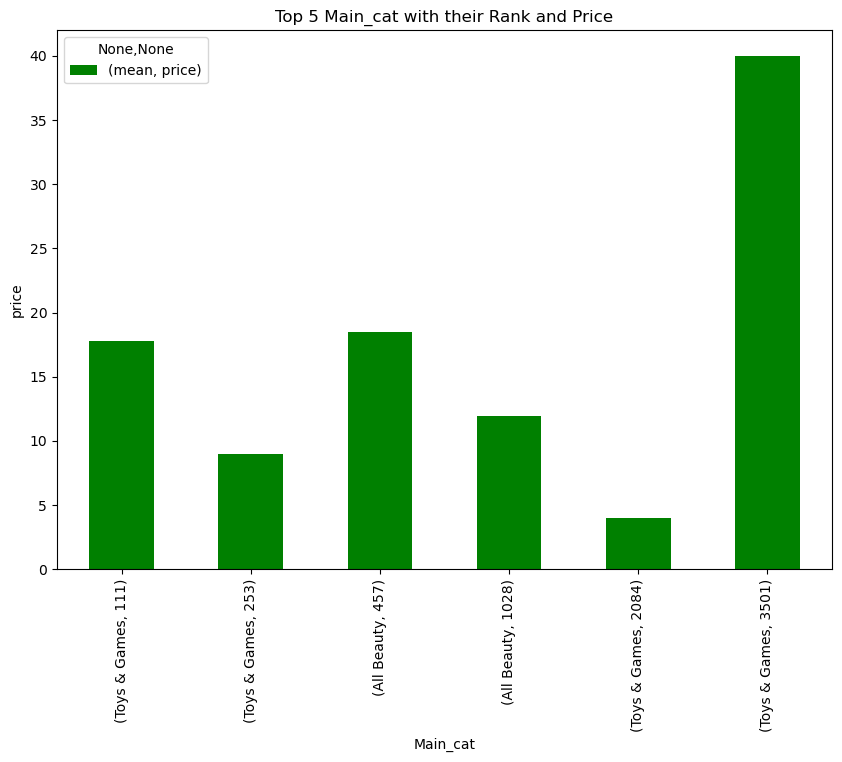

In [119]:
jj.plot(kind='bar',color='green',xlabel='Main_cat',ylabel='price',title='Top 5 Main_cat with their Rank and Price',figsize=(10,7));

# Cleaning the Reviewtext column.

In [57]:
def clean_text(text):
    """
    Return clean version of the text
    """
    # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("[^0-9A-Za-z\-_ ]+", " ", text)
    # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text = " ".join(text.split())
    text = text.lower()
    return text

In [58]:
NBeauty=pd.DataFrame()
NBeauty['text']=data['reviewText'].apply(clean_text)

In [59]:
NBeauty

,text
0,five stars excellent very good
1,five stars great product
2,five stars magical
3,five stars excellent
4,very pricey i do like the product a lot i had ...
...,...
7201,comfortable and true to size my daughter loved...
7203,tiny ruby slippers for tiny feet my daughter l...
10949,great storage item my daughter loves her leap ...
10951,this is great my daughter is in love with the ...


# NLP Pipelines(Text Preprocessing)

# Tokenization

In [60]:
def tokenization(text):
    tokens=[]
    doc=nlp(text)
    for token in doc:
        tokenise=token.text
        tokens.append(tokenise)
    return tokens
#applying function to the column
NBeauty['Tokenisation']= NBeauty['text'].apply(tokenization)

# POS_tagging(parts-of-speech)

In [61]:
def POS(text):
    POS=[]
    doc=nlp(text)
    for token in doc:
        P=token.pos_
        POS.append(P)
    return POS
#applying function to the column
NBeauty['POS']= NBeauty['text'].apply(POS)

# Dependency

In [62]:
def Dep(text):
    Dep=[]
    doc=nlp(text)
    for token in doc:
        P=token.dep_
        Dep.append(P)
    return Dep
#applying function to the column
NBeauty['Syntactic_dependency_relation']= NBeauty['text'].apply(Dep)

# NER(Named Entity Recognization)

In [63]:
def NER(text):
    NER=[]
    doc=nlp(text)
    for ent in doc.ents:
        P=ent.label_
        NER.append(P)
    return NER
#applying function to the column
NBeauty['NER']= NBeauty['text'].apply(NER)

# Lemmatization

In [64]:
def Lemma(text):
    Lemma=[]
    doc=nlp(text)
    for token in doc:
        P=token.lemma_
        Lemma.append(P)
    return Lemma
#applying function to the column
NBeauty['Lemmatization']= NBeauty['text'].apply(Lemma)

# Stopwords Removal

In [65]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('I')
#defining the function to remove stopwords from Lemmatized text
def remove_stopwords(text):
    output=[]
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output
#applying the function
NBeauty['no_stopwords']=NBeauty['Lemmatization'].apply(remove_stopwords)

In [66]:
NBeauty.head(1)

,text,Tokenisation,POS,Syntactic_dependency_relation,NER,Lemmatization,no_stopwords
0,five stars excellent very good,"[five, stars, excellent, very, good]","[NUM, NOUN, ADJ, ADV, ADJ]","[nummod, ROOT, amod, advmod, amod]",[CARDINAL],"[five, star, excellent, very, good]","[five, star, excellent, good]"


In [67]:
def review(x):
    return " ".join(x)
    
NBeauty['Review']=NBeauty['no_stopwords'].apply(review)

In [68]:
NBeauty.head(1)

,text,Tokenisation,POS,Syntactic_dependency_relation,NER,Lemmatization,no_stopwords,Review
0,five stars excellent very good,"[five, stars, excellent, very, good]","[NUM, NOUN, ADJ, ADV, ADJ]","[nummod, ROOT, amod, advmod, amod]",[CARDINAL],"[five, star, excellent, very, good]","[five, star, excellent, good]",five star excellent good


In [69]:
data['Review']=NBeauty['Review']

In [70]:
Review_=" ".join(i for i in NBeauty['Review'])

# Word Counts

In [71]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), max_features = max_features, stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [72]:
bigrams = get_ngrams(NBeauty['Review'], ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_df.head()

,Bigram,Frequency
0,work great,539
1,great product,363
2,star great,292
3,easy use,291
4,star work,282


In [73]:
trigrams = get_ngrams(NBeauty['Review'], ngram_from=3, ngram_to=3, n=15)
trigrams_df = pd.DataFrame(trigrams)
trigrams_df.columns=["Trigram", "Frequency"]
trigrams_df.head()

,Trigram,Frequency
0,star work great,98
1,star great product,94
2,star good product,47
3,work like new,36
4,buy new razor,33


# Sentiment Analysis

In [74]:
#pip install vaderSentiment
def sentiment_scores(Text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(Text)
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05:
        return "Negative"
    else :
        return "Neutral"

In [75]:
NBeauty['sentiments']=NBeauty['text'].apply(sentiment_scores)

In [76]:
data['sentiments']=NBeauty['sentiments']

In [77]:
data.head(3)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,unixReviewTime,title,brand,feature,rank,main_cat,price,Review,sentiments
0,5,True,2016-03-10,A5TA1NJOC0PJ5,7414204790,Amazon Customer,Five Stars Excellent very good,1457568000,Lacto Calamine Skin Balance Oil control 120 ml...,Pirmal Healthcare,,67701,All Beauty,12.15,five star excellent good,Positive
1,5,True,2015-09-01,A1TJICB7VLGQKL,7414204790,LH,Five Stars Great product,1441065600,Lacto Calamine Skin Balance Oil control 120 ml...,Pirmal Healthcare,,67701,All Beauty,12.15,five star great product,Positive
2,5,True,2014-10-03,A80M2286B7STE,7414204790,dolly,Five Stars Magical,1412294400,Lacto Calamine Skin Balance Oil control 120 ml...,Pirmal Healthcare,,67701,All Beauty,12.15,five star magical,Neutral


In [78]:
#import pandas as pd

# Read CSV file into DataFrame
#data = pd.read_csv('data.csv')

#Save DataFrame to a new CSV file on the desktop
#desktop_path =  r'\\DESKTOP-NOP5PE7\Users\LAXMI\Documents'  # Replace 'YourUsername' with your actual username
#save_path = f'{desktop_path}\\data_output.csv'
#data.to_csv(save_path, index=False,header=True)

# Text Classification

In [415]:
x=data['Review']
y=data['sentiments']

In [416]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [417]:
def LR_tfidf(X_train, X_test, y_train, y_test):                              # function for model building
    global myvector,myobject,y_pred,clf                                      # making myvector,myobject,y_pred,clf as global to call it out of the function
    myvector = TfidfVectorizer(ngram_range=(2,2))                            # object of vectorizer
    myobject = myvector.fit_transform(X_train)                               # fitting the train data into vector object and transforming it
    clf = LogisticRegression()
    clf.fit(myobject, y_train)                                               # fitting the data into model
    myobject1 = myvector.transform(X_test)                                   # converting xtest data into numbers through vectorization       
    y_pred= clf.predict(myobject1)                                           # predicting xtest data
    clf_score = clf.score(myobject1, y_test)
    print("Results for LogisticRegression() with tfidf")
    print(clf_score)
    print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))            # display confusion_matrix
    print('classification_report',classification_report(y_test,y_pred))       # display classification_report
    print('Predicted',y_pred[0:30])                                           # display first 30 predictions   

In [418]:
LR_tfidf(X_train,X_test,y_train,y_test)

Results for LogisticRegression() with tfidf
0.8596406022340942
confusion_matrix 
 [[  19    9  150]
 [   2   68  113]
 [   4   11 1683]]
classification_report               precision    recall  f1-score   support

    Negative       0.76      0.11      0.19       178
     Neutral       0.77      0.37      0.50       183
    Positive       0.86      0.99      0.92      1698

    accuracy                           0.86      2059
   macro avg       0.80      0.49      0.54      2059
weighted avg       0.85      0.86      0.82      2059

Predicted ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive']


In [419]:
def NB_tfidf(X_train, X_test, y_train, y_test):                        # function for model building
    global myvector,myobject,y_pred,clf                                #making myvector,myobject,y_pred,clf as global to call it out of the function
    myvector = TfidfVectorizer(ngram_range=(2,2))                      #object of vectorizer
    myobject = myvector.fit_transform(X_train)                         # fitting the train data into vector object and transforming it
    clf = MultinomialNB()
    clf.fit(myobject, y_train)                                         # fitting the data into model
    myobject1 = myvector.transform(X_test)                             # converting xtest data into numbers through vectorization       
    y_pred= clf.predict(myobject1)                                     # predicting xtest data
    clf_score = clf.score(myobject1, y_test)
    print("Results for MultinomialNB with tfidf")
    print(clf_score)
    print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))        # display confusion_matrix
    print('classification_report',classification_report(y_test,y_pred))   # display classification_report
    print('Predicted',y_pred[0:30])                                       #display first 30 predictions

In [420]:
NB_tfidf(X_train, X_test, y_train, y_test)

Results for MultinomialNB with tfidf
0.8246721709567751
confusion_matrix 
 [[   0    0  178]
 [   0    0  183]
 [   0    0 1698]]
classification_report               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       178
     Neutral       0.00      0.00      0.00       183
    Positive       0.82      1.00      0.90      1698

    accuracy                           0.82      2059
   macro avg       0.27      0.33      0.30      2059
weighted avg       0.68      0.82      0.75      2059

Predicted ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


# Countvectorizer

In [421]:
def LR_CV(X_train, X_test, y_train, y_test): # function for model building
    global myvector,myobject,y_pred,clf                                    #making myvector,myobject,y_pred,clf as global to call it out of the function
    myvector = CountVectorizer(ngram_range=(2,2))                                          #object of vectorizer
    myobject = myvector.fit_transform(X_train)                             # fitting the train data into vector object and transforming it
    clf = LogisticRegression()
    clf.fit(myobject, y_train)                            # fitting the data into model
    myobject1 = myvector.transform(X_test)                                  # converting xtest data into numbers through vectorization       
    y_pred= clf.predict(myobject1)                                           # predicting xtest data
    clf_score = clf.score(myobject1, y_test)
    print("Results for LogisticRegression with CountVectorizer")
    print(clf_score)
    print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))            # display confusion_matrix
    print('classification_report',classification_report(y_test,y_pred))       # display classification_report
    print('Predicted',y_pred[0:30])     # display

In [422]:
LR_CV(X_train, X_test, y_train, y_test)

Results for LogisticRegression with CountVectorizer
0.8567265662943176
confusion_matrix 
 [[  29   14  135]
 [   3   63  117]
 [  13   13 1672]]
classification_report               precision    recall  f1-score   support

    Negative       0.64      0.16      0.26       178
     Neutral       0.70      0.34      0.46       183
    Positive       0.87      0.98      0.92      1698

    accuracy                           0.86      2059
   macro avg       0.74      0.50      0.55      2059
weighted avg       0.83      0.86      0.82      2059

Predicted ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [423]:
def NB_CV(X_train, X_test, y_train, y_test):                 # function for model building
    global myvector,myobject,y_pred,clf                      # making myvector,myobject,y_pred,clf as global to call it out of the function
    myvector = CountVectorizer(ngram_range=(2,2))            # object of vectorizer
    myobject = myvector.fit_transform(X_train)               # fitting the train data into vector object and transforming it
    clf = MultinomialNB()
    clf.fit(myobject, y_train)                               # fitting the data into model
    myobject1 = myvector.transform(X_test)                   # converting xtest data into numbers through vectorization       
    y_pred= clf.predict(myobject1)                           # predicting xtest data
    clf_score = clf.score(myobject1, y_test)
    print("Results for MultinomialNB with CountVectorizer")
    print(clf_score)
    print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))          # display confusion_matrix
    print('classification_report',classification_report(y_test,y_pred))     # display classification_report
    print('Predicted',y_pred[0:30])                                         # display first 30 predictions

In [424]:
NB_CV(X_train, X_test, y_train, y_test)

Results for MultinomialNB with CountVectorizer
0.8338999514327343
confusion_matrix 
 [[  24    7  147]
 [   4    8  171]
 [  10    3 1685]]
classification_report               precision    recall  f1-score   support

    Negative       0.63      0.13      0.22       178
     Neutral       0.44      0.04      0.08       183
    Positive       0.84      0.99      0.91      1698

    accuracy                           0.83      2059
   macro avg       0.64      0.39      0.40      2059
weighted avg       0.79      0.83      0.78      2059

Predicted ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


# OnevsRest classifer

In [425]:
def LR_OVR(X_train, X_test, y_train, y_test):           # function for model building
    global myvector,myobject,y_pred,clf                 # making myvector,myobject,y_pred,clf as global to call it out of the function
    myvector = TfidfVectorizer(ngram_range=(2,2))       #object of vectorizer
    myobject = myvector.fit_transform(X_train)          # fitting the train data into vector object and transforming it
    lr = LogisticRegression()
    clf= OneVsRestClassifier(lr)  
    clf.fit(myobject, y_train)                          # fitting the data into model
    myobject1 = myvector.transform(X_test)              # converting xtest data into numbers through vectorization       
    y_pred= clf.predict(myobject1)                      # predicting xtest data
    clf_score = clf.score(myobject1, y_test)
    print("Results for One Vs Rest LogisticRegression() with ovr")
    print(clf_score)
    print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))          # display confusion_matrix
    print('classification_report',classification_report(y_test,y_pred))     # display classification_report
    print('Predicted',y_pred[0:30])                                         # display first 30 predictions

In [426]:
LR_OVR(X_train, X_test, y_train, y_test)

Results for One Vs Rest LogisticRegression() with ovr
0.8528411850412821
confusion_matrix 
 [[  11    6  161]
 [   2   58  123]
 [   3    8 1687]]
classification_report               precision    recall  f1-score   support

    Negative       0.69      0.06      0.11       178
     Neutral       0.81      0.32      0.45       183
    Positive       0.86      0.99      0.92      1698

    accuracy                           0.85      2059
   macro avg       0.78      0.46      0.50      2059
weighted avg       0.84      0.85      0.81      2059

Predicted ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive']


In [427]:
def NB_OVR(X_train, X_test, y_train, y_test): 
    global myvector,myobject,y_pred,clf                
    myvector = TfidfVectorizer(ngram_range=(2,2))                              
    myobject = myvector.fit_transform(X_train)                    
    NB = MultinomialNB()
    clf= OneVsRestClassifier(NB)  
    clf.fit(myobject, y_train)                        
    myobject1 = myvector.transform(X_test)                                 
    y_pred= clf.predict(myobject1)                                          
    clf_score = clf.score(myobject1, y_test)
    print("Results for One Vs Rest Multinomial Naive Bayes with ovr")
    print(clf_score)
    print('confusion_matrix','\n',confusion_matrix(y_test,y_pred))   
    print('classification_report',classification_report(y_test,y_pred))      
    print('Predicted',y_pred[0:30])     

In [428]:
NB_OVR(X_train, X_test, y_train, y_test)

Results for One Vs Rest Multinomial Naive Bayes with ovr
0.8246721709567751
confusion_matrix 
 [[   0    0  178]
 [   0    0  183]
 [   0    0 1698]]
classification_report               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       178
     Neutral       0.00      0.00      0.00       183
    Positive       0.82      1.00      0.90      1698

    accuracy                           0.82      2059
   macro avg       0.27      0.33      0.30      2059
weighted avg       0.68      0.82      0.75      2059

Predicted ['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [433]:
bigrams = get_ngrams(data[data['sentiments']=='Positive']['Review'], ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_p=bigrams_df.head(10).sort_values(by='Frequency')
bigrams_p.head()

,Bigram,Frequency
9,close shave,162
8,good price,178
7,good product,196
6,star work,221
5,replacement head,234


In [434]:
bigrams = get_ngrams(data[data['sentiments']=='Neutral']['Review'], ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_neu=bigrams_df.head(10).sort_values(by='Frequency')
bigrams_neu.head()

,Bigram,Frequency
9,star need,10
5,close shave,11
6,work advertise,11
7,replacement head,11
8,star product,11


In [435]:
bigrams = get_ngrams(data[data['sentiments']=='Negative']['Review'], ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_n=bigrams_df.head(10).sort_values(by='Frequency')
bigrams_n.head()

,Bigram,Frequency
9,work fine,16
7,time use,17
8,work month,17
6,use time,19
5,pull hair,20


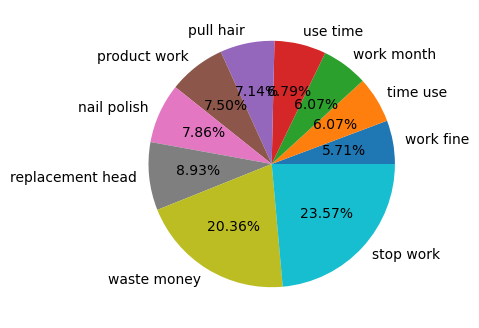

In [436]:
plt.figure(figsize=(12,4))
a=bigrams_n['Bigram']
b=bigrams_n['Frequency']
plt.pie(b,labels=a,autopct='%.2f%%');

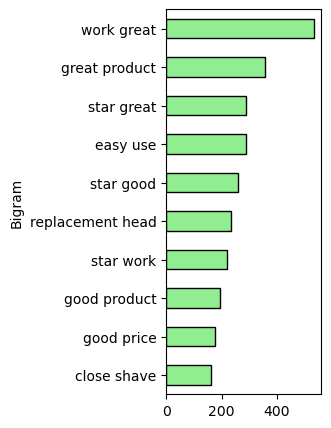

In [108]:
bigrams_p.plot(kind='barh',x='Bigram',figsize=(2,5),legend=None,color='lightgreen',edgecolor='black');

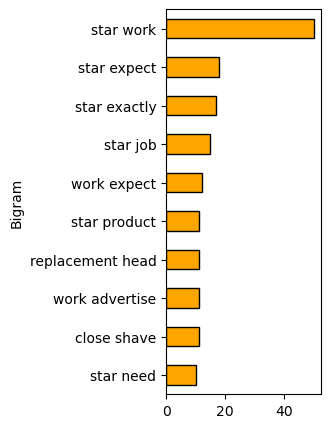

In [223]:
bigrams_neu.plot(kind='barh',x='Bigram',figsize=(2,5),legend=None,color='orange',edgecolor='black');

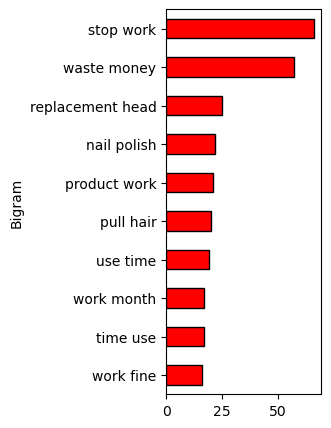

In [222]:
bigrams_n.plot(kind='barh',x='Bigram',figsize=(2,5),legend=None,color='red',edgecolor='black');

In [ ]:
#Information about DataFrame.

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
#Finding Correlation

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(10,8))
sb.heatmap(data.corr(),annot=True,linewidths=.5,linecolor='black',center=0,cmap='bone_r');

In [ ]:
conclusion:-unixReviewTime have to be excluded for model building as they corrleate with the Price.

# Classification

In [437]:
Class=data[data['verified']==True]
Class=data.drop(columns=['asin','reviewerID','reviewText','title','Review','reviewTime','feature','verified'],axis=1)

# Label_encoding()

In [438]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
Class['reviewerName']=a.fit_transform(Class['reviewerName'])
Class['brand']=a.fit_transform(Class['brand'])
Class['main_cat']=a.fit_transform(Class['main_cat'])
Class['sentiments']=a.fit_transform(Class['sentiments'])

# Building the model.

In [439]:
x=Class.drop(columns=['sentiments','unixReviewTime'],axis=1)
y=Class['sentiments']

# Feature Scaling

In [440]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(x)
X=pd.DataFrame(scale,columns=x.columns)
X

,overall,reviewerName,brand,rank,main_cat,price
0,0.533550,-1.418826,0.980513,-0.322585,-0.260693,-0.576675
1,0.533550,-0.013546,0.980513,-0.322585,-0.260693,-0.576675
2,0.533550,1.372644,0.980513,-0.322585,-0.260693,-0.576675
3,0.533550,-0.377919,0.980513,-0.322585,-0.260693,-0.576675
4,-0.334655,-1.049399,0.980513,-0.322585,-0.260693,-0.576675
...,...,...,...,...,...,...
6857,0.533550,1.143578,1.326862,-0.437942,4.156291,0.114864
6858,-0.334655,0.014526,1.326862,-0.437942,4.156291,0.114864
6859,0.533550,0.643336,0.056917,-0.446765,4.156291,-0.448338
6860,0.533550,1.722982,0.056917,-0.446765,4.156291,-0.448338


# Importing the Libraries for Model Buliding.

In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the models of Cross-Validation

In [442]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,RepeatedStratifiedKFold  #for finding the scores of cross-validations

In [443]:
model_LOG=LogisticRegression()
model_GAU=GaussianNB()
model_SVM=SVC()
model_KNN=KNeighborsClassifier()
model_DT=DecisionTreeClassifier()
model_ADA=AdaBoostClassifier()
model_GRA=GradientBoostingClassifier()
model_RAM=RandomForestClassifier()

In [444]:
lbl=[]
#BASE Model
lbl.append(('NB',GaussianNB()))
lbl.append(('AD',AdaBoostClassifier()))
lbl.append(('KNN',KNeighborsClassifier()))
lbl.append(('DT',DecisionTreeClassifier()))
lbl.append(('RF',RandomForestClassifier()))
lbl.append(('GB',GradientBoostingClassifier()))
lbl.append(('SVM',SVC()))
#Meta Model
l1=LogisticRegression()
#define the stacking
model_stack=StackingClassifier(estimators=lbl,final_estimator=l1,cv=9)

# Checking the accuracy for each model to find the best model for further.

In [445]:
model=[model_LOG,model_GAU,model_SVM,model_KNN,model_DT,model_ADA,model_GRA,model_RAM,model_stack]
L,G,S,K,D,A,GR,RA,ST=[],[],[],[],[],[],[],[],[]
splits=[2,3,4,5,6,7,8,9,10]
for i in splits:
    cv=KFold(n_splits=i,shuffle=True,random_state=42)
    for j in model:
        score=cross_val_score(j,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
        if j==model_LOG:
            L.append(score.mean())
        elif j==model_GAU:
            G.append(score.mean())
        elif j==model_SVM:
            S.append(score.mean())
        elif j==model_KNN:
            K.append(score.mean())
        elif j==model_DT:
            D.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model_GRA:
            GR.append(score.mean())
        elif j==model_RAM:
            RA.append(score.mean())
        elif j==model_stack:
            ST.append(score.mean())
print('Accuracy score of different Models with number of splits')
pd.DataFrame({'n_splits':splits,'LogisticRegression':L,'GaussianNB':G,'SVC':S,'KNeighborsClassifier':K,'DecisionTreeClassifier':D,'AdaBoostClassifier':A,'GradientBoostingClassifier':GR,'Ramdom_Forest':RA,'Stacking':ST}).set_index('n_splits')

Accuracy score of different Models with number of splits


,LogisticRegression,GaussianNB,SVC,KNeighborsClassifier,DecisionTreeClassifier,AdaBoostClassifier,GradientBoostingClassifier,Ramdom_Forest,Stacking
n_splits,,,,,,,,,
2,0.850772,0.848441,0.849169,0.834742,0.763334,0.847858,0.842320,0.769018,0.849024
3,0.851065,0.849170,0.848733,0.834452,0.771496,0.846547,0.847567,0.774119,0.851501
4,0.850773,0.849315,0.849753,0.831974,0.767854,0.847858,0.847712,0.770913,0.850335
5,0.850776,0.849462,0.850047,0.831976,0.766834,0.848734,0.847860,0.772663,0.848735
6,0.850774,0.849461,0.848442,0.833287,0.766541,0.848733,0.847713,0.772372,0.850773
7,0.850776,0.849608,0.848590,0.833143,0.768730,0.849317,0.847568,0.774412,0.849463
8,0.850774,0.849461,0.849316,0.829205,0.767999,0.847567,0.849461,0.773683,0.849899
9,0.850776,0.849462,0.848444,0.831104,0.768582,0.849608,0.848588,0.771937,0.848734
10,0.850776,0.849026,0.848736,0.829794,0.766544,0.848587,0.848297,0.773831,0.849609


# Prediction of data

In [118]:
# Logistic Regression KFold
cv=KFold(n_splits=4,shuffle=True,random_state=42)
score=cross_val_score(model_LOG,X,y,scoring='accuracy',n_jobs=-1,cv=cv)
print('Mean Score using Logistic Regression:',(score.mean())*100)

from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_LOG,X, y, cv=cv)
pred

Mean Score using Logistic Regression: 85.07733762835804


array([2, 2, 2, ..., 2, 2, 2])

# Building the model for Clustering Algorithms.

# Importing the Libraries.

In [119]:
from sklearn.cluster import KMeans                          # for Kmeans used for clustering
from sklearn.cluster import AgglomerativeClustering         # for AgglomerativeClustering used for clustering          
from scipy.cluster import hierarchy as hc                   #for finding the no.of clusters(dendogram)    
from sklearn.cluster import DBSCAN                          #for DBSCAN used for clustering
from sklearn import metrics                                 #used to performance of a model 
from sklearn.metrics import silhouette_score

# Kmeans Algorithms

In [120]:
Class

,overall,reviewerName,unixReviewTime,brand,rank,main_cat,price,sentiments
0,5,232,1457568000,22,67701,0,12.15,2
1,5,2735,1441065600,22,67701,0,12.15,2
2,5,5204,1412294400,22,67701,0,12.15,1
3,5,2086,1407369600,22,67701,0,12.15,2
4,4,890,1402704000,22,67701,0,12.15,0
...,...,...,...,...,...,...,...,...
7201,5,4796,1353283200,25,9077,4,26.16,2
7203,4,2785,1262217600,25,9077,4,26.16,2
10949,5,3905,1050624000,14,4593,4,14.75,2
10951,5,5828,1042502400,14,4593,4,14.75,2


In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(Class)
data1=pd.DataFrame(scale,columns=Class.columns)
data1

,overall,reviewerName,unixReviewTime,brand,rank,main_cat,price,sentiments
0,0.533550,-1.418826,0.356439,0.980513,-0.322585,-0.260693,-0.576675,0.425232
1,0.533550,-0.013546,0.167580,0.980513,-0.322585,-0.260693,-0.576675,0.425232
2,0.533550,1.372644,-0.161687,0.980513,-0.322585,-0.260693,-0.576675,-1.227056
3,0.533550,-0.377919,-0.218048,0.980513,-0.322585,-0.260693,-0.576675,0.425232
4,-0.334655,-1.049399,-0.271443,0.980513,-0.322585,-0.260693,-0.576675,-2.879343
...,...,...,...,...,...,...,...,...
6857,0.533550,1.143578,-0.837031,1.326862,-0.437942,4.156291,0.114864,0.425232
6858,-0.334655,0.014526,-1.879215,1.326862,-0.437942,4.156291,0.114864,0.425232
6859,0.533550,0.643336,-4.300761,0.056917,-0.446765,4.156291,-0.448338,0.425232
6860,0.533550,1.722982,-4.393707,0.056917,-0.446765,4.156291,-0.448338,0.425232


# Elbow_method

In [122]:
a=data1

For n_clusters = 2 The average silhouette_score is : 0.1838640799649758
For n_clusters = 3 The average silhouette_score is : 0.22259178439112026
For n_clusters = 4 The average silhouette_score is : 0.33211501388301823
For n_clusters = 5 The average silhouette_score is : 0.36982861662932776
For n_clusters = 6 The average silhouette_score is : 0.33232841416549147
For n_clusters = 7 The average silhouette_score is : 0.30425883794879727
For n_clusters = 8 The average silhouette_score is : 0.3263278794885009
For n_clusters = 9 The average silhouette_score is : 0.32880201172124685
For n_clusters = 10 The average silhouette_score is : 0.3317437624542158
For n_clusters = 11 The average silhouette_score is : 0.3362867717241461
For n_clusters = 12 The average silhouette_score is : 0.32865884916934984
For n_clusters = 13 The average silhouette_score is : 0.3162976100079211
For n_clusters = 14 The average silhouette_score is : 0.33249948041703153
For n_clusters = 15 The average silhouette_score is

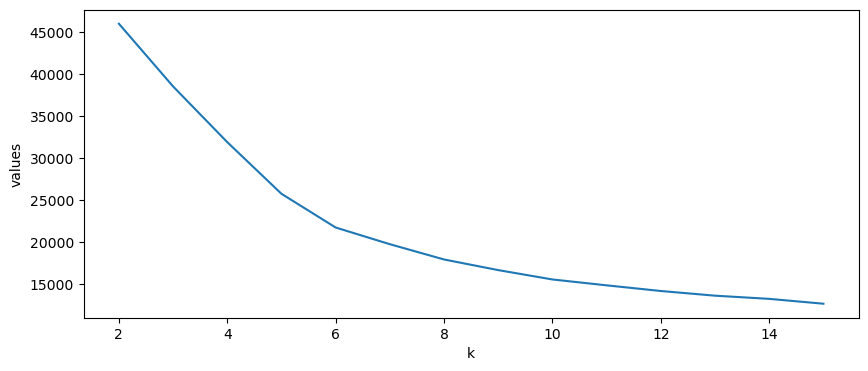

In [135]:
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(a)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_pred=KM.fit_predict(a) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(a,y_pred))

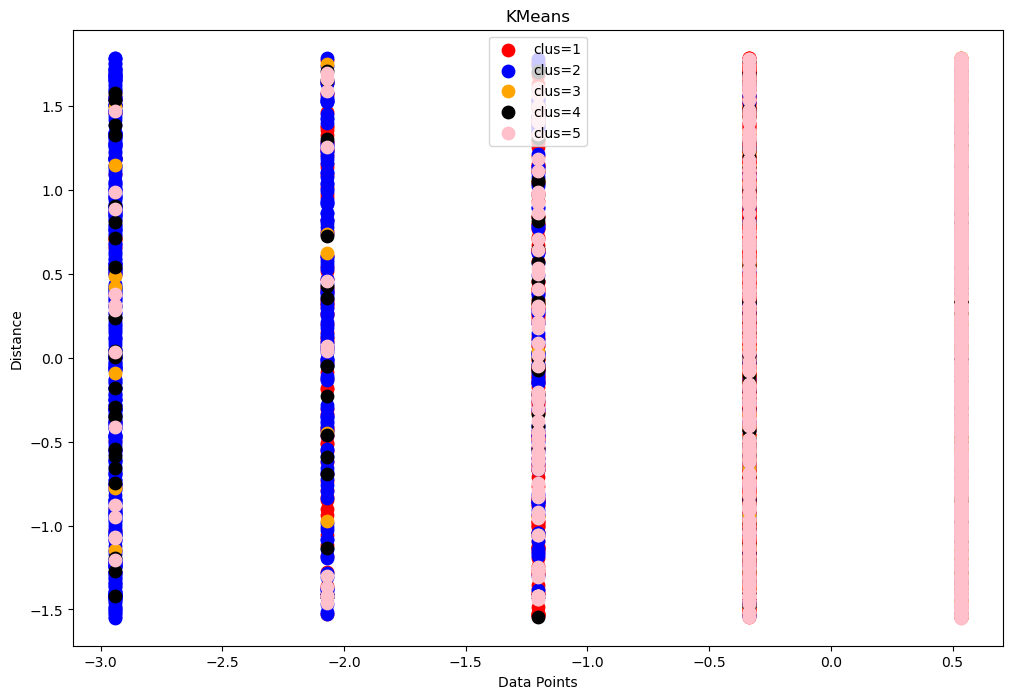

In [136]:
KM=KMeans(n_clusters=5)
KM_Model=KM.fit(a)
y_pred=KM_Model.labels_
#a=a.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(a[y_pred==0,0],a[y_pred==0,1],s=80,color='red',label='clus=1')
plt.scatter(a[y_pred==1,0],a[y_pred==1,1],s=80,color='blue',label='clus=2')
plt.scatter(a[y_pred==2,0],a[y_pred==2,1],s=80,color='orange',label='clus=3')
plt.scatter(a[y_pred==3,0],a[y_pred==3,1],s=80,color='black',label='clus=4')
plt.scatter(a[y_pred==4,0],a[y_pred==4,1],s=80,color='pink',label='clus=5')
plt.title("KMeans")
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend();

# ReviewerName and Price Clustering

For n_clusters = 2 The average silhouette_score is : 0.5841301430234844
For n_clusters = 3 The average silhouette_score is : 0.5595317612747002
For n_clusters = 4 The average silhouette_score is : 0.5046977462208582
For n_clusters = 5 The average silhouette_score is : 0.5083965322472155
For n_clusters = 6 The average silhouette_score is : 0.4511489130324911
For n_clusters = 7 The average silhouette_score is : 0.40858860495916544
For n_clusters = 8 The average silhouette_score is : 0.39253526067544164
For n_clusters = 9 The average silhouette_score is : 0.38559125596191174
For n_clusters = 10 The average silhouette_score is : 0.38052553856540855
For n_clusters = 11 The average silhouette_score is : 0.4112528995830396
For n_clusters = 12 The average silhouette_score is : 0.4041642081444936
For n_clusters = 13 The average silhouette_score is : 0.4037096711966159
For n_clusters = 14 The average silhouette_score is : 0.41875177172714545
For n_clusters = 15 The average silhouette_score is : 

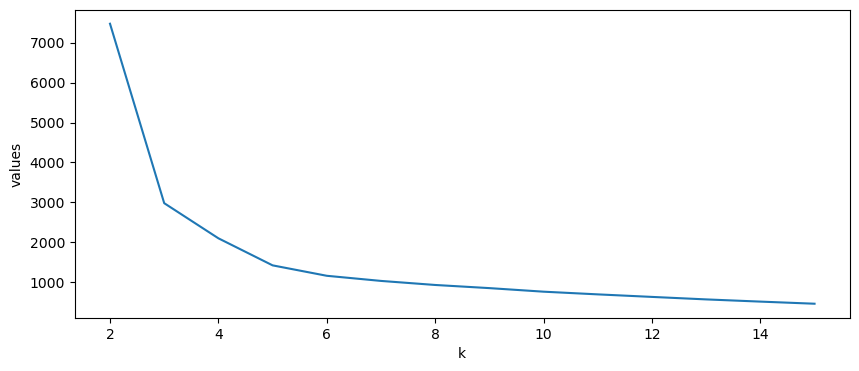

In [137]:
d1=data1.loc[:,['reviewerName','price']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d1)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d1) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d1,y_km))

The Good k-value is 3.

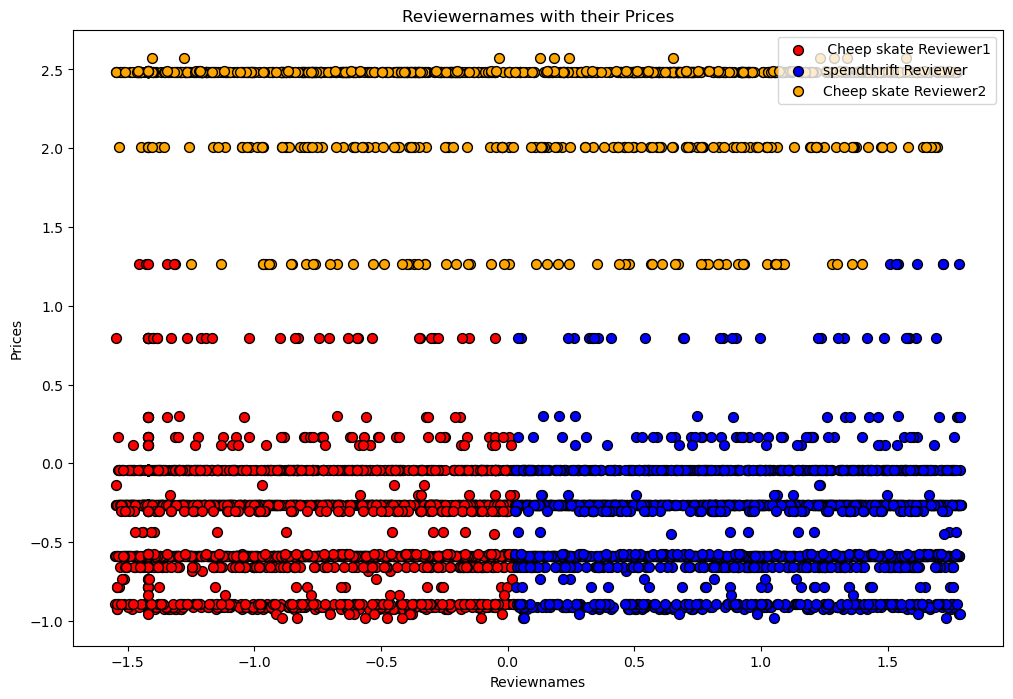

In [330]:
KM=KMeans(n_clusters=3)
KM_Model=KM.fit(d1)
y_pred=KM_Model.labels_
#d1=d1.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d1[y_pred==0,0],d1[y_pred==0,1],s=50,color='red',label=' Cheep skate Reviewer1',edgecolors='black')
plt.scatter(d1[y_pred==1,0],d1[y_pred==1,1],s=50,color='blue',label='spendthrift Reviewer',edgecolors='black')
plt.scatter(d1[y_pred==2,0],d1[y_pred==2,1],s=50,color='orange',label='Cheep skate Reviewer2',edgecolors='black')
plt.title("Reviewernames with their Prices")
plt.xlabel('Reviewnames')
plt.ylabel('Prices')
plt.legend(loc='upper right');

# Rank and Price Clustering

For n_clusters = 2 The average silhouette_score is : 0.7356856510787455
For n_clusters = 3 The average silhouette_score is : 0.8871439663371204
For n_clusters = 4 The average silhouette_score is : 0.751467699818314
For n_clusters = 5 The average silhouette_score is : 0.7761952124422028
For n_clusters = 6 The average silhouette_score is : 0.816588632294634
For n_clusters = 7 The average silhouette_score is : 0.8239120285112942
For n_clusters = 8 The average silhouette_score is : 0.8780231380680225
For n_clusters = 9 The average silhouette_score is : 0.8884626345476216
For n_clusters = 10 The average silhouette_score is : 0.897354275668328
For n_clusters = 11 The average silhouette_score is : 0.9115967341904653
For n_clusters = 12 The average silhouette_score is : 0.9215915085863475
For n_clusters = 13 The average silhouette_score is : 0.9220608349150041
For n_clusters = 14 The average silhouette_score is : 0.9309333259381114
For n_clusters = 15 The average silhouette_score is : 0.940865

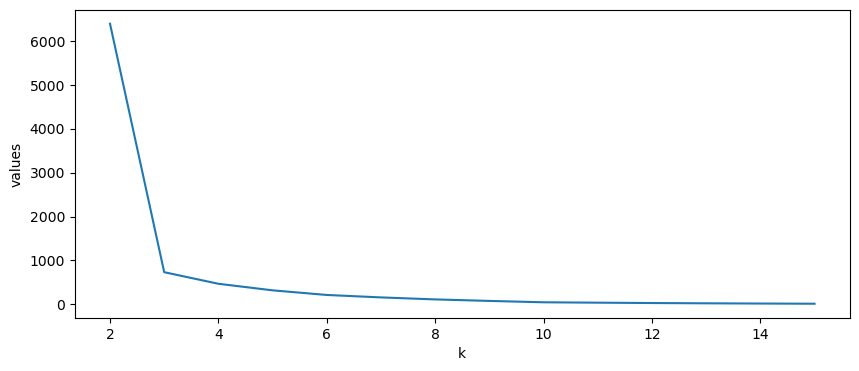

In [140]:
d2=data1.loc[:,['rank','price']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d2)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d2) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d2,y_km))

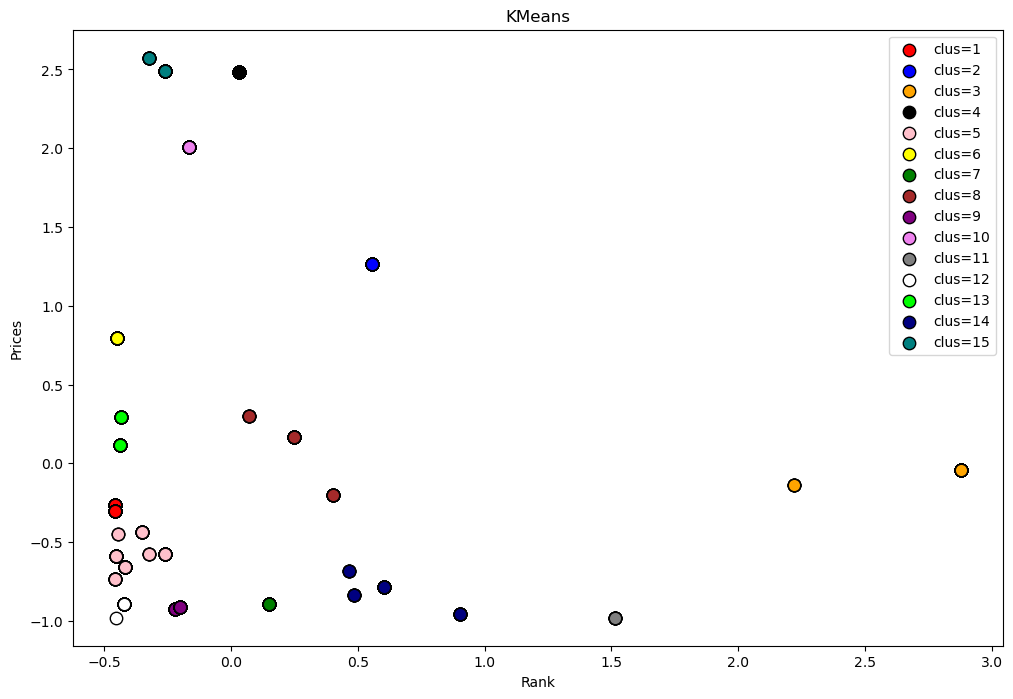

In [146]:
KM=KMeans(n_clusters=15)
KM_Model=KM.fit(d2)
y_pred=KM_Model.labels_
#d2=d2.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d2[y_pred==0,0],d2[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d2[y_pred==1,0],d2[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d2[y_pred==2,0],d2[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d2[y_pred==3,0],d2[y_pred==3,1],s=80,color='black',label='clus=4',edgecolors='black')
plt.scatter(d2[y_pred==4,0],d2[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d2[y_pred==5,0],d2[y_pred==5,1],s=80,color='yellow',label='clus=6',edgecolors='black')
plt.scatter(d2[y_pred==6,0],d2[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d2[y_pred==7,0],d2[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d2[y_pred==8,0],d2[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d2[y_pred==9,0],d2[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d2[y_pred==10,0],d2[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d2[y_pred==11,0],d2[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d2[y_pred==12,0],d2[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d2[y_pred==13,0],d2[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d2[y_pred==14,0],d2[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
#plt.scatter(d2[y_pred==4,0],d2[y_pred==4,1],s=80,color='pink',label='clus=5')

plt.title("KMeans")
plt.xlabel('Rank')
plt.ylabel('Prices')
plt.legend();

# Brand and Price Clustering

For n_clusters = 2 The average silhouette_score is : 0.6121059823217595
For n_clusters = 3 The average silhouette_score is : 0.8015213485806196
For n_clusters = 4 The average silhouette_score is : 0.8058021824782905
For n_clusters = 5 The average silhouette_score is : 0.7977551376023894
For n_clusters = 6 The average silhouette_score is : 0.8589525239341269
For n_clusters = 7 The average silhouette_score is : 0.8560929563301257
For n_clusters = 8 The average silhouette_score is : 0.8785611225767361
For n_clusters = 9 The average silhouette_score is : 0.8963481155094823
For n_clusters = 10 The average silhouette_score is : 0.9165261211137956
For n_clusters = 11 The average silhouette_score is : 0.9289330300407473
For n_clusters = 12 The average silhouette_score is : 0.9358694160659426
For n_clusters = 13 The average silhouette_score is : 0.9394025592630445
For n_clusters = 14 The average silhouette_score is : 0.9487149938510108
For n_clusters = 15 The average silhouette_score is : 0.952

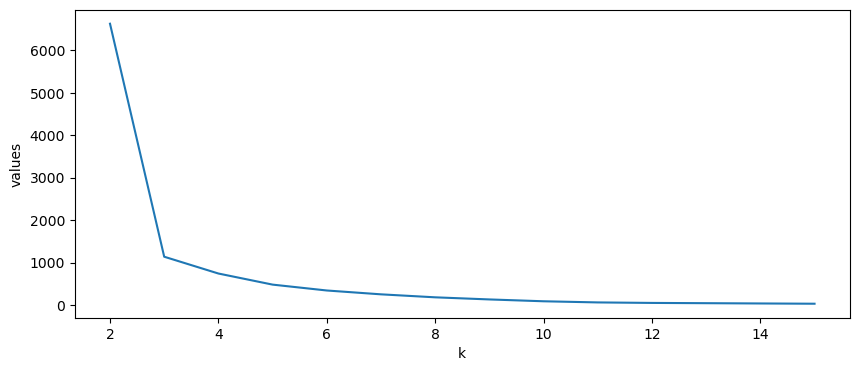

In [147]:
d3=data1.loc[:,['brand','price']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d3)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d3) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d3,y_km))

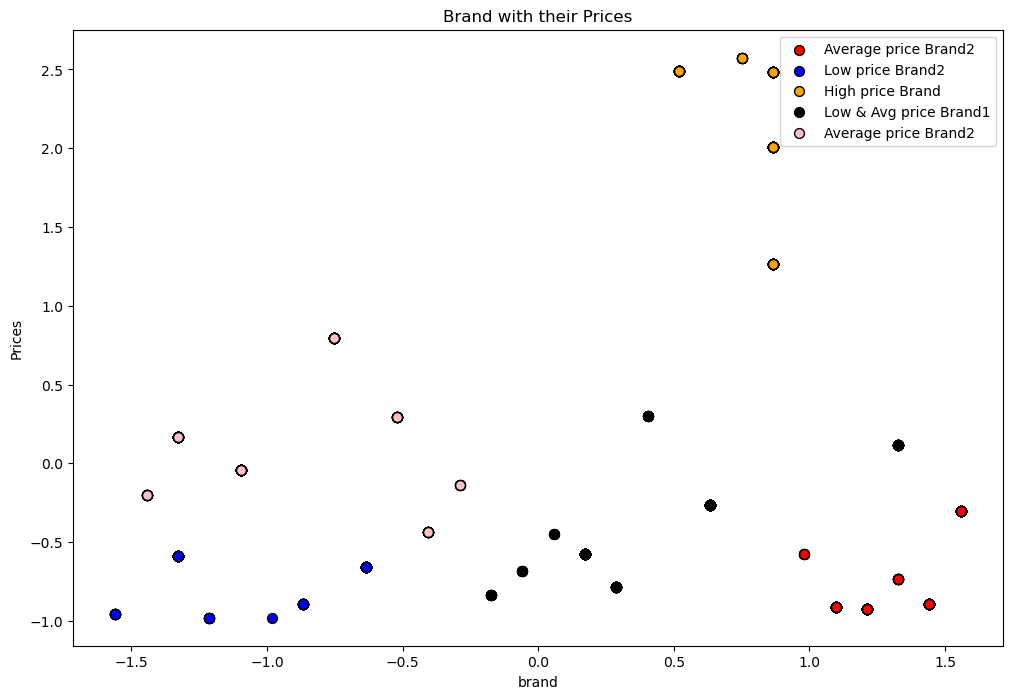

In [334]:
KM=KMeans(n_clusters=5)
KM_Model=KM.fit(d3)
y_pred=KM_Model.labels_
#d3=d3.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d3[y_pred==0,0],d3[y_pred==0,1],s=50,color='red',label='Average price Brand2',edgecolors='black')
plt.scatter(d3[y_pred==1,0],d3[y_pred==1,1],s=50,color='blue',label='Low price Brand2',edgecolors='black')
plt.scatter(d3[y_pred==2,0],d3[y_pred==2,1],s=50,color='orange',label='High price Brand',edgecolors='black')
plt.scatter(d3[y_pred==3,0],d3[y_pred==3,1],s=50,color='black',label='Low & Avg price Brand1',edgecolors='black')
plt.scatter(d3[y_pred==4,0],d3[y_pred==4,1],s=50,color='pink',label='Average price Brand2',edgecolors='black')
plt.title("Brand with their Prices")
plt.xlabel('brand')
plt.ylabel('Prices')
plt.legend();

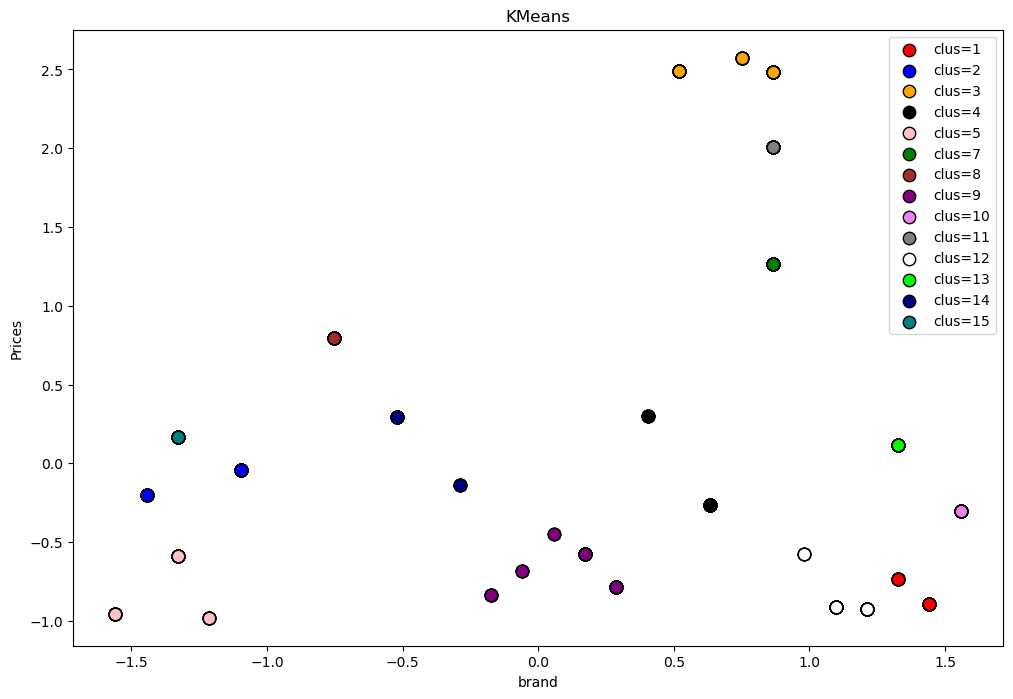

In [154]:
#15 clusters
KM=KMeans(n_clusters=15)
KM_Model=KM.fit(d3)
y_pred=KM_Model.labels_
#d3=d3.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d3[y_pred==0,0],d3[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d3[y_pred==1,0],d3[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d3[y_pred==2,0],d3[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d3[y_pred==3,0],d3[y_pred==3,1],s=80,color='black',label='clus=4',edgecolors='black')
plt.scatter(d3[y_pred==4,0],d3[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d3[y_pred==6,0],d3[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d3[y_pred==7,0],d3[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d3[y_pred==8,0],d3[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d3[y_pred==9,0],d3[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d3[y_pred==10,0],d3[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d3[y_pred==11,0],d3[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d3[y_pred==12,0],d3[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d3[y_pred==13,0],d3[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d3[y_pred==14,0],d3[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
plt.title("KMeans")
plt.xlabel('brand')
plt.ylabel('Prices')
plt.legend();

# Main_cat and Sentiments Clustering

For n_clusters = 2 The average silhouette_score is : 0.8273702867441192
For n_clusters = 3 The average silhouette_score is : 0.9185047346722686
For n_clusters = 4 The average silhouette_score is : 0.9766562075982964
For n_clusters = 5 The average silhouette_score is : 0.9794572519177089
For n_clusters = 6 The average silhouette_score is : 0.9870431137688247
For n_clusters = 7 The average silhouette_score is : 0.9891813218850594
For n_clusters = 8 The average silhouette_score is : 0.991742357365387
For n_clusters = 9 The average silhouette_score is : 0.9932475045099718
For n_clusters = 10 The average silhouette_score is : 0.9955131535505256
For n_clusters = 11 The average silhouette_score is : 0.996580794355483
For n_clusters = 12 The average silhouette_score is : 0.9990096294861542
For n_clusters = 13 The average silhouette_score is : 0.9994328116137462
For n_clusters = 14 The average silhouette_score is : 0.9998052065481231
For n_clusters = 15 The average silhouette_score is : 0.99985

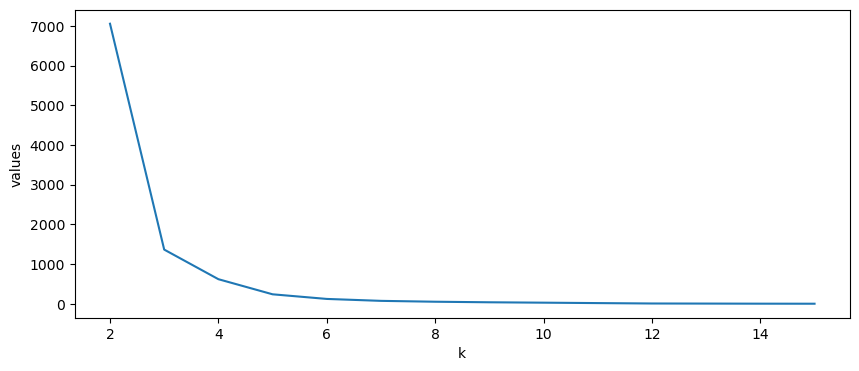

In [151]:
d4=data1.loc[:,['main_cat','sentiments']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d4)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d4) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d4,y_km))

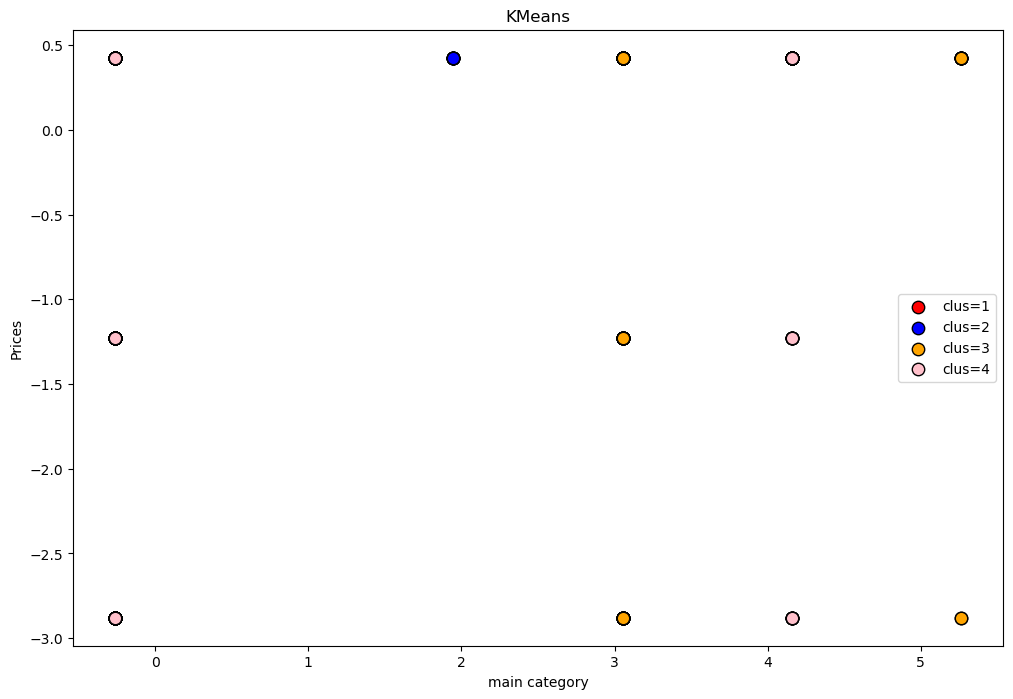

In [153]:
KM=KMeans(n_clusters=5)
KM_Model=KM.fit(d3)
y_pred=KM_Model.labels_
#d4=d4.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d4[y_pred==0,0],d4[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d4[y_pred==1,0],d4[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d4[y_pred==2,0],d4[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d4[y_pred==3,0],d4[y_pred==3,1],s=80,color='pink',label='clus=4',edgecolors='black')
plt.title("KMeans")
plt.xlabel('main category')
plt.ylabel('Prices')
plt.legend();

# Main_cat and Price Clustering

For n_clusters = 2 The average silhouette_score is : 0.7890455905683758
For n_clusters = 3 The average silhouette_score is : 0.8739965050331635
For n_clusters = 4 The average silhouette_score is : 0.8773969679717232
For n_clusters = 5 The average silhouette_score is : 0.7787000555028593
For n_clusters = 6 The average silhouette_score is : 0.7802446019955885
For n_clusters = 7 The average silhouette_score is : 0.7806389258388643
For n_clusters = 8 The average silhouette_score is : 0.7827494349525479
For n_clusters = 9 The average silhouette_score is : 0.7925169050508882
For n_clusters = 10 The average silhouette_score is : 0.8308091559712707
For n_clusters = 11 The average silhouette_score is : 0.9071191891097666
For n_clusters = 12 The average silhouette_score is : 0.9251944018805098
For n_clusters = 13 The average silhouette_score is : 0.9419085897447854
For n_clusters = 14 The average silhouette_score is : 0.9438905695251623
For n_clusters = 15 The average silhouette_score is : 0.946

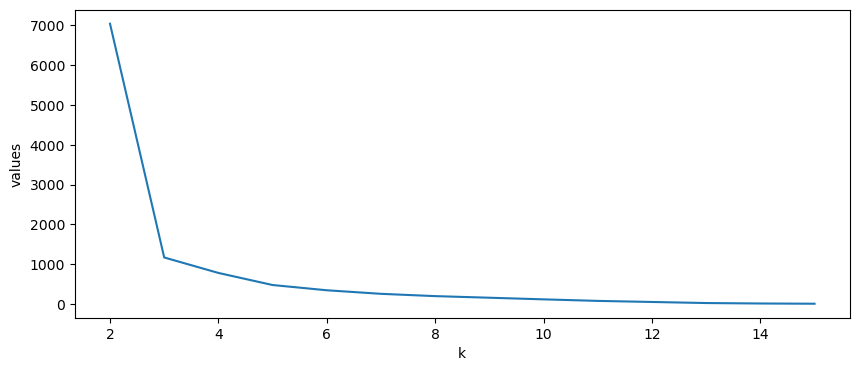

In [156]:
d5=data1.loc[:,['main_cat','price']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d5)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d5) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d5,y_km))

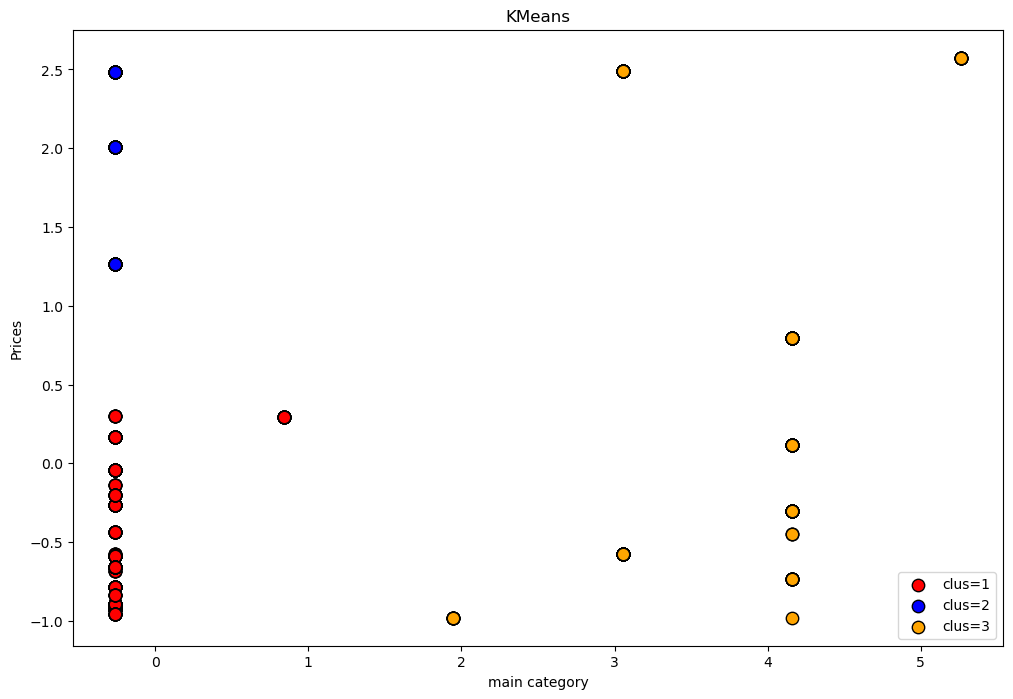

In [163]:
KM=KMeans(n_clusters=3)
KM_Model=KM.fit(d5)
y_pred=KM_Model.labels_
#d5=d5.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d5[y_pred==0,0],d5[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d5[y_pred==1,0],d5[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d5[y_pred==2,0],d5[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
#plt.scatter(d[y_pred==3,0],d[y_pred==3,1],s=80,color='pink',label='clus=4',edgecolors='black')
plt.title("KMeans")
plt.xlabel('main category')
plt.ylabel('Prices')
plt.legend();

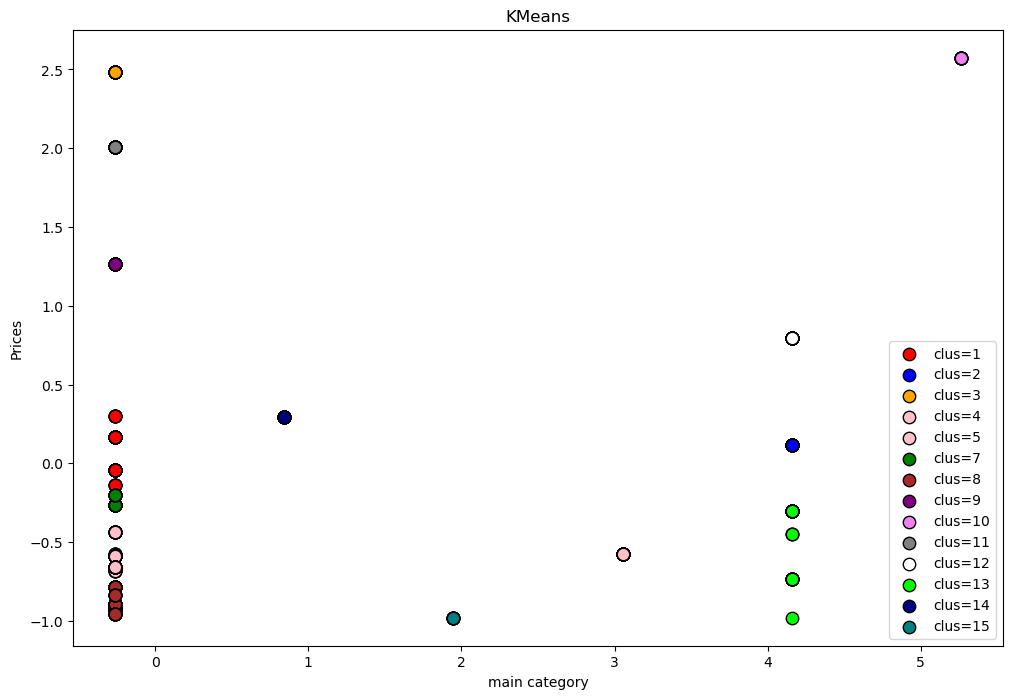

In [158]:
KM=KMeans(n_clusters=15)
KM_Model=KM.fit(d5)
y_pred=KM_Model.labels_
d5=d5.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d5[y_pred==0,0],d5[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d5[y_pred==1,0],d5[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d5[y_pred==2,0],d5[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d5[y_pred==3,0],d5[y_pred==3,1],s=80,color='pink',label='clus=4',edgecolors='black')
plt.scatter(d5[y_pred==4,0],d5[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d5[y_pred==6,0],d5[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d5[y_pred==7,0],d5[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d5[y_pred==8,0],d5[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d5[y_pred==9,0],d5[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d5[y_pred==10,0],d5[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d5[y_pred==11,0],d5[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d5[y_pred==12,0],d5[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d5[y_pred==13,0],d5[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d5[y_pred==14,0],d5[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
plt.title("KMeans")
plt.xlabel('main category')
plt.ylabel('Prices')
plt.legend();

# Overall and Price Clustering

For n_clusters = 2 The average silhouette_score is : 0.6644455637760992
For n_clusters = 3 The average silhouette_score is : 0.7471977170872339
For n_clusters = 4 The average silhouette_score is : 0.6854050885060038
For n_clusters = 5 The average silhouette_score is : 0.6961684656766587
For n_clusters = 6 The average silhouette_score is : 0.6953165663414843
For n_clusters = 7 The average silhouette_score is : 0.7103752171023057
For n_clusters = 8 The average silhouette_score is : 0.7155873289135789
For n_clusters = 9 The average silhouette_score is : 0.7281518525294306
For n_clusters = 10 The average silhouette_score is : 0.7487522195873412
For n_clusters = 11 The average silhouette_score is : 0.7595850259410799
For n_clusters = 12 The average silhouette_score is : 0.7835268045548943
For n_clusters = 13 The average silhouette_score is : 0.8019469198355873
For n_clusters = 14 The average silhouette_score is : 0.8520319419009657
For n_clusters = 15 The average silhouette_score is : 0.864

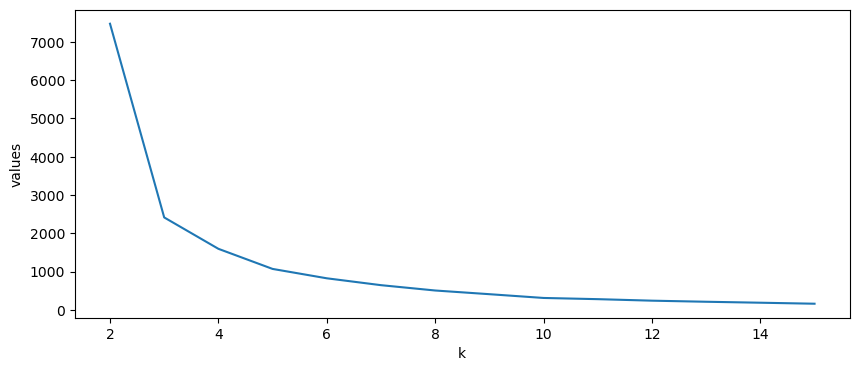

In [161]:
d6=data1.loc[:,['overall','price']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d6)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d6) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d6,y_km))

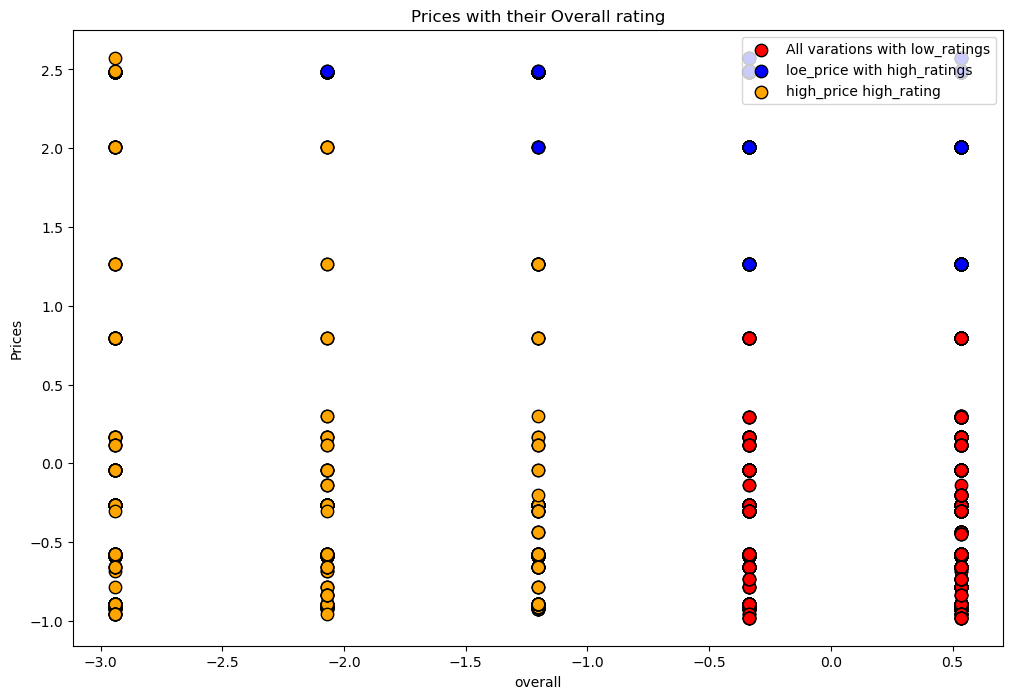

In [335]:
KM=KMeans(n_clusters=3)
KM_Model=KM.fit(d6)
y_pred=KM_Model.labels_
#d6=d6.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d6[y_pred==0,0],d6[y_pred==0,1],s=80,color='red',label='All varations with low_ratings',edgecolors='black')
plt.scatter(d6[y_pred==1,0],d6[y_pred==1,1],s=80,color='blue',label='loe_price with high_ratings',edgecolors='black')
plt.scatter(d6[y_pred==2,0],d6[y_pred==2,1],s=80,color='orange',label='high_price high_rating',edgecolors='black')
#plt.scatter(d6[y_pred==2,0],d6[y_pred==2,1],s=80,color='orange',label='clus=4',edgecolors='black')
#plt.scatter(d6[y_pred==2,0],d6[y_pred==2,1],s=80,color='orange',label='clus=5',edgecolors='black')
plt.title("Prices with their Overall rating")
plt.xlabel('overall')
plt.ylabel('Prices')
plt.legend(loc='upper right');

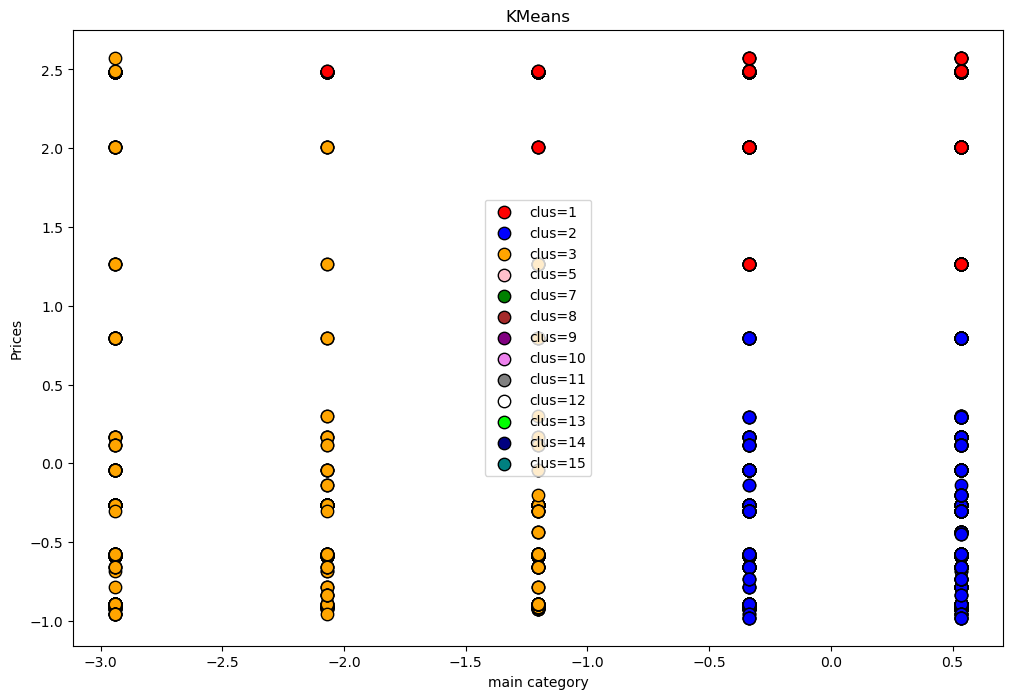

In [172]:
KM=KMeans(n_clusters=3)
KM_Model=KM.fit(d6)
y_pred=KM_Model.labels_
#d6=d6.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d6[y_pred==0,0],d6[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d6[y_pred==1,0],d6[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d6[y_pred==2,0],d6[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d6[y_pred==4,0],d6[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d6[y_pred==6,0],d6[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d6[y_pred==7,0],d6[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d6[y_pred==8,0],d6[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d6[y_pred==9,0],d6[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d6[y_pred==10,0],d6[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d6[y_pred==11,0],d6[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d6[y_pred==12,0],d6[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d6[y_pred==13,0],d6[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d6[y_pred==14,0],d6[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
plt.title("KMeans")
plt.xlabel('main category')
plt.ylabel('Prices')
plt.legend();

# Overall and Brand Clustering

For n_clusters = 2 The average silhouette_score is : 0.5883514873954369
For n_clusters = 3 The average silhouette_score is : 0.7178240813692177
For n_clusters = 4 The average silhouette_score is : 0.7018359512479243
For n_clusters = 5 The average silhouette_score is : 0.7163583818405729
For n_clusters = 6 The average silhouette_score is : 0.7150779394816974
For n_clusters = 7 The average silhouette_score is : 0.7079240537356984
For n_clusters = 8 The average silhouette_score is : 0.7311196407145523
For n_clusters = 9 The average silhouette_score is : 0.7422823390571646
For n_clusters = 10 The average silhouette_score is : 0.7321529543202567
For n_clusters = 11 The average silhouette_score is : 0.7822398841259369
For n_clusters = 12 The average silhouette_score is : 0.7919032293453409
For n_clusters = 13 The average silhouette_score is : 0.7975805445151932
For n_clusters = 14 The average silhouette_score is : 0.8434914165254768
For n_clusters = 15 The average silhouette_score is : 0.845

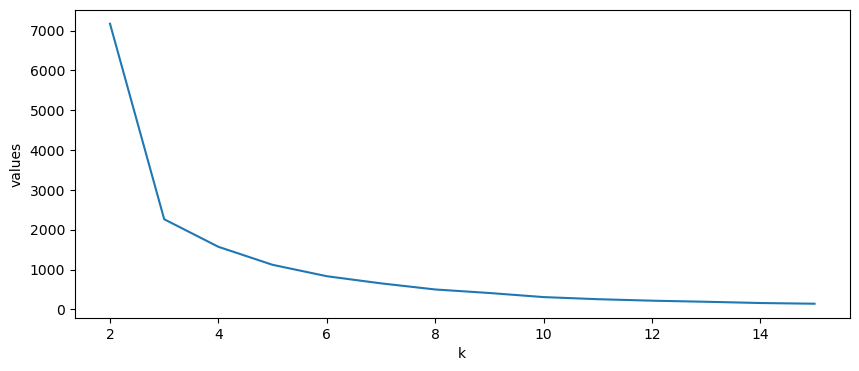

In [173]:
d7=data1.loc[:,['overall','brand']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d7)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d7) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d7,y_km))

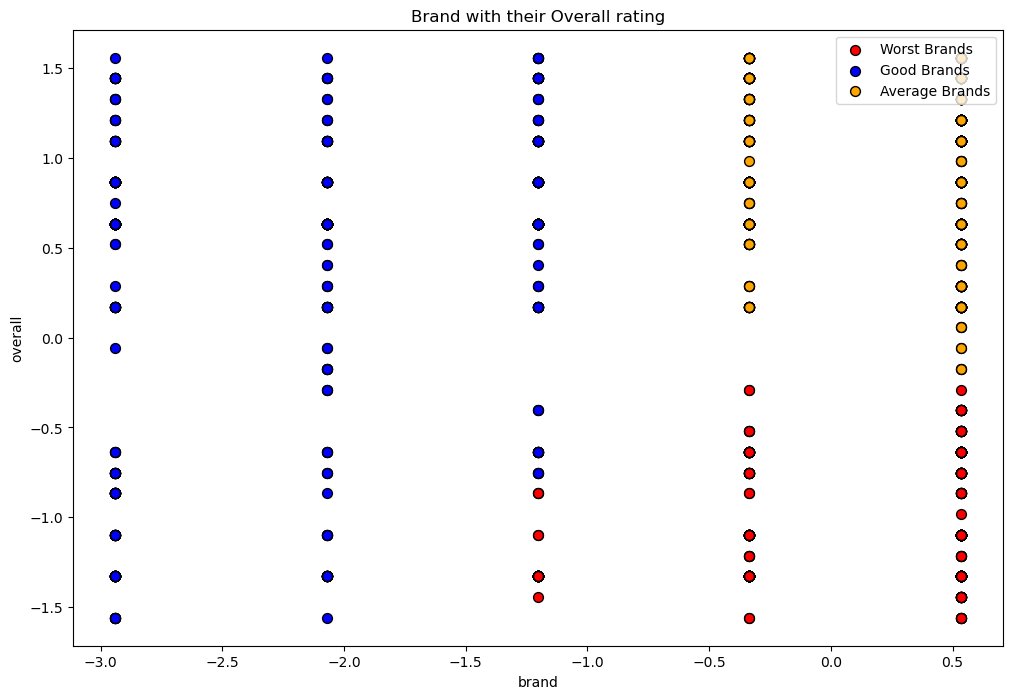

In [336]:
KM=KMeans(n_clusters=3)
KM_Model=KM.fit(d7)
y_pred=KM_Model.labels_
#d7=d7.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d7[y_pred==0,0],d7[y_pred==0,1],s=50,color='red',label='Worst Brands',edgecolors='black')
plt.scatter(d7[y_pred==1,0],d7[y_pred==1,1],s=50,color='blue',label='Good Brands',edgecolors='black')
plt.scatter(d7[y_pred==2,0],d7[y_pred==2,1],s=50,color='orange',label='Average Brands',edgecolors='black')
#plt.scatter(d1[y_pred==3,0],d1[y_pred==3,1],s=80,color='black',label='clus=4')
#plt.scatter(data1[y_pred==4,0],data1[y_pred==4,1],s=80,color='pink',label='clus=5')
#plt.scatter(data1[y_pred==5,0],data1[y_pred==5,1],s=80,color='grey',label='clus=6')
plt.title("Brand with their Overall rating")
plt.xlabel('brand')
plt.ylabel('overall')
plt.legend(loc='upper right');

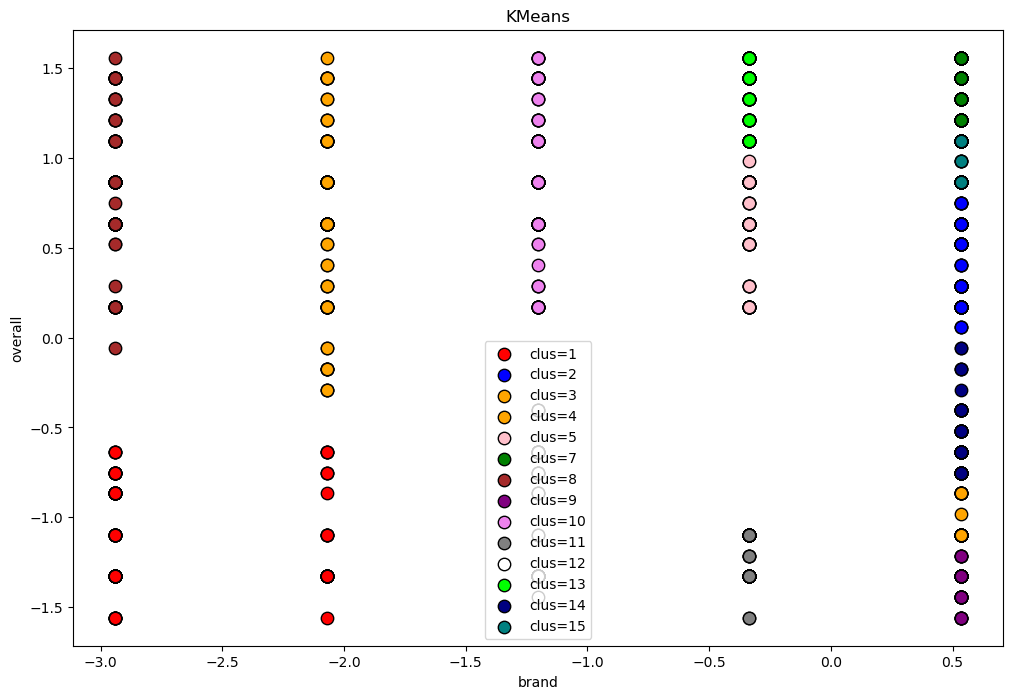

In [179]:
KM=KMeans(n_clusters=15)
KM_Model=KM.fit(d7)
y_pred=KM_Model.labels_
#d7=d7.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d7[y_pred==0,0],d7[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d7[y_pred==1,0],d7[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d7[y_pred==2,0],d7[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d7[y_pred==3,0],d7[y_pred==3,1],s=80,color='orange',label='clus=4',edgecolors='black')
plt.scatter(d7[y_pred==4,0],d7[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d7[y_pred==6,0],d7[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d7[y_pred==7,0],d7[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d7[y_pred==8,0],d7[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d7[y_pred==9,0],d7[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d7[y_pred==10,0],d7[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d7[y_pred==11,0],d7[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d7[y_pred==12,0],d7[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d7[y_pred==13,0],d7[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d7[y_pred==14,0],d7[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
plt.title("KMeans")
plt.xlabel('brand')
plt.ylabel('overall')
plt.legend();

# Overall and Rank Clustering

For n_clusters = 2 The average silhouette_score is : 0.7314671643399331
For n_clusters = 3 The average silhouette_score is : 0.7941886681868645
For n_clusters = 4 The average silhouette_score is : 0.7790353048372541
For n_clusters = 5 The average silhouette_score is : 0.7835877689490912
For n_clusters = 6 The average silhouette_score is : 0.7835506864479291
For n_clusters = 7 The average silhouette_score is : 0.8141665950400288
For n_clusters = 8 The average silhouette_score is : 0.841051474892287
For n_clusters = 9 The average silhouette_score is : 0.852892182617824
For n_clusters = 10 The average silhouette_score is : 0.8523464080151963
For n_clusters = 11 The average silhouette_score is : 0.8648676287763543
For n_clusters = 12 The average silhouette_score is : 0.8699536789583295
For n_clusters = 13 The average silhouette_score is : 0.873153826248977
For n_clusters = 14 The average silhouette_score is : 0.9033802504221142
For n_clusters = 15 The average silhouette_score is : 0.906442

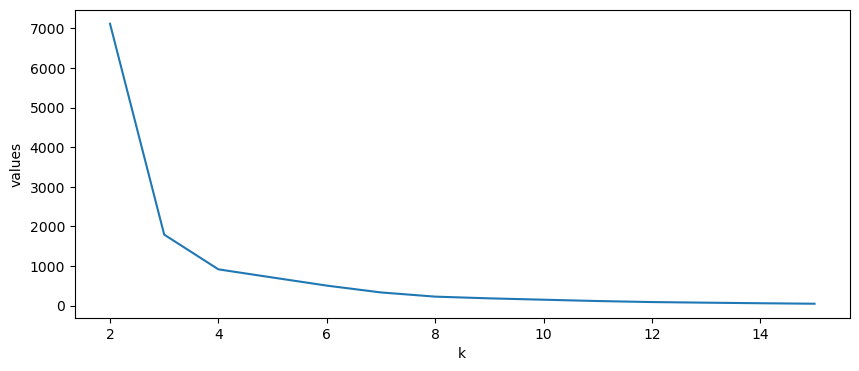

In [175]:
d8=data1.loc[:,['overall','rank']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d8)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d8) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d8,y_km))

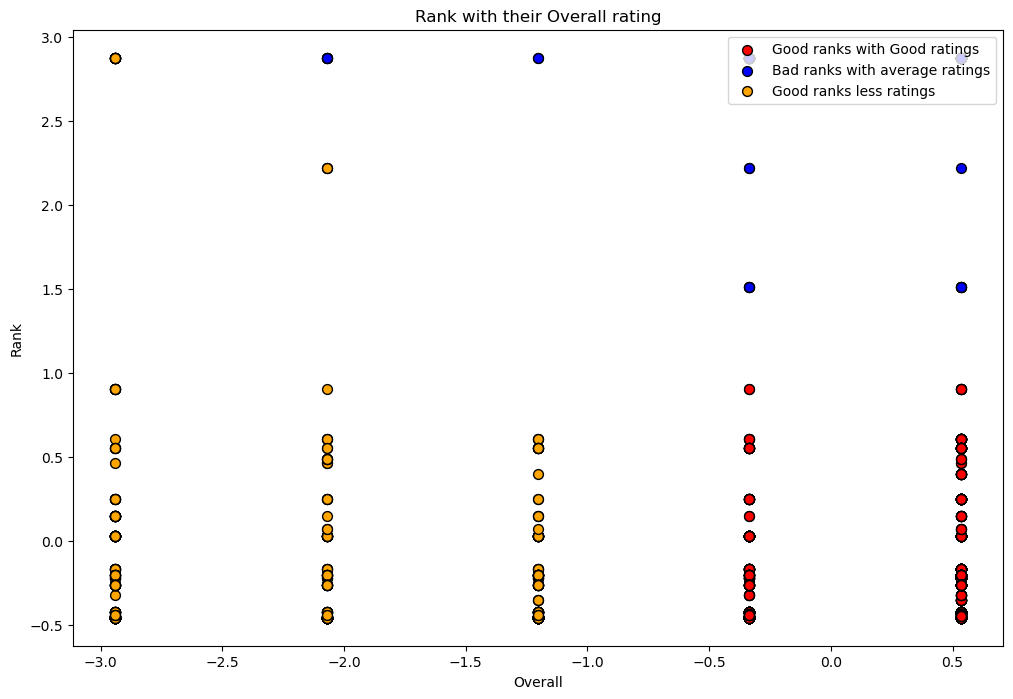

In [338]:
KM=KMeans(n_clusters=3)
KM_Model=KM.fit(d8)
y_pred=KM_Model.labels_
#d8=d8.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d8[y_pred==0,0],d8[y_pred==0,1],s=50,color='red',label='Good ranks with Good ratings',edgecolors='black')
plt.scatter(d8[y_pred==1,0],d8[y_pred==1,1],s=50,color='blue',label='Bad ranks with average ratings',edgecolors='black')
plt.scatter(d8[y_pred==2,0],d8[y_pred==2,1],s=50,color='orange',label='Good ranks less ratings',edgecolors='black')
#plt.scatter(data1[y_pred==4,0],data1[y_pred==4,1],s=80,color='pink',label='clus=5')
#plt.scatter(data1[y_pred==5,0],data1[y_pred==5,1],s=80,color='grey',label='clus=6')
plt.title("Rank with their Overall rating")
plt.xlabel('Overall')
plt.ylabel('Rank')
plt.legend(loc='upper right');

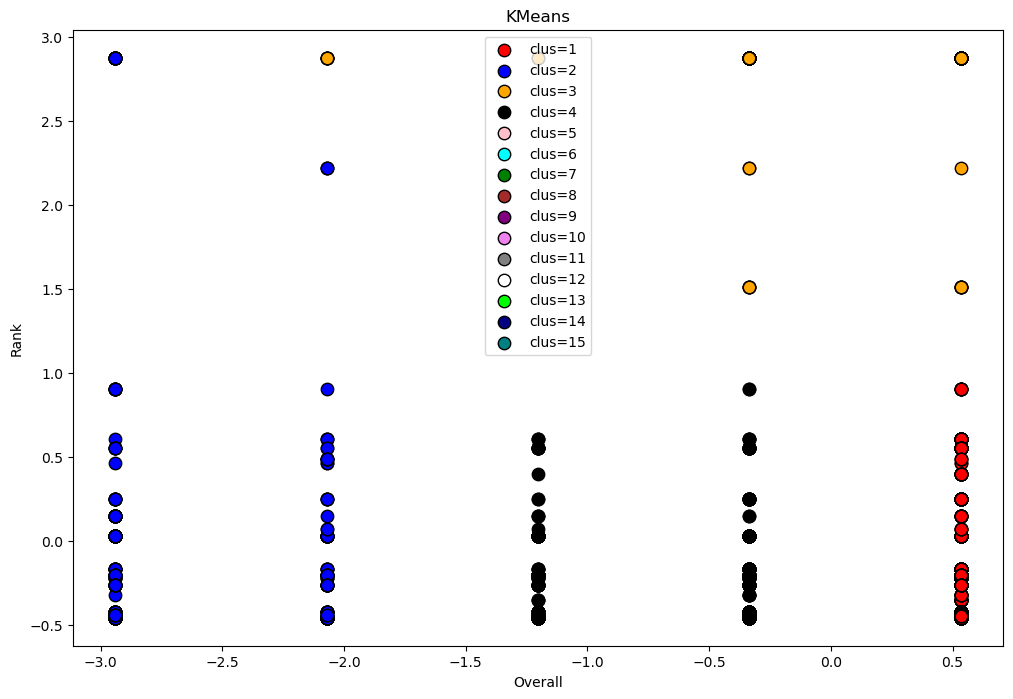

In [186]:
KM=KMeans(n_clusters=4)
KM_Model=KM.fit(d8)
y_pred=KM_Model.labels_
#d8=d8.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d8[y_pred==0,0],d8[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d8[y_pred==1,0],d8[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d8[y_pred==2,0],d8[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d8[y_pred==3,0],d8[y_pred==3,1],s=80,color='black',label='clus=4',edgecolors='black')
plt.scatter(d8[y_pred==4,0],d8[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d8[y_pred==5,0],d8[y_pred==5,1],s=80,color='aqua',label='clus=6',edgecolors='black')
plt.scatter(d8[y_pred==6,0],d8[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d8[y_pred==7,0],d8[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d8[y_pred==8,0],d8[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d8[y_pred==9,0],d8[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d8[y_pred==10,0],d8[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d8[y_pred==11,0],d8[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d8[y_pred==12,0],d8[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d8[y_pred==13,0],d8[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d8[y_pred==14,0],d8[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
plt.title("KMeans")
plt.xlabel('Overall')
plt.ylabel('Rank')
plt.legend();

# Overall and UnixReviewTime Clustering

For n_clusters = 2 The average silhouette_score is : 0.5741015581262867
For n_clusters = 3 The average silhouette_score is : 0.5652104614727271
For n_clusters = 4 The average silhouette_score is : 0.48291070579046097
For n_clusters = 5 The average silhouette_score is : 0.5126213240503881
For n_clusters = 6 The average silhouette_score is : 0.5160772465736825
For n_clusters = 7 The average silhouette_score is : 0.503272190844942
For n_clusters = 8 The average silhouette_score is : 0.52801771641278
For n_clusters = 9 The average silhouette_score is : 0.5317524253846195
For n_clusters = 10 The average silhouette_score is : 0.5283890954712536
For n_clusters = 11 The average silhouette_score is : 0.5404623828050861
For n_clusters = 12 The average silhouette_score is : 0.545873465135112
For n_clusters = 13 The average silhouette_score is : 0.5571112589237858
For n_clusters = 14 The average silhouette_score is : 0.5431961733451182
For n_clusters = 15 The average silhouette_score is : 0.561391

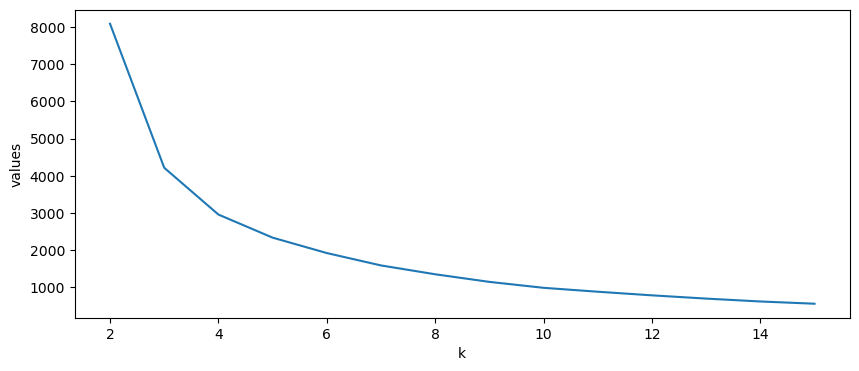

In [187]:
d9=data1.loc[:,['overall','unixReviewTime']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d9)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d9) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d9,y_km))

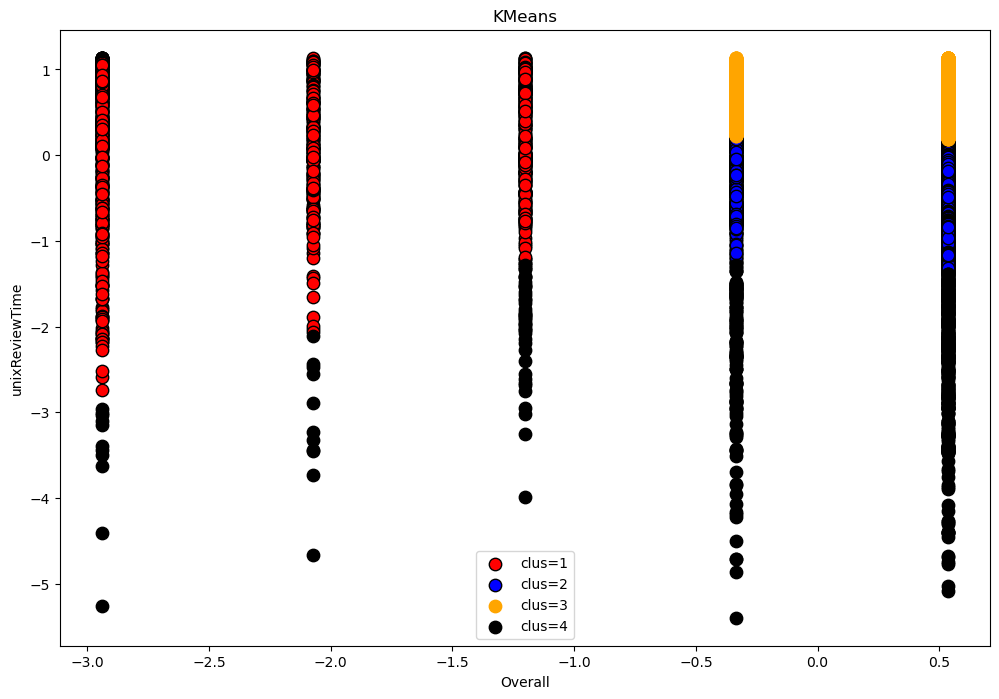

In [325]:
KM=KMeans(n_clusters=4)
KM_Model=KM.fit(d9)
y_pred=KM_Model.labels_
#d9=d9.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d9[y_pred==0,0],d9[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d9[y_pred==1,0],d9[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d9[y_pred==2,0],d9[y_pred==2,1],s=80,color='orange',label='clus=3')
plt.scatter(d9[y_pred==3,0],d9[y_pred==3,1],s=80,color='black',label='clus=4')
#plt.scatter(data1[y_pred==4,0],data1[y_pred==4,1],s=80,color='pink',label='clus=5')
#plt.scatter(data1[y_pred==5,0],data1[y_pred==5,1],s=80,color='grey',label='clus=6')
plt.title("KMeans")
plt.xlabel('Overall')
plt.ylabel('unixReviewTime')
plt.legend();

# sentiments and unixReviewTime Clustering

For n_clusters = 2 The average silhouette_score is : 0.6077455566460571
For n_clusters = 3 The average silhouette_score is : 0.600524263075196
For n_clusters = 4 The average silhouette_score is : 0.5643654254903273
For n_clusters = 5 The average silhouette_score is : 0.5924196790746286
For n_clusters = 6 The average silhouette_score is : 0.603751517263421
For n_clusters = 7 The average silhouette_score is : 0.5829820729086092
For n_clusters = 8 The average silhouette_score is : 0.5899147500377558
For n_clusters = 9 The average silhouette_score is : 0.5902132086115758
For n_clusters = 10 The average silhouette_score is : 0.5884745814223616
For n_clusters = 11 The average silhouette_score is : 0.5814684276110395
For n_clusters = 12 The average silhouette_score is : 0.5843560801348898
For n_clusters = 13 The average silhouette_score is : 0.5831163286241817
For n_clusters = 14 The average silhouette_score is : 0.5853019433423662
For n_clusters = 15 The average silhouette_score is : 0.58918

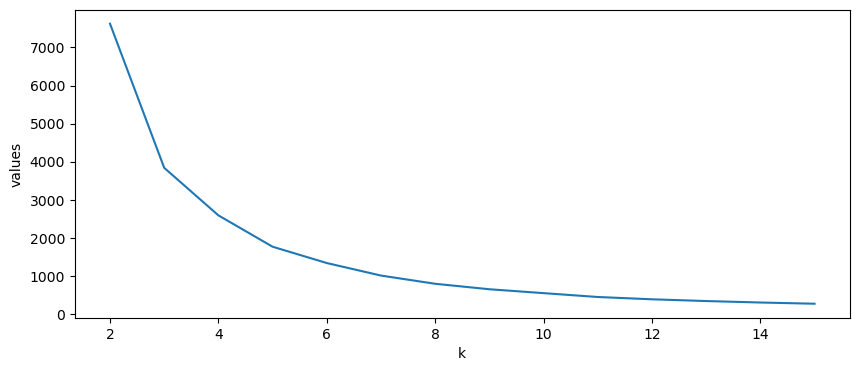

In [195]:
d10=data1.loc[:,['sentiments','unixReviewTime']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d10)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d10) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d10,y_km))

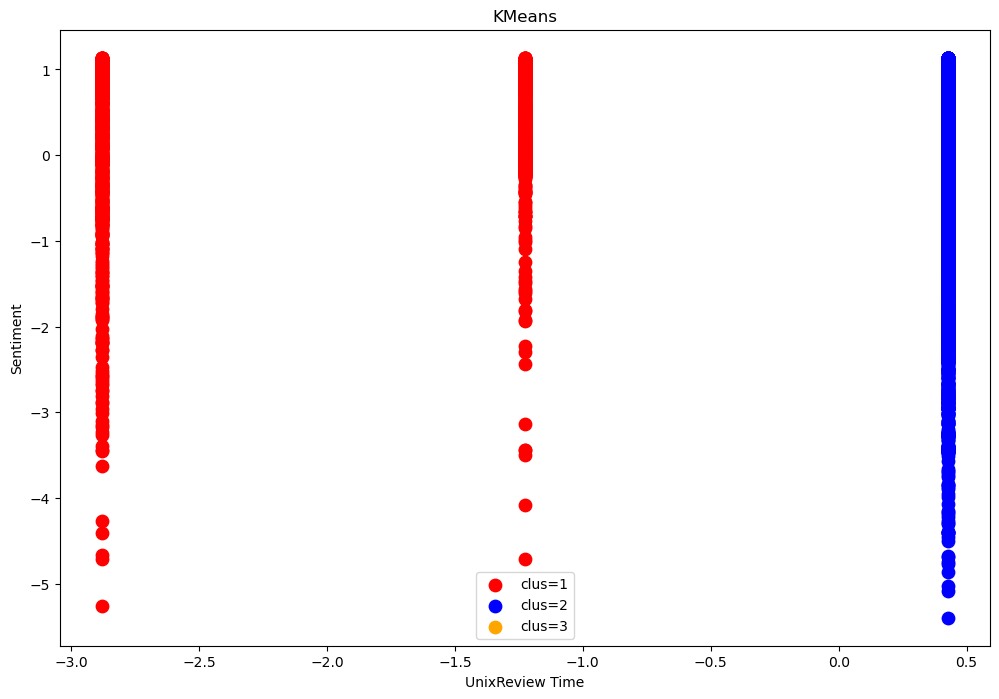

In [203]:
KM=KMeans(n_clusters=2)
KM_Model=KM.fit(d10)
y_pred=KM_Model.labels_
#d10=d10.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d10[y_pred==0,0],d10[y_pred==0,1],s=80,color='red',label='clus=1')
plt.scatter(d10[y_pred==1,0],d10[y_pred==1,1],s=80,color='blue',label='clus=2')
plt.scatter(d10[y_pred==2,0],d10[y_pred==2,1],s=80,color='orange',label='clus=3')
#plt.scatter(d1[y_pred==3,0],d1[y_pred==3,1],s=80,color='black',label='clus=4')
#plt.scatter(data1[y_pred==4,0],data1[y_pred==4,1],s=80,color='pink',label='clus=5')
#plt.scatter(data1[y_pred==5,0],data1[y_pred==5,1],s=80,color='grey',label='clus=6')
plt.title("KMeans")
plt.xlabel('UnixReview Time')
plt.ylabel('Sentiment')
plt.legend();

# Brand and Sentiments Clustering

For n_clusters = 2 The average silhouette_score is : 0.622119083936174
For n_clusters = 3 The average silhouette_score is : 0.7654003828636163
For n_clusters = 4 The average silhouette_score is : 0.8025915590162834
For n_clusters = 5 The average silhouette_score is : 0.8221055047083632
For n_clusters = 6 The average silhouette_score is : 0.8387018902357682
For n_clusters = 7 The average silhouette_score is : 0.8058573621118583
For n_clusters = 8 The average silhouette_score is : 0.795911621938436
For n_clusters = 9 The average silhouette_score is : 0.8249770118818096
For n_clusters = 10 The average silhouette_score is : 0.8682085390117256
For n_clusters = 11 The average silhouette_score is : 0.8637205456414023
For n_clusters = 12 The average silhouette_score is : 0.8910306322178486
For n_clusters = 13 The average silhouette_score is : 0.8879678027977788
For n_clusters = 14 The average silhouette_score is : 0.9160743215838447
For n_clusters = 15 The average silhouette_score is : 0.91701

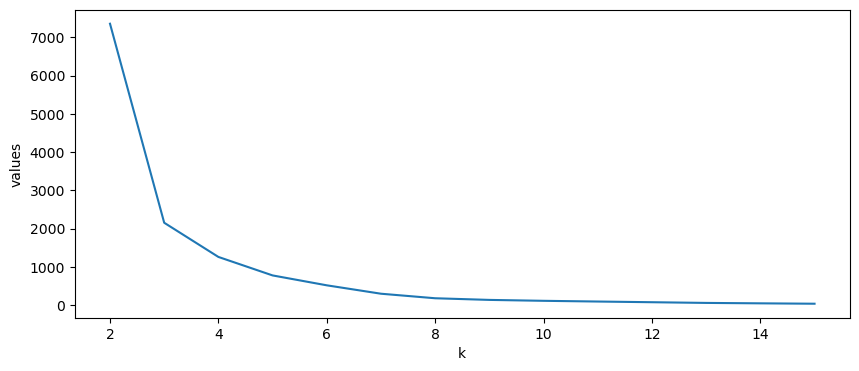

In [199]:
d11=data1.loc[:,['brand','sentiments']]
value=[]
for k in range(2,16):
    KM=KMeans(n_clusters=k)
    KM.fit(d11)
    value.append(KM.inertia_)
plt.figure(figsize=(10,4))
plt.plot(range(2,16),value)
plt.xlabel('k')
plt.ylabel('values');
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,16):
    KM=KMeans(n_clusters=k,random_state=0)
    y_km=KM.fit_predict(d11) 
    print("For n_clusters =",k, "The average silhouette_score is :",silhouette_score(d11,y_km))

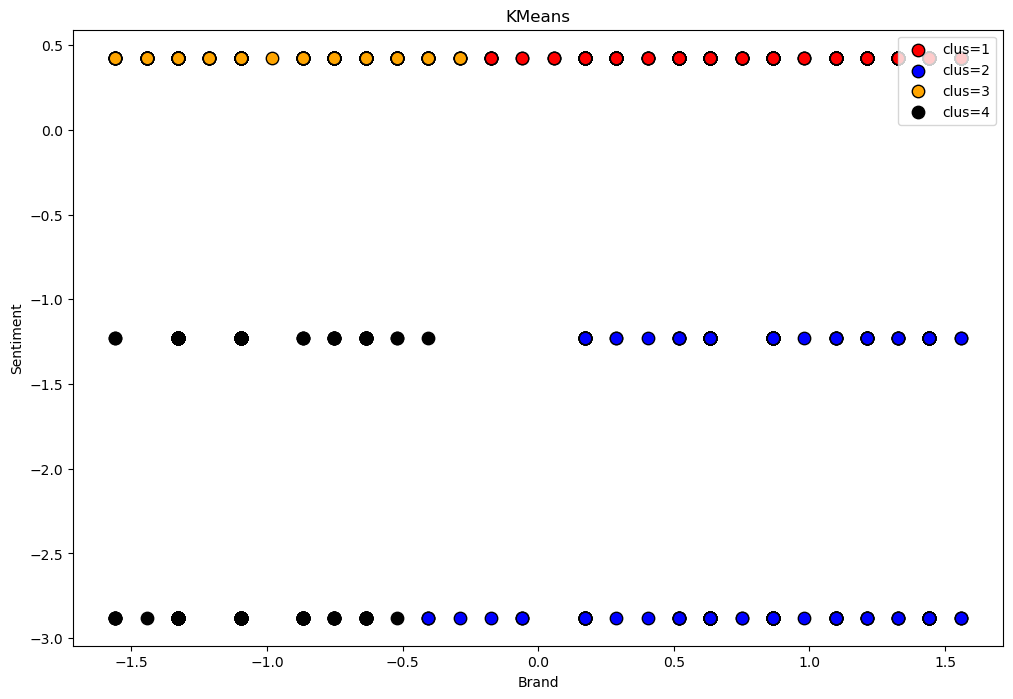

In [268]:
KM=KMeans(n_clusters=4)
KM_Model=KM.fit(d11)
y_pred=KM_Model.labels_
#d11=d11.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d11[y_pred==0,0],d11[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d11[y_pred==1,0],d11[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d11[y_pred==2,0],d11[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d11[y_pred==3,0],d11[y_pred==3,1],s=80,color='black',label='clus=4',edgecolors='black')
plt.title("KMeans")
plt.xlabel('Brand')
plt.ylabel('Sentiment')
plt.legend(loc='upper right');

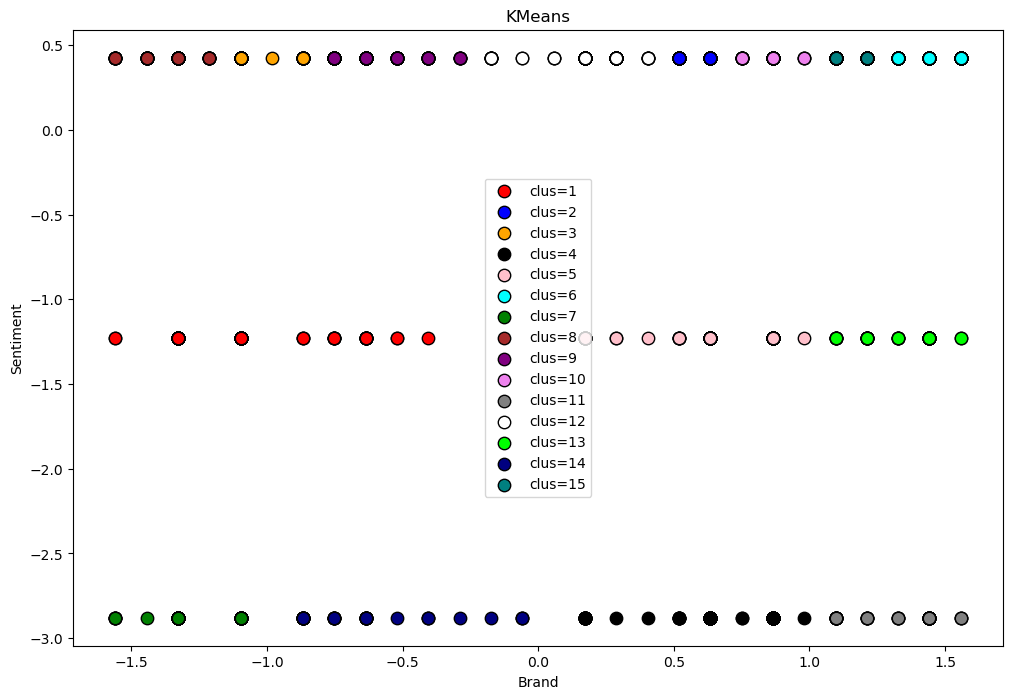

In [205]:
KM=KMeans(n_clusters=15)
KM_Model=KM.fit(d11)
y_pred=KM_Model.labels_
#d11=d11.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d11[y_pred==0,0],d11[y_pred==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d11[y_pred==1,0],d11[y_pred==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d11[y_pred==2,0],d11[y_pred==2,1],s=80,color='orange',label='clus=3',edgecolors='black')
plt.scatter(d11[y_pred==3,0],d11[y_pred==3,1],s=80,color='black',label='clus=4',edgecolors='black')
plt.scatter(d11[y_pred==4,0],d11[y_pred==4,1],s=80,color='pink',label='clus=5',edgecolors='black')
plt.scatter(d11[y_pred==5,0],d11[y_pred==5,1],s=80,color='aqua',label='clus=6',edgecolors='black')
plt.scatter(d11[y_pred==6,0],d11[y_pred==6,1],s=80,color='green',label='clus=7',edgecolors='black')
plt.scatter(d11[y_pred==7,0],d11[y_pred==7,1],s=80,color='brown',label='clus=8',edgecolors='black')
plt.scatter(d11[y_pred==8,0],d11[y_pred==8,1],s=80,color='purple',label='clus=9',edgecolors='black')
plt.scatter(d11[y_pred==9,0],d11[y_pred==9,1],s=80,color='violet',label='clus=10',edgecolors='black')
plt.scatter(d11[y_pred==10,0],d11[y_pred==10,1],s=80,color='grey',label='clus=11',edgecolors='black')
plt.scatter(d11[y_pred==11,0],d11[y_pred==11,1],s=80,color='white',label='clus=12',edgecolors='black')
plt.scatter(d11[y_pred==12,0],d11[y_pred==12,1],s=80,color='lime',label='clus=13',edgecolors='black')
plt.scatter(d11[y_pred==13,0],d11[y_pred==13,1],s=80,color='navy',label='clus=14',edgecolors='black')
plt.scatter(d11[y_pred==14,0],d11[y_pred==14,1],s=80,color='teal',label='clus=15',edgecolors='black')
plt.title("KMeans")
plt.xlabel('Brand')
plt.ylabel('Sentiment')
plt.legend();

# Conclusion

# Agglomertive Hierarchical Clusstering.

# Finding the no.of clusters by using Dendogram.

# ReviewerName and Price

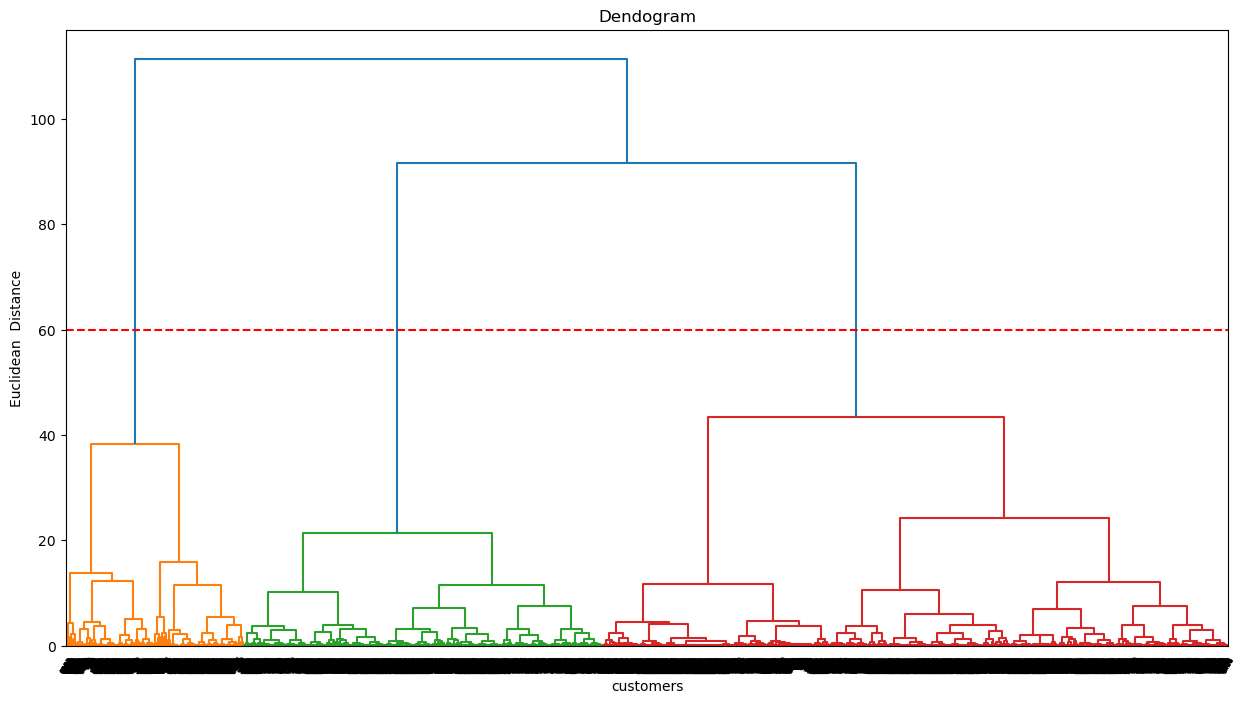

In [206]:
plt.figure(figsize=(15,8))
hc.dendrogram(hc.linkage(d1,method='ward'))
plt.axhline(y=60,color='r',linestyle='--')
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean  Distance')
plt.xticks(rotation=60);

# Finding the no.of clusters by using Linkages methods.

In [207]:
for k in range(2,10):
        for i in ['single','complete','average','ward']:
            AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage=i)
            y_AG=AG.fit_predict(d1)
            print(i,k,silhouette_score(d1,y_AG))

single 2 0.5866619176695026
complete 2 0.5731788338558055
average 2 0.5731788338558055
ward 2 0.5731788338558055
single 3 0.36624833231151793
complete 3 0.5353715613079232
average 3 0.5142813381119463
ward 3 0.5330178636047209
single 4 0.3266904863340202
complete 4 0.5305152734086452
average 4 0.5142123292637675
ward 4 0.4707839494018983
single 5 0.2699399387474821
complete 5 0.5110006600729002
average 5 0.4580047620210064
ward 5 0.4734894022956533
single 6 0.12532595527179072
complete 6 0.46820752889643263
average 6 0.44602630156890505
ward 6 0.41683899516653383
single 7 0.12255185035492525
complete 7 0.47957037109273537
average 7 0.46810964529108756
ward 7 0.3948191382960788
single 8 0.0378340401739175
complete 8 0.47196931768900385
average 8 0.46259255751106676
ward 8 0.39907504658223225
single 9 0.01358793787003792
complete 9 0.4126311403791918
average 9 0.4543140144732475
ward 9 0.4010620746385959


In [ ]:
The good k-value is 2

In [208]:
WAG=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward') 
y_WAG=WAG.fit_predict(d1) 
print(silhouette_score(d1,y_WAG))

0.5731788338558055


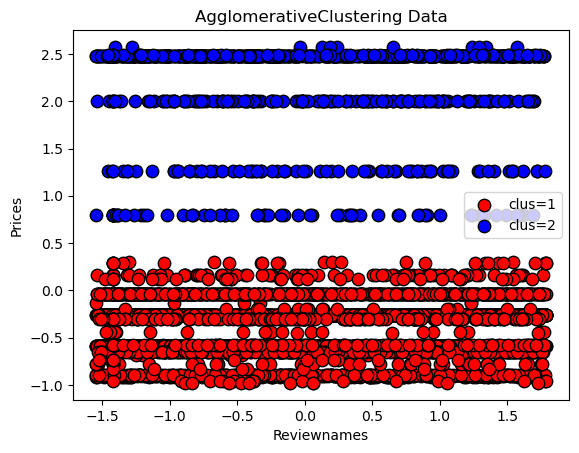

In [210]:
#d1=d1.to_numpy()
plt.scatter(d1[y_WAG==0,0],d1[y_WAG==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d1[y_WAG==1,0],d1[y_WAG==1,1],s=80,color='blue',label='clus=2',edgecolors='black');
plt.title("AgglomerativeClustering Data")
plt.xlabel('Reviewnames')
plt.ylabel('Prices')
plt.legend();

# Brand and Price 

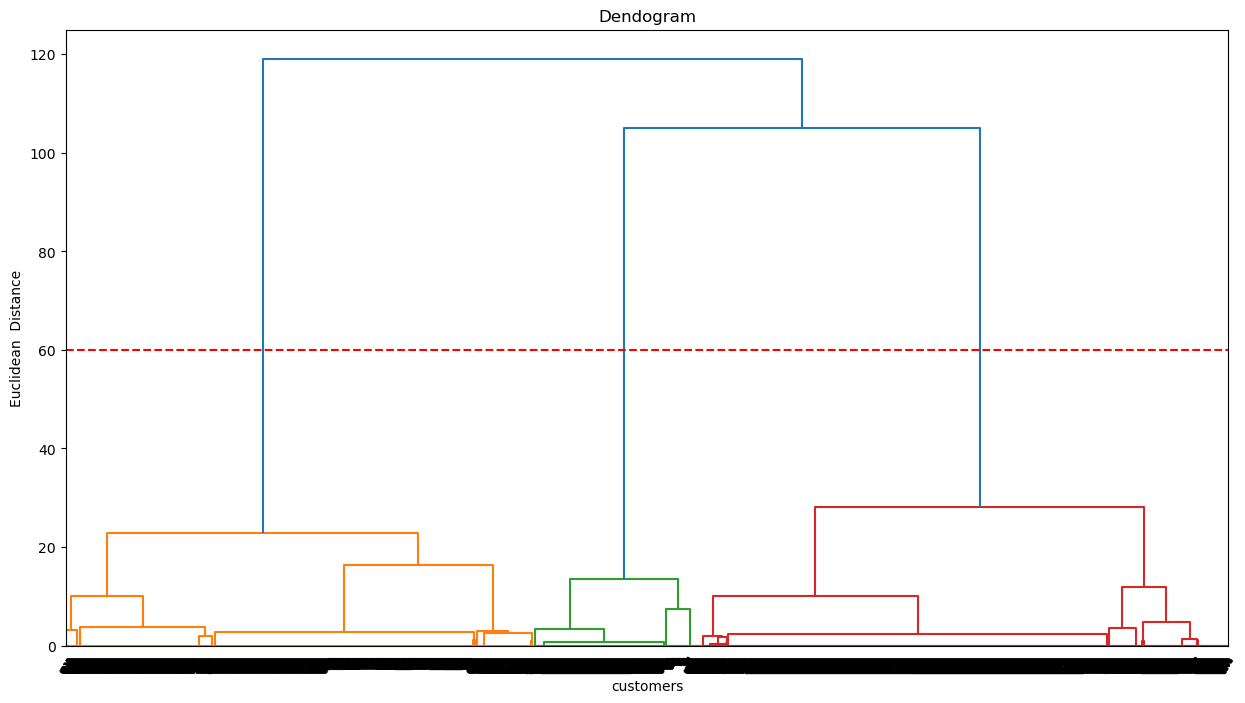

In [211]:
plt.figure(figsize=(15,8))
hc.dendrogram(hc.linkage(d3,method='ward'))
plt.axhline(y=60,color='r',linestyle='--')
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean  Distance')
plt.xticks(rotation=60);

In [212]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,10):
        for i in ['single','complete','average','ward']:
            AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage=i)
            y_AG=AG.fit_predict(d3)
            print(i,k,silhouette_score(d3,y_AG))

single 2 0.6453333466171278
complete 2 0.6453333466171278
average 2 0.6453333466171278
ward 2 0.6118801965803371
single 3 0.4773294204631982
complete 3 0.7738305854983909
average 3 0.8015213485806196
ward 3 0.8015213485806196
single 4 0.09241566920558336
complete 4 0.7159300581362156
average 4 0.7471621468371213
ward 4 0.8062620593002615
single 5 0.6525918805990205
complete 5 0.7133101942492645
average 5 0.7369476456428137
ward 5 0.7981754787347936
single 6 0.6244667840624238
complete 6 0.7095922636742475
average 6 0.7695582891226427
ward 6 0.8578773383332849
single 7 0.625210372039749
complete 7 0.7100100880098238
average 7 0.7598889179561369
ward 7 0.855199400824453
single 8 0.585286025253744
complete 8 0.7969338298931976
average 8 0.7814811343369399
ward 8 0.8767266844170858
single 9 0.5976929341806957
complete 9 0.8363045822885214
average 9 0.7771137229211011
ward 9 0.8946057747726004


In [ ]:
The good k-value is 8.

In [213]:
WAG=AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward') 
y_WAG=WAG.fit_predict(d3) 
print(silhouette_score(d3,y_WAG))

0.8767266844170858


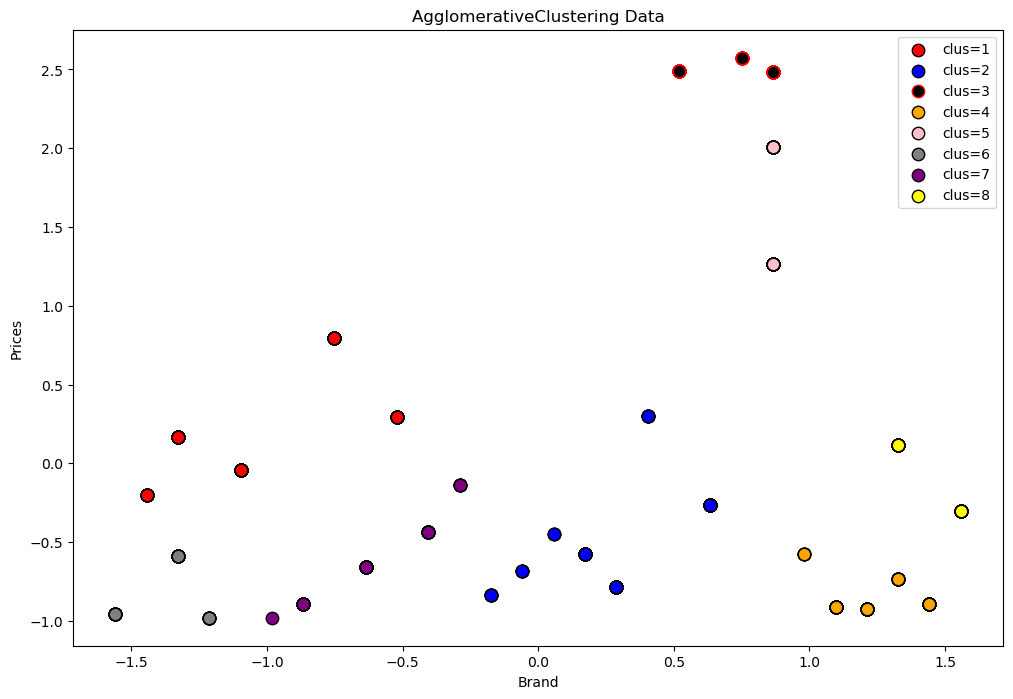

In [214]:
#d13=d3.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(d3[y_WAG==0,0],d3[y_WAG==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d3[y_WAG==1,0],d3[y_WAG==1,1],s=80,color='blue',label='clus=2',edgecolors='black');
plt.scatter(d3[y_WAG==2,0],d3[y_WAG==2,1],s=80,color='black',label='clus=3',edgecolors='red');
plt.scatter(d3[y_WAG==3,0],d3[y_WAG==3,1],s=80,color='orange',label='clus=4',edgecolors='black');
plt.scatter(d3[y_WAG==4,0],d3[y_WAG==4,1],s=80,color='pink',label='clus=5',edgecolors='black');
plt.scatter(d3[y_WAG==5,0],d3[y_WAG==5,1],s=80,color='grey',label='clus=6',edgecolors='black');
plt.scatter(d3[y_WAG==6,0],d3[y_WAG==6,1],s=80,color='purple',label='clus=7',edgecolors='black');
plt.scatter(d3[y_WAG==7,0],d3[y_WAG==7,1],s=80,color='yellow',label='clus=8',edgecolors='black');
plt.title("AgglomerativeClustering Data")
plt.xlabel('Brand')
plt.ylabel('Prices')
plt.legend();

# Overall and Price

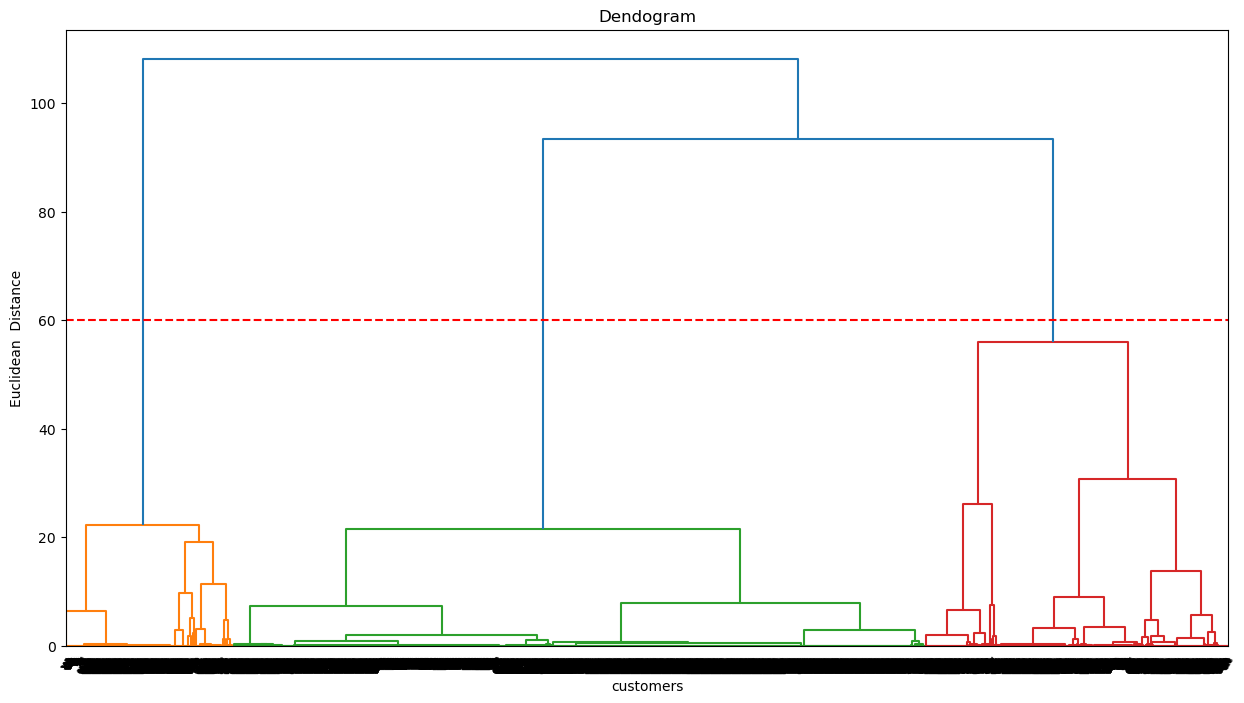

In [215]:
plt.figure(figsize=(15,8))
hc.dendrogram(hc.linkage(d6,method='ward'))
plt.axhline(y=60,color='r',linestyle='--')
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean  Distance')
plt.xticks(rotation=60);

In [216]:
for k in range(2,10):
        for i in ['single','complete','average','ward']:
            AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage=i)
            y_AG=AG.fit_predict(d6)
            print(i,k,silhouette_score(d6,y_AG))

single 2 0.6084182675589129
complete 2 0.6089742889485472
average 2 0.62704078875233
ward 2 0.6445599312008894
single 3 0.5295452217310328
complete 3 0.5748774713941341
average 3 0.5950423878223342
ward 3 0.6378437264662767
single 4 0.4164169649469205
complete 4 0.7445655670101397
average 4 0.7332527178167705
ward 4 0.6668571772995547
single 5 0.42051829786897377
complete 5 0.7357819336378081
average 5 0.6365030019047289
ward 5 0.6589279801572695
single 6 0.43254940330619185
complete 6 0.6917267978026116
average 6 0.6214970390915205
ward 6 0.6667837257742808
single 7 0.4264297177839831
complete 7 0.6531721798428868
average 7 0.5955764674818557
ward 7 0.6611818772617062
single 8 0.39178123656991254
complete 8 0.6525405469637103
average 8 0.6764137593601004
ward 8 0.702794349679338
single 9 0.3419952698491817
complete 9 0.6528721641261106
average 9 0.6984067094136227
ward 9 0.7221368718196894


In [221]:
WAG=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete') 
y_WAG=WAG.fit_predict(d6) 
print(silhouette_score(d6,y_WAG))

0.7445655670101397


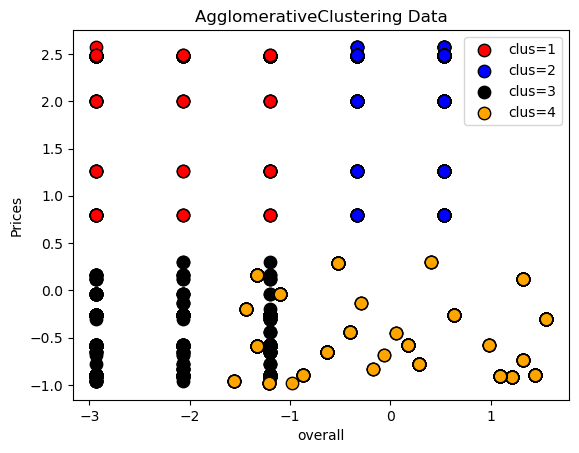

In [222]:
#d6=d6.to_numpy()
plt.scatter(d6[y_WAG==0,0],d6[y_WAG==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d6[y_WAG==1,0],d6[y_WAG==1,1],s=80,color='blue',label='clus=2',edgecolors='black')
plt.scatter(d6[y_WAG==2,0],d6[y_WAG==2,1],s=80,color='black',label='clus=3',edgecolors='black')
plt.scatter(d3[y_WAG==3,0],d3[y_WAG==3,1],s=80,color='orange',label='clus=4',edgecolors='black')
plt.title("AgglomerativeClustering Data")
plt.xlabel('overall')
plt.ylabel('Prices')
plt.legend();

# overall and Brand

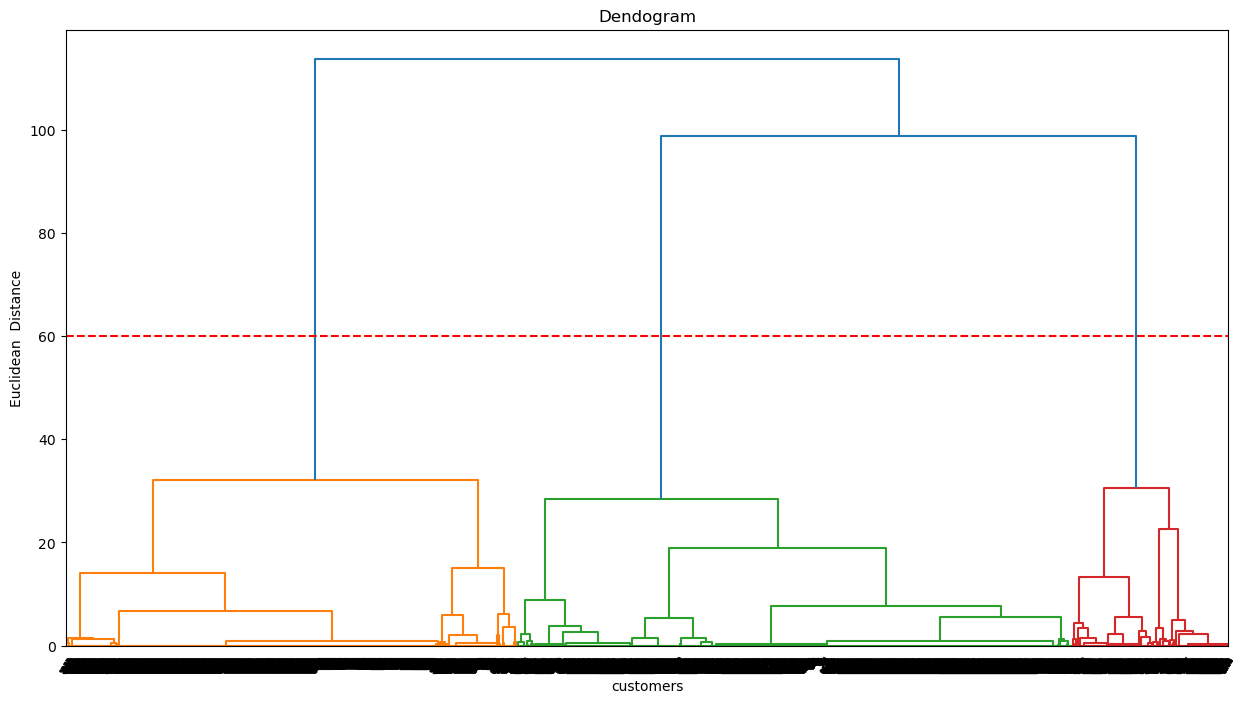

In [223]:
plt.figure(figsize=(15,8))
hc.dendrogram(hc.linkage(d7,method='ward'))
plt.axhline(y=60,color='r',linestyle='--')
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean  Distance')
plt.xticks(rotation=60);

In [224]:
for k in range(2,10):
        for i in ['single','complete','average','ward']:
            AG=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage=i)
            y_AG=AG.fit_predict(d7)
            print(i,k,silhouette_score(d7,y_AG))

single 2 0.560936239755003
complete 2 0.5505206032614933
average 2 0.5623615978914506
ward 2 0.5829723377429192
single 3 0.45281360675479043
complete 3 0.5091881578950984
average 3 0.5144086063072436
ward 3 0.7115667384607565
single 4 0.2964904703050041
complete 4 0.7137966032023578
average 4 0.7020832025235305
ward 4 0.7112492489476835
single 5 0.2896765245106418
complete 5 0.6965151881745406
average 5 0.6797396429550957
ward 5 0.6984646371994501
single 6 0.30929762870760324
complete 6 0.6999980691056772
average 6 0.695993689337711
ward 6 0.6921383706008254
single 7 0.2858116217568692
complete 7 0.662961934290854
average 7 0.6937512744558323
ward 7 0.7051097339515475
single 8 0.10988480320214249
complete 8 0.6638151932655545
average 8 0.6945080945452525
ward 8 0.7275805688210888
single 9 0.11936995255542937
complete 9 0.6028627355389491
average 9 0.7110140957053588
ward 9 0.7267158627491849


In [225]:
WAG=AgglomerativeClustering(n_clusters=8,affinity='euclidean',linkage='ward') 
y_WAG=WAG.fit_predict(d7) 
print(silhouette_score(d7,y_WAG))

0.7275805688210888


Text(0, 0.5, 'Brand')

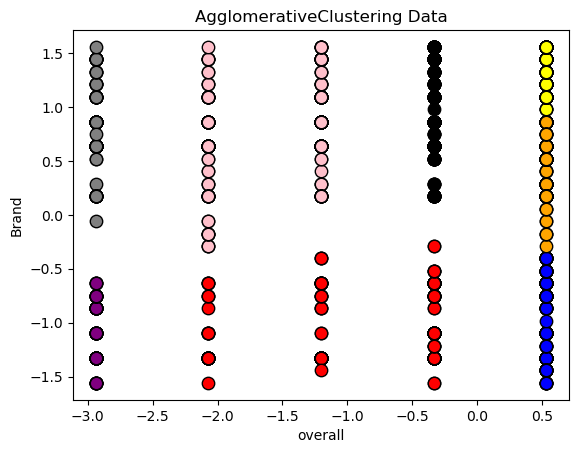

In [232]:
#d7=d7.to_numpy()
plt.scatter(d7[y_WAG==0,0],d7[y_WAG==0,1],s=80,color='red',label='clus=1',edgecolors='black')
plt.scatter(d7[y_WAG==1,0],d7[y_WAG==1,1],s=80,color='blue',label='clus=2',edgecolors='black');
plt.scatter(d7[y_WAG==2,0],d7[y_WAG==2,1],s=80,color='black',label='clus=3',edgecolors='black');
plt.scatter(d7[y_WAG==3,0],d7[y_WAG==3,1],s=80,color='orange',label='clus=4',edgecolors='black');
plt.scatter(d7[y_WAG==4,0],d7[y_WAG==4,1],s=80,color='pink',label='clus=5',edgecolors='black');
plt.scatter(d7[y_WAG==5,0],d7[y_WAG==5,1],s=80,color='grey',label='clus=6',edgecolors='black');
plt.scatter(d7[y_WAG==6,0],d7[y_WAG==6,1],s=80,color='purple',label='clus=7',edgecolors='black');
plt.scatter(d7[y_WAG==7,0],d7[y_WAG==7,1],s=80,color='yellow',label='clus=8',edgecolors='black');
plt.title("AgglomerativeClustering Data")
plt.xlabel('overall')
plt.ylabel('Brand')
#plt.legend('right');

# DBSCAN Clustering.

# Plot K-distance graph to evalute the optimum eps value.

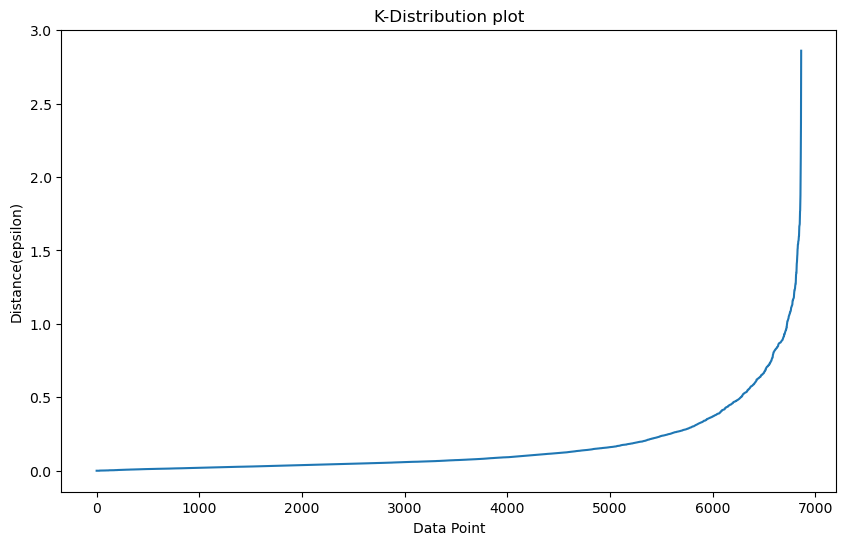

In [240]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nrbr=neigh.fit(data1)
distance,indices=nrbr.kneighbors(data1)
#plotting k-distribution
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel('Data Point')
plt.ylabel('Distance(epsilon)')
plt.show()

In [242]:
eps=0.75
for min_sample in range(2,20):
    clus= DBSCAN(eps=eps,min_samples=min_sample)
    clus_lbl=clus.fit_predict(data1)
    x1=clus_lbl+2
    y1=np.bincount(x1)
    ii=np.nonzero(y1)[0]
    results=list(zip(ii,y1[ii]))
    print('eps=',eps,'min_sample=',min_sample,'clustered=',results)


eps= 0.75 min_sample= 2 clustered= [(1, 290), (2, 1496), (3, 48), (4, 14), (5, 531), (6, 46), (7, 120), (8, 6), (9, 20), (10, 2), (11, 12), (12, 4), (13, 2), (14, 4), (15, 14), (16, 3), (17, 2), (18, 6), (19, 4), (20, 3), (21, 21), (22, 3), (23, 2), (24, 2), (25, 1154), (26, 161), (27, 178), (28, 32), (29, 12), (30, 34), (31, 82), (32, 6), (33, 6), (34, 16), (35, 3), (36, 8), (37, 5), (38, 2), (39, 3), (40, 3), (41, 3), (42, 5), (43, 2), (44, 5), (45, 2), (46, 3), (47, 6), (48, 2), (49, 2), (50, 2), (51, 5), (52, 2), (53, 2), (54, 2), (55, 56), (56, 2), (57, 3), (58, 3), (59, 4), (60, 2), (61, 2), (62, 11), (63, 2), (64, 2), (65, 9), (66, 54), (67, 6), (68, 2), (69, 5), (70, 27), (71, 18), (72, 2), (73, 2), (74, 2), (75, 5), (76, 3), (77, 151), (78, 338), (79, 34), (80, 62), (81, 99), (82, 54), (83, 35), (84, 12), (85, 52), (86, 36), (87, 11), (88, 3), (89, 6), (90, 3), (91, 19), (92, 5), (93, 6), (94, 5), (95, 7), (96, 8), (97, 8), (98, 3), (99, 10), (100, 5), (101, 2), (102, 2), (103

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


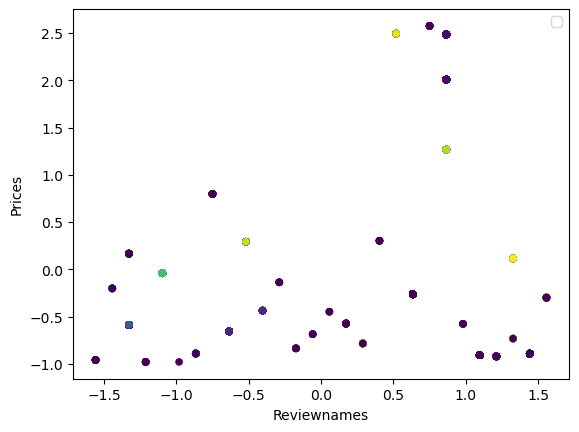

In [246]:
db_model=DBSCAN(eps=0.75,min_samples=5)
db_model.fit(data1)
data1['db_model.labels']=db_model.labels_
plt.scatter(data1['brand'],data1['price'],c=data1['db_model.labels'],s=20)
plt.xlabel('Reviewnames')
plt.ylabel('Prices')
plt.legend()

In [247]:
print(silhouette_score(data1,db_model.labels_))

0.37435346823210275


# Recommendation

In [248]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


# Extract features from the review text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
title_tfidf = tfidf_vectorizer.fit_transform(data['title'])

# Calculate cosine similarity between products based on review text
cosine_sim_matrix = cosine_similarity(title_tfidf)

# Create a NearestNeighbors model using cosine similarity
model = NearestNeighbors(metric='cosine')
model.fit(title_tfidf)

# Function to recommend products for a given product ID
def get_recommendation(product_id):
    # Get the index of the target product
    target_product_index = data[data['asin'] == product_id].index.values[0]

    # Find the nearest neighbors of the target product based on cosine similarity
    distances, indices = model.kneighbors(title_tfidf[target_product_index, :].reshape(1, -1), n_neighbors=data.shape[0]-1)

    # Exclude the target product itself from the recommendations
    recommended_product_indices = indices[0][1:]

    # Get the recommended product IDs
    recommended_product_ids = data['asin'].iloc[recommended_product_indices]+" "+ data['title'].iloc[recommended_product_indices] 
    recommended_product_ids = recommended_product_ids.drop_duplicates().head(10)

    # Return the recommended products
    return recommended_product_ids



In [249]:
get_recommendation(str(7414204790))

0        7414204790 Lacto Calamine Skin Balance Oil con...
14254    B0000Y8IOQ Biotone Herbal Select Massage Produ...
18532    B0001HYLR0 Philips Norelco HQ177 Cool Skin Rep...
3652     B000050FDT Braun 3000 Series InterFace/Interfa...
2548     B000050FDY Braun Clean &amp; Renew Refill Cart...
7988     B00005JS5C Panasonic Bikini Shaper and Trimmer...
3876     B000052Y8Z Dentemp Dental Cement Size Ea Dente...
404           B000050B6B Philips Norelco HQ5 Shaving Heads
4088     B000052YAN Reach Dentotape Waxed Dental Floss ...
16480    B000146LKS PLANTLIFE Patchouli Aromatherapy So...
dtype: object

In [339]:
import tkinter as tk
from tkinter import *
from tkinter import ttk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

df = data

# Define window and title
window = tk.Tk()
window.geometry("900x600")
window.title("Product Information and Sentiment Analysis")
icon= PhotoImage(file="Image20231218143734.png")
window.iconphoto(False,icon)
bg = PhotoImage(file = "Image20231218143748.png") 
# Define canvas for better layout management
canvas = tk.Canvas(window)
canvas.grid(row=0, column=0, sticky="nsew")
canvas.create_image(0,0,image=bg,anchor='nw') 
window.rowconfigure(0, weight=1)
window.columnconfigure(0, weight=1)
canvas.columnconfigure(4,weight=1)
canvas.rowconfigure(15,weight=1)
# Define functions
def update_review_dropdown(selected_product_id):
    selected_product_id = product_id_var.get()
    if selected_product_id:
        review_ids_filtered = data[data["asin"] == selected_product_id]["reviewerID"].unique().tolist()
        review_id_dropdown.config(values=review_ids_filtered, state="normal")
        review_id_var.set("")
    else:
        review_id_dropdown.config(values=[], state="disabled")
        review_id_var.set("")

def show_product_info(selected_review_id):
    try:
        selected_product_id = product_id_var.get()
        selected_review_id = review_id_var.get()
        product_data = data[data["asin"] == str(selected_product_id)]
        selected_row = data[(data["asin"] == selected_product_id) & (data["reviewerID"] == selected_review_id)]
        average_rating = product_data["overall"].mean()
        analysis_text.delete(1.0, "end")
        analysis_text.insert(1.0,"\nReview Text:"+ selected_row["reviewText"].values[0])
        analysis_text.insert(1.0,"\nReview Date:"+ selected_row["reviewTime"].values[0])
        analysis_text.insert(1.0,"\nSentiment of Review:"+ selected_row["sentiments"].values[0])
        analysis_text.insert(1.0,"\nReviewer:"+ selected_row["reviewerName"].values[0])
        analysis_text.insert(1.0,"\nRank of Product:"+ str(selected_row["rank"].values[0]))
        analysis_text.insert(1.0,"\nPrice of Product: $"+ str(selected_row["price"].values[0]))
        analysis_text.insert(1.0,"\nFeatures of Product:"+ selected_row["feature"].values[0])
        analysis_text.insert(1.0,"\nTitle:"+ selected_row["title"].values[0])
        analysis_text.insert(1.0,"\nMain Category:"+ selected_row["main_cat"].values[0])
        analysis_text.insert(1.0,"\nBrand of Product:"+ selected_row["brand"].values[0])
        analysis_text.insert(1.0, "\nAverage rating for Product " + str(selected_product_id) + ": " + str(average_rating))
        analysis_text.insert(1.0,"\nVerified:"+ str(selected_row["verified"].values[0]))
        analysis_text.insert(1.0,"ProductID:"+ str(selected_product_id))
    except KeyError:
        analysis_text.delete(1.0, "end")
        analysis_text.insert(1.0,"Reviewer ID not found")

def clearAll() : 
    negativeField.delete(0, END) 
    neutralField.delete(0, END) 
    positiveField.delete(0, END) 
    overallField.delete(0, END) 
    textArea.delete(1.0, END)

#Sentiment
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
title_tfidf = tfidf_vectorizer.fit_transform(data['title'])
cosine_sim_matrix = cosine_similarity(title_tfidf)
model = NearestNeighbors(metric='cosine')
model.fit(title_tfidf)

# Function to recommend products for a given product ID
def get_recommendation(product_id):
    product_id = product_id_var.get()
    target_product_index = data[data['asin'] == product_id].index.values[0]
    distances, indices = model.kneighbors(title_tfidf[target_product_index, :].reshape(1, -1), n_neighbors=data.shape[0]-1)
    recommended_product_indices = indices[0][1:]
    recommended_product_ids = data['asin'].iloc[recommended_product_indices]+" "+ data['title'].iloc[recommended_product_indices] 
    recommended_product_ids = recommended_product_ids.drop_duplicates().head(10)
    return recommended_product_ids

def get_recommendations(product_id):
    product_id = product_id_var.get()
    target_product_index = data[data['asin'] == product_id].index.values[0]
    distances, indices = model.kneighbors(title_tfidf[target_product_index, :].reshape(1, -1), n_neighbors=data.shape[0]-1)
    recommended_product_indices = indices[0][1:]
    recommended_product_ids = data['asin'].iloc[recommended_product_indices]+" "+ data['title'].iloc[recommended_product_indices] 
    recommended_product_ids = recommended_product_ids.drop_duplicates().head(10)
    return recommended_product_ids

average_ratings = data.groupby('asin')['overall'].mean()
sorted_products = average_ratings.sort_values(ascending=False)

# Function to recommend products based on overall rating
def get_recommendations(product_id):
    product_id = product_id_var.get()
    current_product_rating = average_ratings[product_id]
    filtered_products = sorted_products[sorted_products >= current_product_rating]
    recommended_products = filtered_products.drop_duplicates().head(10)
    recommended_product_id = recommended_products.index
    return recommended_product_id


def button_click():
    product_id = product_id_var.get()
    Rtext.delete(1.0,END)
    try:
        recommendations = get_recommendation(product_id)
        if not recommendations.empty:
            Rtext.insert(END, f"Products similar to {product_id} are:\n")
            for product in recommendations:
                Rtext.insert(END, f"- {product}\n")
        else:
            Rtext.insert(END, f"No products found for {product_id}")

    except IndexError:
        Rtext.insert(END, f"Invalid product id: {product_id}")

def button1_click():
    product_id = product_id_var.get()
    R1text.delete(1.0,END)
    try:
        recommendation = get_recommendations(product_id)
        if not recommendation.empty:
            R1text.insert(END, f"Products similar to {product_id} are:\n")
            for product in recommendation:
                R1text.insert(END, f"- {product}\n")
        else:
            R1text.insert(END, f"No products found for {product_id}")
            
    except IndexError:
        R1text.insert(END, f"Invalid product id: {product_id}")

def detect_sentiment():
    sentence = textArea.get("1.0", "end")
    sid_obj = SentimentIntensityAnalyzer()  
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    string = str(sentiment_dict['neg']*100) + "% Negative"
    negativeField.insert(10, string)
    string = str(sentiment_dict['neu']*100) + "% Neutral"
    neutralField.insert(10, string)
    string = str(sentiment_dict['pos']*100) +"% Positive"
    positiveField.insert(10, string) 
    if sentiment_dict['compound'] >= 0.05 :
        string = "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        string = "Negative"
    else :
        string = "Neutral"
    overallField.insert(10, string)

# Define labels and dropdowns with grid layout
product_info_label = tk.Label(canvas, text="Product Information:",font=('algerian',14,'bold'),fg='black')
product_info_label.grid(row=0, column=0)
product_id_label = tk.Label(canvas, text="Product ID:",font=('Castellar',11,'bold'),fg='black')
product_id_label.grid(row=1, column=0,sticky='w' )

product_id_var = tk.StringVar(canvas)
product_id_dropdown = ttk.Combobox(canvas, textvariable=product_id_var, values=df["asin"].unique().tolist())
product_id_dropdown.grid(row=1, column=1,sticky='e')

review_id_label = tk.Label(canvas, text="Review ID:",font=('Castellar',11,'bold'),fg='black')
review_id_label.grid(row=2, column=0,sticky='w')

review_id_var = tk.StringVar(canvas)
review_id_dropdown = ttk.Combobox(canvas, textvariable=review_id_var,values=data[data['asin']==product_id_var]['reviewerID'].unique().tolist())
review_id_dropdown.grid(row=2, column=1,sticky='e')
review_id_dropdown.config(state="disabled")
# ---- Product Information Section ----
product_info_label = tk.Label(canvas, text="Details of Product",font=('Castellar',11,'bold'),fg='black')
product_info_label.grid(row=0, column=3)

details_frame = ttk.Frame(canvas)
details_frame.grid(row=1,column=2,rowspan=4,columnspan=3)
scrollbar = Scrollbar(details_frame, relief="groove")
scrollbar.grid(row=1, column=4, sticky="ens")
analysis_text = Text(details_frame, width=80, height=10, yscrollcommand=scrollbar.set, background=None)
analysis_text.grid(row=1, column=2, sticky="nsew")
scrollbar.config(command=analysis_text.yview)
details_frame = None

# ---- Sentiment Analysis Section ----
sentiment_label = tk.Label(canvas, text="Sentiment Analysis:",font=('algerian',14,'bold'),fg='black')
sentiment_label.grid(row=6, column=0)
enter_sentence_label = tk.Label(canvas, text="Enter Your Sentence:",font=('Castellar',10,'bold'),fg='black')
enter_sentence_label.grid(row=7, column=0,columnspan=2)
textArea = Text(canvas, height=7, width=50, font="lucida 13")
textArea.grid(row=8, column=0,rowspan=3,columnspan=3)
check_sentiment_button = tk.Button(canvas, text="Check Sentiment", fg="Black", command=detect_sentiment)
check_sentiment_button.grid(row=11, column=2)
negative_label = tk.Label(canvas, text="Negative:",font=('Castellar',11,'bold'),fg='black')
neutral_label = tk.Label(canvas, text="Neutral:",font=('Castellar',11,'bold'),fg='black')
positive_label = tk.Label(canvas, text="Positive:",font=('Castellar',11,'bold'),fg='black')
overall_label = tk.Label(canvas, text="Overall:",font=('Castellar',11,'bold'),fg='black')
negative_label.grid(row=8, column=3,sticky='E')
neutral_label.grid(row=9, column=3,sticky='E')
positive_label.grid(row=10, column=3,sticky='E')
overall_label.grid(row=11, column=3,sticky='E')
negativeField = tk.Entry(canvas)
neutralField = tk.Entry(canvas)
positiveField = tk.Entry(canvas)
overallField = tk.Entry(canvas)
negativeField.grid(row=8, column=4)
neutralField.grid(row=9, column=4)
positiveField.grid(row=10, column=4)
overallField.grid(row=11, column=4)
# Clear button
clear_button = tk.Button(canvas, text="Clear", fg="Black", command=clearAll)
clear_button.grid(row=11, column=0)

Recommendation_label = tk.Label(canvas, text="Recommendations:",font=('algerian',14,'bold'),fg='black')
Recommendation_label.grid(row=14, column=0)
Rbutton = Button(canvas, text='Get Recommendations based on Product', command=button_click) 
Rbutton.grid(row=15, column=2,sticky="s",columnspan=4)

R1button = Button(canvas, text='Get Recommendations based on Ratings', command=button1_click) 
R1button.grid(row=15, column=0,sticky="s",columnspan=4)
R1text = Text(canvas, height=10, width=60) 
R1text.grid(row=14, column=0,rowspan=4,columnspan=4)
Rtext = Text(canvas, height=10, width=60) 
Rtext.grid(row=14, column=2,rowspan=4,columnspan=4)
#sscrollbar = Scrollbar(canvas, relief="groove")
#sscrollbar.config(command=Rtext.yview)
# Bind events
product_id_dropdown.bind("<<ComboboxSelected>>", update_review_dropdown)
review_id_dropdown.bind("<<ComboboxSelected>>", show_product_info)

# Run the main loop
window.mainloop()